# **Capstone Project - NLP Chatbot**

**DOMAIN:**

Industrial safety. NLP based Chatbot.

**CONTEXT:**

There is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**

The database comes from one of the biggest industry in Brazil and in the world.
The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

**Columns description:**


*   Data: timestamp or time/date information
-Countries: which country the accident occurred (anonymised)
-Local: the city where the manufacturing plant is located (anonymised)
-Industry sector: which sector the plant belongs to
-Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
-Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
-Gender: if the person is male of female
-Employee or Third Party: if the injured person is an employee or a third party
-Critical Risk: some description of the risk involved in the accident
-Description: Detailed description of how the accident happened.

**PROJECT OBJECTIVE:**

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.


***METHODOLOGY ***

We are presented with a number of features of data as related to accidents. As evidenced in addition to information about location and employees, the dataset has a field that informs us with the **Description of accidents** and another field that has the corresponding recorded **Accident Level**.

 Our objective would be to be able to classify the level of the accident based on the description of the accident and for future purposes be able to assign an Accident level based on user input description. This is akin to a **Supervised Learning multi-class Classification** problem.

 Hence the Description would be the most important attribute in our context to train the models. We will "extract" numerical features from this textual description column by converting them into **word embeddings** which are numerical representation of words in the corpus of text. These word embeddings are then used to feed into the  **Machine Learning algorithms** to classify the accident into various levels.

 We shall be using different types of word embeddings - from the simplest possible methods to the more recent, advanced state of the art embedding techniques like **Word2Vec, Glove** and **Transformer** based approach. We shall also use various Machine Learning algorithms - the tradition ones like **Random Forest, SVM, Logistic Regression, XGBoost** etc and also more complex, deep learning methods like **Artificial Neural Networks, RNN, LSTM  and Bidirectional LSTM models**.

# **Import Libraries**

In [ ]:
!python --version

Python 3.10.12


In [ ]:
#IMPORTANT NOTE
#The latest version of Keras(2.15.0) does not seem to support KerasClassifier which is needed for GridSearch/RandomSearch
#Hence we install a slightly older version that supports KerasClassifier
#This can also be fixed by installing the "scikeras" package
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option('display.precision', 2)

In [ ]:
import string
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import spacy
import nltk
print(nltk.__version__)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

3.8.1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=5db2ae6cef5cd6de3e61ee824f28a62b04267b96ee0bde9f903e8a987ba5b510
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.7 MB/s eta 0:00:00


In [ ]:
import unidecode
import contractions
from autocorrect import Speller
spell = Speller(lang = 'en')

**Import Libraries for Embeddings and Model Building**

In [ ]:
#ML and NLP Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, ADASYN

from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [ ]:
# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Embedding, Bidirectional, concatenate, GlobalMaxPool1D, GlobalAveragePooling1D
# from tensorflow.keras.layers import CuDNNLSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from keras.utils import plot_model
from keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import time

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
nlp = spacy.load('en_core_web_sm')
# loading the stopwords
spacy_stopwords = nlp.Defaults.stop_words

# **First Steps - Read and check file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Excel file
file_path = '/content/drive/MyDrive/Capstone/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx'
df = pd.read_excel(file_path)

In [ ]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset has 425 rows and 11 columns


In [ ]:
print("\nFirst 5 rows of the dataset:")
print(df.head(5))


First 5 rows of the dataset:
   Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others 

In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ K

In [ ]:
#Rename the columns that are misspelled
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Industry Sector':'Industry_Sector','Accident Level':'Accident_Level','Potential Accident Level':'Potential_Accident_Level',
'Genre':'Gender', 'Employee or Third Party':'Employee_type','Critical Risk':'Critical_Risk'}, inplace=True)
df.head(5)

# **EDA**

In [ ]:
#Checking Missing and Unique Values in each column
print("Dataset Information:")
tmp1 = pd.DataFrame(df.dtypes)
tmp1['MissingVal'] = df.isnull().sum()
tmp1['Unique']=df.nunique()
tmp1

Dataset Information:


0  MissingVal  Unique
Unnamed: 0                         int64           0     425
Date                      datetime64[ns]           0     287
Country                           object           0       3
Local                             object           0      12
Industry_Sector                   object           0       3
Accident_Level                    object           0       5
Potential_Accident_Level          object           0       6
Gender                            object           0       2
Employee_type                     object           0       3
Critical_Risk                     object           0      33
Description                       object           0     411

**Observation:**

There are no missing values in any of the columns. No need to do any NULL value treatment.

In [ ]:
for i in df.columns[2:10]:
    # print('--'*30)
    print(f'Unique values of "{i}"')
    print('---'*30)
    print(df[i].unique())
    print("\n")

Unique values of "Country"
------------------------------------------------------------------------------------------
['Country_01' 'Country_02' 'Country_03']


Unique values of "Local"
------------------------------------------------------------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


Unique values of "Industry_Sector"
------------------------------------------------------------------------------------------
['Mining' 'Metals' 'Others']


Unique values of "Accident_Level"
------------------------------------------------------------------------------------------
['I' 'IV' 'III' 'II' 'V']


Unique values of "Potential_Accident_Level"
------------------------------------------------------------------------------------------
['IV' 'III' 'I' 'II' 'V' 'VI']


Unique values of "Gender"
----------------------------------------------------------------------------------

**Observations**

There are 3 countries, 12 Locals, 3 Industry sectors, 5 accident levels, 6 potential accident levels, 3 Employee types and 33 Critical Risks in the given dataset

Five types of accident levels in increasing order of serverity are I , II , III , IV , V

Potential Accident Levels has an addition severe level of VI

In [ ]:
df.duplicated().sum()

0

In [ ]:
print("\nDuplicate Values in Description column:")
df.Description.duplicated(keep=False).sum()


Duplicate Values in Description column:


26

In [ ]:
#Display all the duplicated Descriptions for analyzing them
dup = df.Description.duplicated(keep=False)
print(df[dup])

     Unnamed: 0       Date     Country     Local Industry_Sector  \
37           37 2016-02-24  Country_02  Local_07          Mining   
38           38 2016-02-24  Country_02  Local_07          Mining   
76           88 2016-04-01  Country_01  Local_01          Mining   
77           89 2016-04-01  Country_01  Local_01          Mining   
130         142 2016-05-26  Country_03  Local_10          Others   
131         143 2016-05-26  Country_03  Local_10          Others   
143         155 2016-06-08  Country_03  Local_10          Others   
144         156 2016-06-08  Country_03  Local_10          Others   
166         180 2016-07-07  Country_01  Local_03          Mining   
167         181 2016-07-07  Country_01  Local_03          Mining   
261         275 2016-12-01  Country_01  Local_03          Mining   
262         276 2016-12-01  Country_01  Local_03          Mining   
263         277 2016-12-01  Country_01  Local_03          Mining   
302         316 2017-01-21  Country_02  Local_02

**Observations**

It is observed after going over duplicates by a case-by-case basis, all the duplicate rows refer to cases of accidents to multiple individuals present in the same situation. Hence they will be taken as seperate events for training the model instead of being considered as duplicate rows. So none of the rows will be dropped.

# **Visualizations**

**Distribution of Accident Levels and Potential Accident Levels**

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

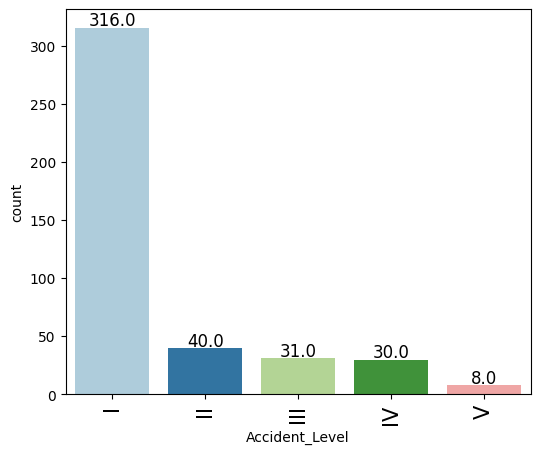

In [ ]:
labeled_barplot(df, "Accident_Level")

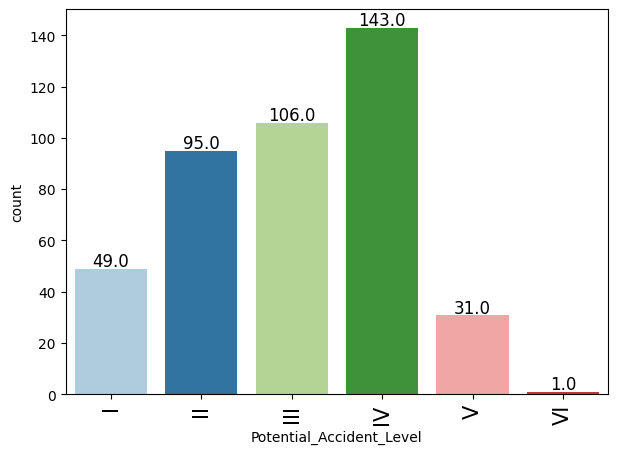

In [ ]:
labeled_barplot(df, "Potential_Accident_Level")

**Observations**

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels

This shows a case of highly imbalanced data.

The number of cases of Potential Accident Levels is a much more balanced but there is only one case of Potential Accident Level VI

**Distribution of Accident Levels in each Industry Sector**

In [ ]:
print(df['Industry_Sector'].value_counts())

Industry_Sector
Mining    241
Metals    134
Others     50
Name: count, dtype: int64


In [ ]:
value_counts = df.groupby('Industry_Sector')['Accident_Level'].value_counts()
print(value_counts)

Industry_Sector  Accident_Level
Metals           I                 107
                 II                 12
                 III                 7
                 IV                  7
                 V                   1
Mining           I                 167
                 II                 26
                 IV                 21
                 III                20
                 V                   7
Others           I                  42
                 III                 4
                 II                  2
                 IV                  2
Name: count, dtype: int64


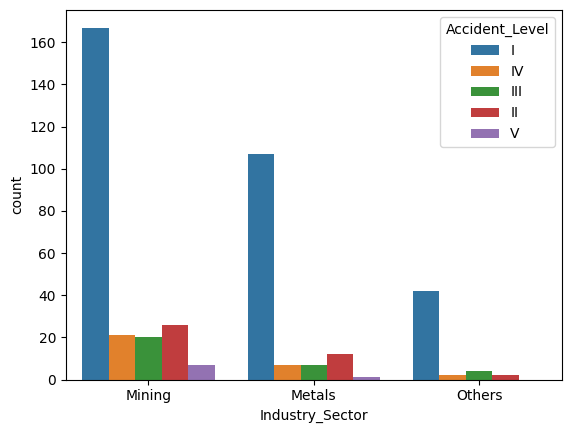

In [ ]:
sns.countplot(x='Industry_Sector', hue='Accident_Level', data=df)
plt.show()

**Observations**

Mining has the most cases of accidents reported followed by Metals

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Industry Sectors

The proportion of Accident Levels within each Industry Sector remains almost equal


**Distribution of Accident Levels by Country**

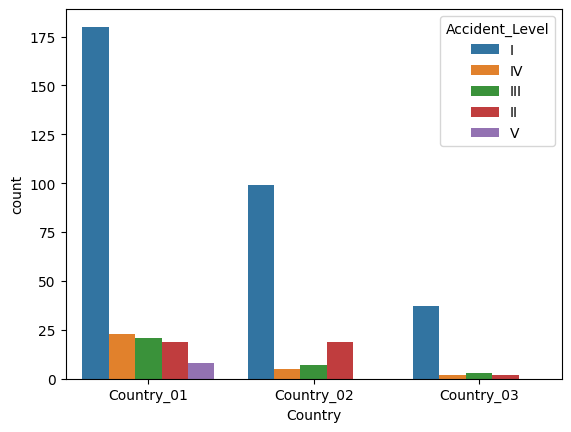

In [ ]:
sns.countplot(x='Country', hue='Accident_Level', data=df)
plt.show()

**Observations**

Country_01 has the most cases of accidents reported followed by Country_02 and far less in Country_03

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Countries

The proportion of Accident Levels within each Country remains almost equal

**Distribution of Accident Levels by Local**

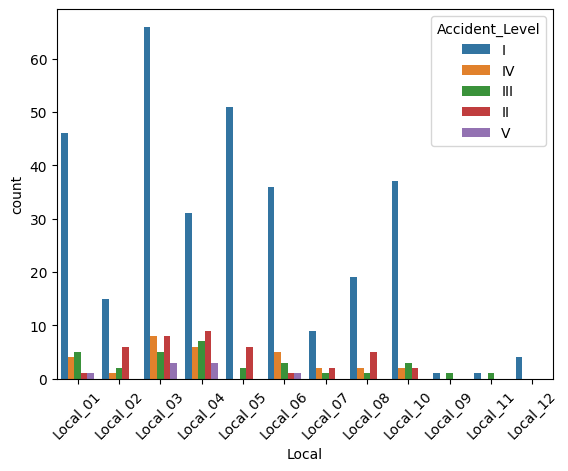

In [ ]:
sns.countplot(x='Local', hue='Accident_Level', data=df)
plt.xticks(rotation=45)
plt.show()

**Distribution of Accident Levels across Gender**

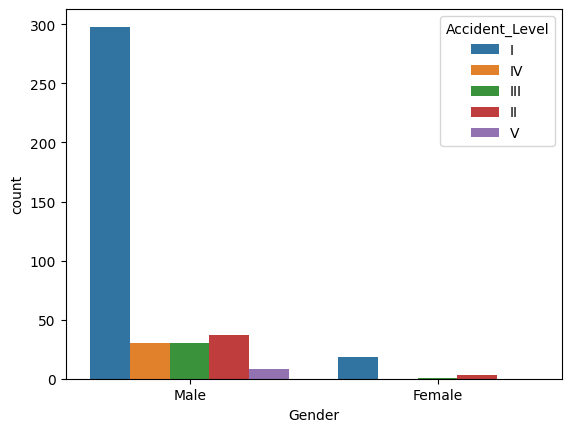

In [ ]:
sns.countplot(x='Gender', hue='Accident_Level', data=df)
plt.show()

**Observations**

There are exceedingly high number of accidents in Male compared to Female

**Distribution of Accident Levels in each Employee Type**

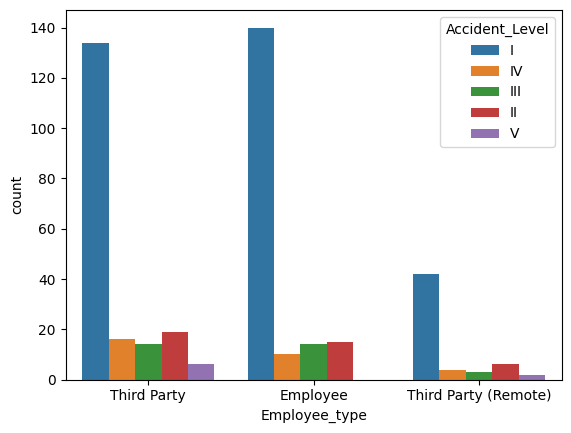

In [ ]:
sns.countplot(x='Employee_type', hue='Accident_Level', data=df)
plt.show()

**Observations**

Employees and Third Party have almost equal number of cases of accidents reported followed by Third Party(Remote)

The number of cases of Accident Level I is exceedingly high compared to other Accident Levels in all 3 Employee_Type

The proportion of Accident Levels within each Employee_Type remains almost equal

<Axes: xlabel='Potential_Accident_Level', ylabel='Accident_Level'>

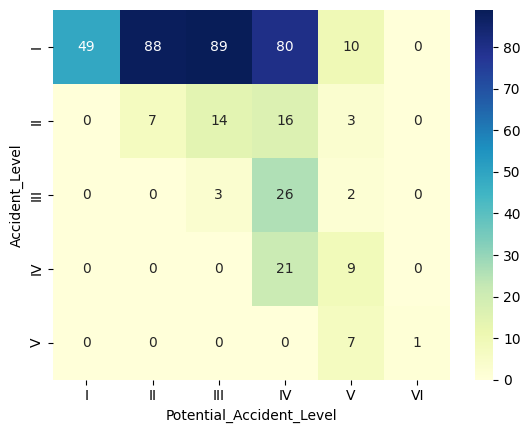

In [ ]:
sns.heatmap(pd.crosstab(df['Accident_Level'], df['Potential_Accident_Level']),cmap='YlGnBu', annot=True, fmt="d")

**Observations**

A lot of accidents that can potentially be classified as II, III or IV is ultimately assigned as Accident Level I

This could be sign of improvements in condition or first aid practices that injuries that used to be classified as serious are now classified under Level I


**Final Observations**

The dataset is highly imbalanced. We will do data balancing procedures before building a model.

The ratio of Accident Level is almost the same across all other attributes ie. it is not dependent on the Industry Sector or Country or Local or Employee Type or Gender. This is evident from the distribution of Accident level across all 3 sectors (Metals, Mining, Others) and across all 3 countries.

# **NLP preprocessing**

In [ ]:
#Create a copy of the original dataset
df_original = df.copy()

In [ ]:
#To revert back to original DataFrame if needed
# df = df_original.copy()

Text preprocessing is of utmost importance before we can create word embeddings for training the models. We leverage the NLP preprocessing techniques to create a cleaner text description to increase our level of success in training models.
There are various steps involved in preprocessing of the given textual data in order to acquire a clean dataset.

The **preprocess_description()** function does the following steps for cleaning the Description.

*   Converts into lower case
*   Removes accented characters
*   Removes Punctuation
*   Removes Timestamps
*   Removes Numerals
*   Fixes contracted words and expands them into full form
*   Removes Non-alphanumeric / Special/ unnecessary characters
*   Removes single, two and three letter words
*   Removes extra long words with more than 15 characters long
*   Removes stopwords to exclude words that appear frequently in the corpus including pronouns and articles
*   Removes Named-entities - Names of people, places, cities etc
*   Removes extra whitespaces
*   Performs a Spellcheck and corrects mistakes
*   Converts the words into lemmas


In [ ]:
# Initialize an empty list
long_words = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Split the sentence into words
    words = row['Description'].split()

    # Filter out words with length more than 15 characters
    long_words.extend([word for word in words if len(word) > 15])

# Print the list of long words
print(len(long_words))
print(long_words)

722
['maintenance,', 'intermediate', 'centralizer', 'Immediately', 'sub-station', 'collaborator', 'collaborator', 'approximately', 'penultimate', 'collaborators', 'anti-clockwise', 'Approximately', 'circumstances', 'Fernández-injured-the', 'depressurisation', 'collaborator', 'collaborator', 'approximately', 'transmission', 'unexpectedly', 'electrician', 'transmission', 'excoriation', 'displacement,', 'subsequently', 'collaborator', 'immediately', 'polyurethane', 'positioning', 'immediately', 'evaluation.', 'collaborator', 'installation', 'intersection', 'thermomagnetic', 'accumulation', 'circumstances', 'perforation', 'scaffolding,', 'scaffolding,', 'scaffolding', 'overheating', 'transferred', 'disconnection', 'intersection', 'Cajamarquilla', 'circumstances', 'concentrate,', 'Afterwards,', 'horizontally,', "assistant's", "assistant's", 'deslaminadora', 'collaborator', 'immediately', "collaborator's", 'transferred', 'communicates', 'intersection', 'ventilation', 'positioning', 'semi-kne

**Observations**

There are a lot of words that are very long that will have no significance in model building later. We can delete these words when performing other preprocessing steps

In [ ]:
def preprocess_description(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove accented characters
    text = unidecode.unidecode(text)

    # Remove punctuation
    # text = "".join([c for c in text if c not in string.punctuation])

    #Remove times
    text = ''.join(re.sub('(1[0-2]|0?[1-9]):([0-5][0-9]) ?([AaPp].?[Mm])', ' ', text))

    # Remove digits
    text = "".join([c for c in text if c not in string.digits ])

    #Fix contractions in words
    text = contractions.fix(text)

    #Remove other unneccessary characters
    text = "".join([c for c in text if c in string.printable ])

    # Using regex pattern to replace non-alphanumeric characters with a blank string
    text = ''.join(re.sub('[^A-Za-z0-9]+', ' ', text))

     # Using regex pattern to replace long words with more than 15 characters with a blank string
    text = ''.join(re.sub(r"\b\w{15,}\b", ' ', text))

     # Using regex pattern to replace two letter words with a blank string
    text = ''.join(re.sub('\b[a-z][a-z]\b', ' ', text))

    #Remove stopwords
    text = ' '.join([word for word in word_tokenize(text) if word not in spacy_stopwords])

    #Remove all named entities
    text = ' '.join([token.text for token in nlp(text) if token.ent_type_ == ''])

    # Using regex pattern to replace three letter words with a blank string
    #text = ''.join(re.sub('\b[a-z][a-z][a-z]\b', ' ', text))

    # Using regex pattern to replace single letter with a blank string
    text = ''.join(re.sub('\b[a-z]\b', ' ', text))

    text = text.strip()

    #Using Speller to spellcheck
    text = ''.join(spell(text))

    #Lemmatization
    text = ' '.join([token.lemma_ for token in nlp(text)])

    #Another round of replacing one, two, three letter words
    text = ''.join(re.sub(r'\s[a-z]\s', ' ', text))
    text = ''.join(re.sub(r'\s[a-z][a-z]\s', ' ', text))
    text = ''.join(re.sub(r'\s[a-z][a-z][a-z]\s', ' ', text))
    text = ''.join(re.sub('\s\w{12,}\s', ' ', text))

    return text

In [ ]:
df['Cleaned_Description'] = df['Description'].apply(preprocess_description)

In [ ]:
df.loc[0:10, ['Description','Cleaned_Description']]

Description  \
0                                                                                                            While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.   
1                                                                                                                                                                                                                                                                  During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.   
2                                                                                                                                                                                                                                                           In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.   
3   Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.   
4                                                                              Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.   
5                                                                                                                                                                                                                                                         During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes.   
6                                                                                                                                                                                                                                                                                                                                           The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped and when placing his hand on the ground the volumetric balloon ended up breaking caused a small wound in his left hand

**Analysis of Data Cleaning**

In [ ]:
#Creating two new columns to calculate length of original description and Cleaned Description
df['Original_Description_Length'] = df['Description'].str.split().str.len()
df['Cleaned_Description_Length'] = df['Cleaned_Description'].str.split().str.len()
df.loc[50:60, ['Description','Cleaned_Description', 'Original_Description_Length','Cleaned_Description_Length']]

Description  \
50                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               The operator was feeding a bag of big bag containing scraps of Zn sheets. During lifting, this loaded bag is released from the hook of the hoist, making abrupt contact with the liquid zinc of the furnace, generating an explosion and causing the operator to be hit with liquid zinc.   
51       In circumstances that two workers of the company INCIMMET made the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.   
52  In circumstances that two workers of the company INCIMMET fectuaban the loading of explosives using an equipment anfoloader, in a front of the work - sustained with shotcreterepentinamente of the right superior part of the crown, a piece of rock of approx. 9. kg, (0.2mx0.15mx0.10m), impacting on the basket and on the back of the helper who was in the basket suspended at 2.2 m height, moments later a block of rock is detached from the wall of the gable approx. 1,500 kg. (1.20mx1.10mx0.40m), which impacts the ampoloader team and part of this block injures the operator of the ampoloader team who was standing on the ground. The equipment anfoloader has a cabin with protection ROPs and FOPs, at the time of the accident both workers used helmets and safety boots. Both suffered polyontusions and minor scoria injuries.   
53                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             The mechanic assistant after throwing the wooden blocks of support of the stabilizer of the Hiab crane truck to the ground, when descending from the truck by the access ladder when arriving at the last step jumps towards the ground - height of 69cm - treading the edge of one of The wooden blocks cause an injury to the left ankle.   
54                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            By manually

We will create a column with Tokenized representation of the Cleaned Descriptions for later use in model building

In [ ]:
df['Tokenized_Description'] = df['Cleaned_Description'].apply(lambda x: [token.text for token in nlp(x)])

Most frequently occuring words in Description in the original Dataset

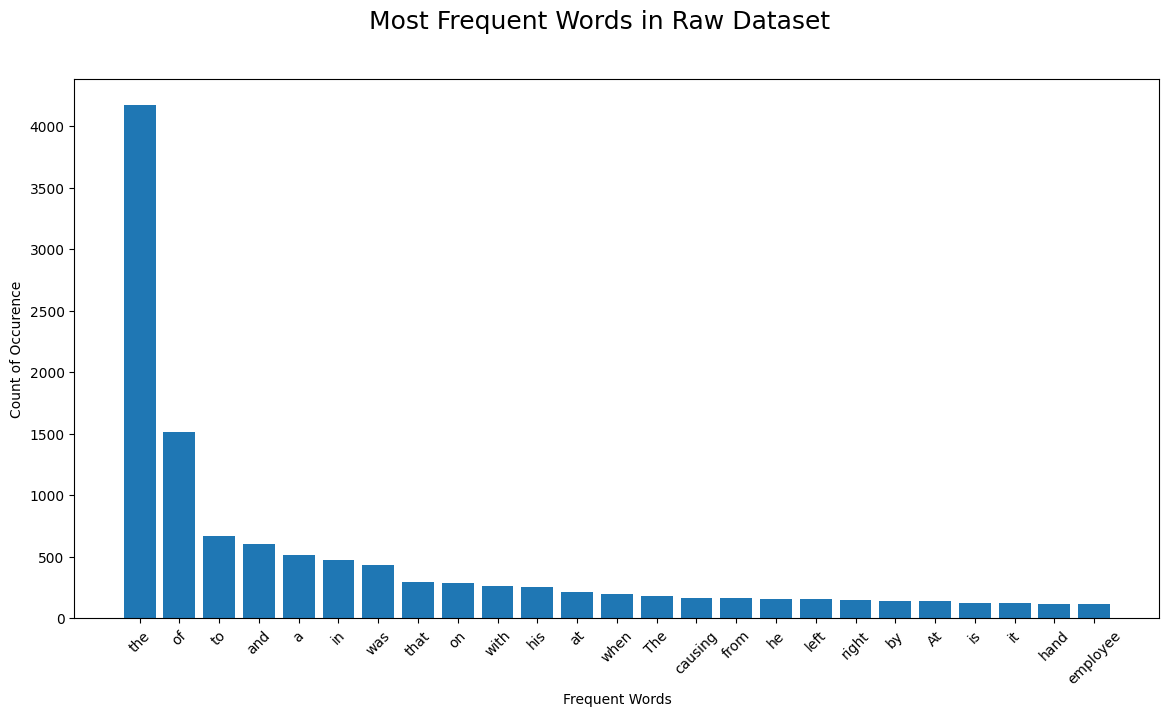

In [ ]:
all_words = df['Description'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(14,7))
plt.suptitle('Most Frequent Words in Raw Dataset',fontsize =18)
plt.xlabel('Frequent Words')
plt.ylabel('Count of Occurence')
plt.bar(all_words[0:25].index,height = all_words[0:25])
plt.grid(False)
plt.xticks(rotation=45)
plt.show();

Most frequently occuring words in Description after cleaning using NLP Preprocessing procedures

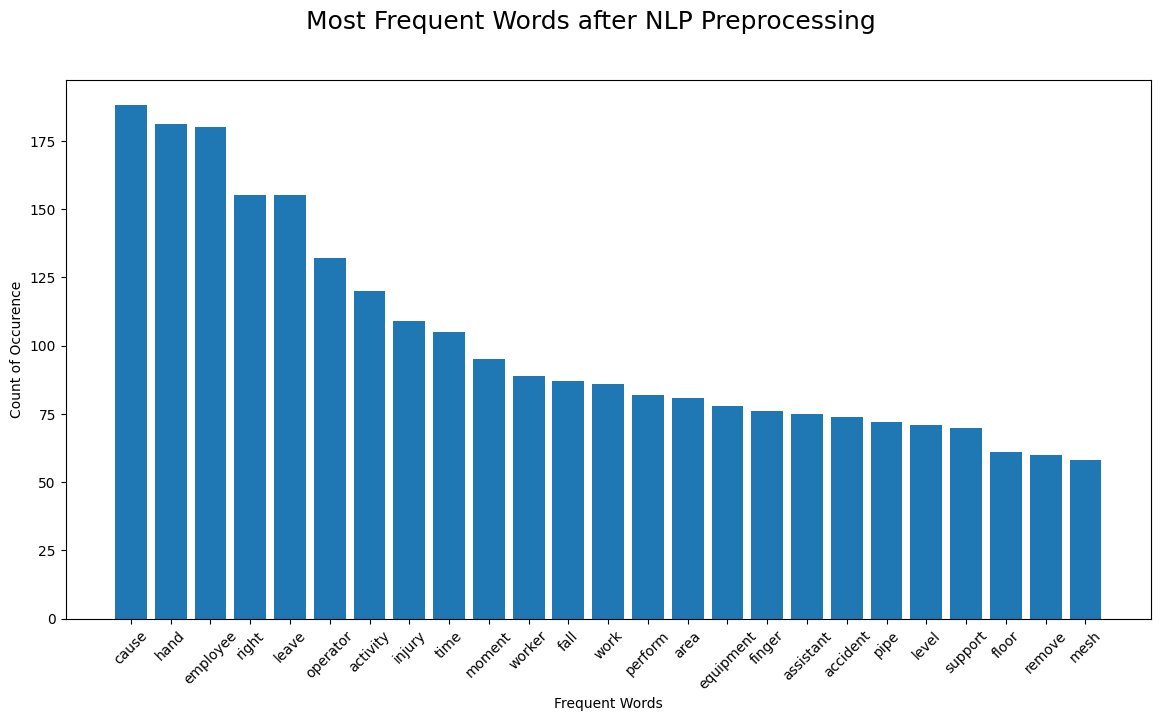

In [ ]:
all_words = df['Cleaned_Description'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(14,7))
plt.suptitle('Most Frequent Words after NLP Preprocessing',fontsize =18)
plt.xlabel('Frequent Words')
plt.ylabel('Count of Occurence')
plt.bar(all_words[0:25].index,height = all_words[0:25])
plt.grid(False)
plt.xticks(rotation=45)
plt.show();

**Observation**

It is seen that after cleaning the raw dataset the words that provide more context and information about the accidents are in the Cleaned_Description column. These will be used for embeddings and model building.


**Generate Wordcloud to visualize the cleaned Descriptions**

There are 76346 words in the combination of all texts.


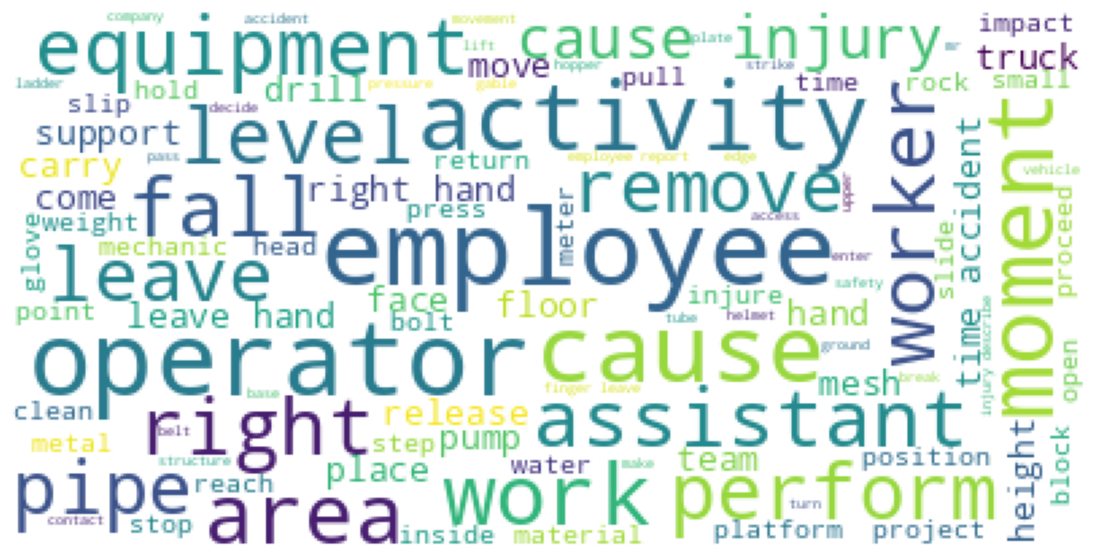

In [ ]:
all_texts = " ".join(texts for texts in df.Cleaned_Description)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Calculate the desired Summary
summary_stats = df[['Original_Description_Length', 'Cleaned_Description_Length']].agg(['max', 'min', 'mean'])

# Display the results as a table
print("Comparison of Original length vs Cleaned length of Descriptions")
# print(summary_stats.to_string())
summary_stats


Comparison of Original length vs Cleaned length of Descriptions
      Original_Description_Length  Cleaned_Description_Length
max                        183.00                       82.00
min                         16.00                        7.00
mean                        65.66                       26.25


**Observation**

It is seen that the length of the descriptions has been reduced after cleaning by removing the unnecessary words. The average length of cleaned descriptions has been reduced to 26 from the earlier high value of 65

**Visualizing the distribution of the length of Cleaned_Description column**

<Axes: xlabel='Cleaned_Description_Length'>

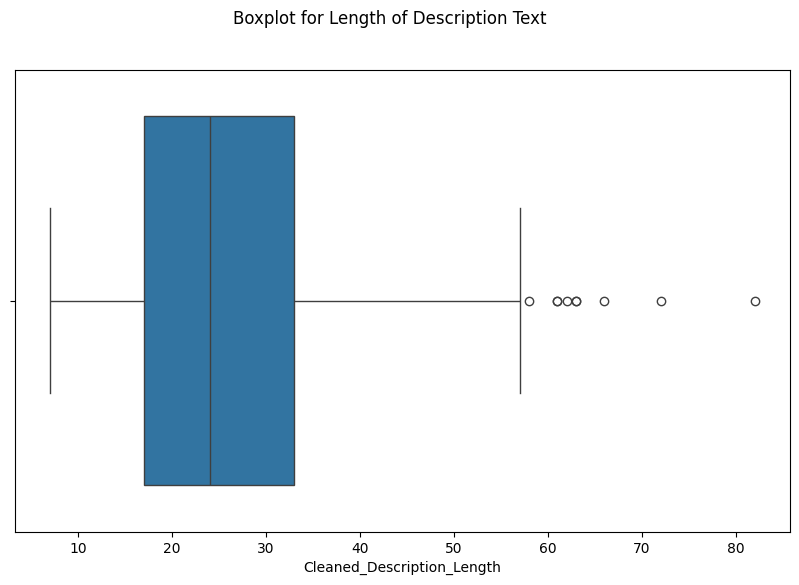

In [ ]:
plt.figure(figsize=(9,6))
plt.suptitle('Boxplot for Length of Description Text')
sns.boxplot(x = 'Cleaned_Description_Length', data=df)
# plt.title('Box plot for P_incidence')

<Axes: xlabel='Cleaned_Description_Length', ylabel='Count'>

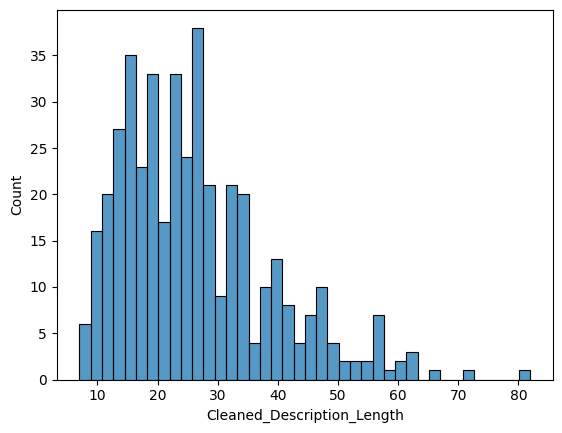

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x="Cleaned_Description_Length", kde=False, bins=40)

There are some very extreme outliers in the Cleaned Description column.

**Observations**

NLP Preprocessing techniques have been utilized and we have a clean dataset

This clean dataset will be used to train our Machine Learning models

We will save the cleaned dataset to a **csv file** for our future endeavors

In [ ]:
df.to_csv('DataSet_Cleaned_Descriptions.csv', index=False)


**Import Language Processed and Cleaned CSV file when necessary**

The column **'Cleaned_Description'** contains the clean descriptions that we shall use for model building purposes

In [ ]:
file_path = '/content/drive/MyDrive/Capstone/DataSet_Cleaned_Descriptions.csv'
df = pd.read_csv(file_path)

# **Function Declarations for Model Building, Training and Printing Metrics**

**Train-Test Split and Encoding Target variable**

Functions to create Training and Test sets for each embedding and One hot Encoding the Target Variable

In [ ]:
def create_Xy_samples(embedding):
  X = description_features if embedding == 'tfidf' else df_Word2Vec.copy() if embedding == 'w2v' else df_Glove.copy()
  y = df["Accident_Level"]
  # Split data into training and testing set.
  X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, stratify = y)

  print("Shape of training and testing data \n[X_train, y_train, X_test, y_test]" )
  print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
def create_encoded_target(y_train,y_test):
  # Convert target to "one-hot" vectors
  # Initialize the OneHotEncoder
  OHencoder = OneHotEncoder(sparse=False)
  y_train_encoded = OHencoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
  y_test_encoded = OHencoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

  # print("Shape of training and testing data:" ,X_train.shape,y_train.shape,X_test.shape, y_test.shape)
  print("\nShape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]:" ,y_train_encoded.shape, y_test_encoded.shape)
  print("\nFirst 5 training labels of target variable before encoding : \n", y_train[:5])
  print("\nThe same 5 target variables as one-hot encoded vectors :\n", y_train_encoded[:5])
  return y_train_encoded, y_test_encoded

**ML Models and Evaluation Function**

Functions to create tradition ML models, print the metrics, Classification Report and Confusion Matrix

In [ ]:
#Function to run the corresponding ML models based on callbacks
def Execute_model(X_train, y_train, X_test, y_test, model, emb, bal):
  match model:
        case 'LR':
            model = LogisticRegression(class_weight="balanced", multi_class="multinomial", solver="lbfgs")
            modelname = "Logistic Regression"
        case 'RFC':
            model = RandomForestClassifier(n_estimators=100, max_depth=5)
            modelname = "Random Forest"
        case 'SVM':
            model = SVC(gamma=0.025, C=3)
            modelname = "Support Vector Machine"
        case 'XGB':
            model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, gamma=0, objective="multi:softprob", eval_metric='mlogloss'  )
            modelname = "XGBoost"
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  training_time = round((end_time - start_time),2)
  # print("\nTraining time: ", training_time, "seconds\n")
  # Predicting on train data
  y_pred_train = model.predict(X_train)
  # Predicting on test data
  y_pred_test = model.predict(X_test)
  #Calls function to display metrics
  print_Metrics(y_train, y_pred_train, y_test, y_pred_test, modelname, emb, bal, training_time)
  return None

In [ ]:
def print_Metrics(y_train, y_pred_train, y_test, y_pred_test, modelname, emb, bal, training_time):
  print(f"Confusion Matrix - {emb} - {modelname} - {bal} - Training")
  plot_confusion_matrix(y_train, y_pred_train)
  print(f"\nConfusion Matrix - {emb} - {modelname} - {bal} - Testing")
  plot_confusion_matrix(y_test, y_pred_test)
  print(f"Classification Report - {emb} - {modelname} - {bal} - Training")
  print(classification_report(y_train,y_pred_train))
  print(f"Classification Report - {emb} - {modelname} - {bal} - Testing")
  print(classification_report(y_test,y_pred_test))
  #Accuracy
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print("Training Accuracy (%): ", round(train_accuracy*100, 2))
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print("Testing Accuracy (%): ", round(test_accuracy*100, 2))
  f1 = f1_score(y_test, y_pred_test, average="weighted")
  print("F1 score:", round(f1*100, 2))
  print("\nTraining time: ", training_time, "seconds\n")
  precision = precision_score(y_test, y_pred_test,average="weighted")
  recall = recall_score(y_test, y_pred_test,average="weighted")

  ML_list = ["Logistic Regression", "Random Forest", "Support Vector Machine", "XGBoost"]
  if modelname in ML_list:
    MLstats_df.loc[len(MLstats_df.index)] = [modelname, emb, bal, round(train_accuracy*100, 2), round(test_accuracy*100, 2), round(precision*100, 2), round(recall*100, 2), round(f1*100, 2), training_time]
  else:
    NNstats_df.loc[len(NNstats_df.index)] = [modelname, emb, bal, round(train_accuracy*100, 2), round(test_accuracy*100, 2), round(precision*100, 2), round(recall*100, 2), round(f1*100, 2), training_time]
  return None

In [ ]:
#Function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize = (5, 4))
    label_list = ['I','II','III','IV','V']
    sns.heatmap(cm, annot = labels,  fmt = '', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual Accident Level')
    plt.xlabel('Predicted Accident Level')
    plt.show()
    return None

**Oversampling with SMOTE and ADASYN**

Functions to create Training and Test sets using the oversampling techniques

In [ ]:
def create_SMOTE_Xy(X_train, y_train):
  # Define the SMOTE oversampler
  smote = SMOTE(sampling_strategy='not majority')
  # Apply SMOTE to the training data
  X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  print("Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]")
  print(X_train_smote.shape,y_train_smote.shape,X_test.shape, y_test.shape)
  return X_train_smote, y_train_smote

In [ ]:
def create_ADASYN_Xy(X_train, y_train):
  # Define the ADASYN oversampler
  adasyn = ADASYN(sampling_strategy='not majority')
  # Apply ADASYN to the training data
  X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
  print("Shape of Training and Test sets after ADASYN operation \n [X_train_adasyn, y_train_adasyn, X_test, y_test]")
  print(X_train_adasyn.shape,y_train_adasyn.shape,X_test.shape, y_test.shape)
  return X_train_adasyn, y_train_adasyn

**Neural Networks**

Functions to build model, execute the model, RandomSearchCV for hyperparameter tuning, plotting performance graphs of trained model

In [ ]:
def build_ANN_model(optimizer = 'Adam', learn_rate=0.001, neurons_1 = 512, neurons_2 = 64, neurons_3 = 64, num_classes=5):
  # Create model
  nn_model = Sequential()
  nn_model.add(Dense(input_dim = inputDim, units=neurons_1, activation = 'relu', kernel_initializer='he_uniform' ))
  # nn_model.add(BatchNormalization())
  nn_model.add(Dropout(0.2))
  nn_model.add(Dense(neurons_2, activation='relu', kernel_initializer='he_uniform' ))
  # nn_model.add(BatchNormalization())
  nn_model.add(Dropout(0.2))
  nn_model.add(Dense(neurons_3, activation='relu', kernel_initializer='he_uniform' ))
  # nn_model.add(BatchNormalization())
  nn_model.add(Dropout(0.2))
  nn_model.add(Dense(neurons_3, activation='relu', kernel_initializer='he_uniform' ))
  # nn_model.add(BatchNormalization())
  nn_model.add(Dropout(0.2))
  nn_model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  nn_model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  return nn_model

In [ ]:
def run_ANN_model(modelinstance, X_train, X_test, y_train, y_train_encoded, y_test, epochs, batch_size, emb, bal):
  modelinstance.summary()
  #-USING CLASS WEIGHTS-
  # Calculate class weights
  # class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
  # print(class_weights)
  # class_weights_dict = {i: weight for i, weight in enumerate(class_weights)} # Convert to dictionary
  # print(class_weights_dict)
  # Compile the model with class weights
  # nn_model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'], class_weight=class_weights)
  # ANNmodelResult = nn_model.fit(X_train,y_train_encoded, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=0, class_weight=class_weights_dict)
  start_time = time.time()
  # nn_model_Result = modelinstance.fit(X_train,y_train_encoded, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=0, class_weight=class_weights_dict)
  nn_model_Result = modelinstance.fit(X_train,y_train_encoded, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=0)
  end_time = time.time()
  training_time = round((end_time - start_time), 2)
  print(f"\n ----- TRAINING COMPLETED SUCCESSFULLY FOR {epochs} EPOCHS USING {emb} EMBEDDINGS -----\n")

  y_pred_train = modelinstance.predict(X_train)
  y_pred_test = modelinstance.predict(X_test)

  y_pred_train_label=[]
  y_pred_test_label=[]

  for i in y_pred_train:
    y_pred_train_label.append(np.argmax(i))
  for j in y_pred_test:
    y_pred_test_label.append(np.argmax(i))

  plot_loss_accuracy(modelResult = nn_model_Result)
  print("Printing Metrics for the model")
  print_Metrics(y_train, y_pred_train_label, y_test, y_pred_test_label, emb=emb, modelname='Tuned Neural Network', bal=bal, training_time=training_time)

  return nn_model_Result

In [ ]:
#Function for hyperparameter tuning of neural networks with RandomSearchCV
def tune_neural_network(X_train, y_train):
  # Define hyperparameters
  hyperparameters = {
                      'epochs': [30, 50],
                      'batch_size': [20, 50, 100],
                      'neurons_1': [128, 256, 512],
                      'neurons_2': [128, 256, 512],
                      'neurons_3': [32, 64, 128],
                      'optimizer': ['SGD', 'Adam'],
                      # 'learn_rate': [0.001, 0.01]
                    }
  nn_model = KerasClassifier(build_fn=build_ANN_model, verbose=0)

  #Perform RandomSearchCV
  random_search = RandomizedSearchCV(estimator=nn_model, param_distributions=hyperparameters, n_iter=20, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)
  # random_search = GridSearchCV(estimator=nn_model, param_grid=hyperparameters, cv=5, verbose=1, n_jobs=-1)

  start_time = time.time()
  random_search.fit(X_train, y_train)
  end_time = time.time()
  training_time = end_time - start_time
  print("Training time: ", training_time, "seconds")

  # Print the best hyperparameters found
  print("Best Parameters:", random_search.best_params_)
  return random_search.best_params_


In [ ]:
def build_RNN_LSTM_model(vector_dim, vocab_size, optimizer='Adam', embedding_dim=128, max_length=65, num_classes = 5, rnntype='LSTM'):
  # Create model
  # Both TEXT and VECTORS have been added as Input branches, which are later concatenated as a single input

  # Text branch
  text_input = Input(shape=(max_length,), name='text_input')
  text_embedding = Embedding(vocab_size, embedding_dim, input_length=max_length)(text_input)
  match rnntype:
    case 'RNN':
      text_layer = SimpleRNN(64)(text_embedding)  # Simple RNN layer
    case 'LSTM':
      text_layer = LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(text_embedding)
      text_layer = LSTM(64, dropout=0.3, recurrent_dropout=0.3)(text_layer)
    case 'BiLSTM':
      text_layer = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(text_embedding)
      text_layer = Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3))(text_layer)

  # Vector branch
  vector_input = Input(shape=(vector_dim,), name='vector_input')
  vector_layer = Dense(64, activation='relu')(vector_input)

  # Concatenate branches
  concatenated_layer = concatenate([text_layer, vector_layer])
  # Additional Dense layer with 16 nodes
  additional_layer = Dense(16, activation='relu')(concatenated_layer)

  # Output layer
  output = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(additional_layer)

  # Build the model
  rnnmodel = Model(inputs=[text_input, vector_input], outputs=output)
  rnnmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return rnnmodel

In [ ]:
def run_RNN_LSTM_model(modelinstance, X_train_text, X_train_vector, X_test_text, X_test_vector, y_train, y_train_encoded, y_test, epochs, batch_size, emb, bal):
  modelinstance.summary()
  start_time = time.time()

  rnn_model_Result = modelinstance.fit([X_train_text, X_train_vector],y_train_encoded, epochs=epochs, validation_split=0.15, batch_size=batch_size, verbose=0)
  # history = rnn_model.fit([X_train_text, X_train_vector], y_train_encoded, epochs=20, batch_size=32, validation_split=0.1)

  end_time = time.time()
  training_time = round((end_time - start_time), 2)
  print(f"\n ----- TRAINING COMPLETED SUCCESSFULLY FOR {epochs} EPOCHS USING {emb} EMBEDDINGS -----\n")

  y_pred_train = modelinstance.predict([X_train_text, X_train_vector])
  y_pred_test = modelinstance.predict([X_test_text, X_test_vector])

  y_pred_train_label=[]
  y_pred_test_label=[]

  for i in y_pred_train:
    y_pred_train_label.append(np.argmax(i))
  for j in y_pred_test:
    y_pred_test_label.append(np.argmax(i))

  plot_loss_accuracy(modelResult = rnn_model_Result)
  print("Printing Metrics for the model")
  model = 'Simple RNN' if modelinstance == rnn_model else 'LSTM' if modelinstance == lstm_model else 'Bidirectional LSTM'
  print_Metrics(y_train, y_pred_train_label, y_test, y_pred_test_label, emb=emb, modelname=model, bal=bal, training_time=training_time)

  return rnn_model_Result

In [ ]:
# Function for plotting the progress of training
def plot_loss_accuracy(modelResult):

  #loss curve
  plt.plot(modelResult.history['loss'], label='Train loss')
  plt.plot(modelResult.history['val_loss'], label='val_loss')
  plt.title('Model Loss')
  plt.ylim([0, 5])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  #Accuracy curve
  plt.plot(modelResult.history['accuracy'])
  plt.plot(modelResult.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.grid(True)
  plt.show()

  return None

In [ ]:
MLstats_df = pd.DataFrame(columns=['ModelName', 'Embedding', 'Balancing','Train Acc(%)','Test Acc(%)','Precision(%)','Recall(%)','F1 Score','Train time(secs)'])
NNstats_df = pd.DataFrame(columns=['ModelName', 'Embedding', 'Balancing','Train Acc(%)','Test Acc(%)','Precision(%)','Recall(%)','F1 Score','Train time(secs)'])

In [ ]:
def highlight_cells(val):
  return 'border: 2px solid black'

# Apply styling to DataFrame
styled_df = stats_df.style.applymap(highlight_cells)
# Display styled DataFrame
# styled_df


# **Model Building**

In [ ]:
#Encode Target Variable
le=LabelEncoder()
df['Accident_Level']=le.fit_transform(df['Accident_Level'])
df['Accident_Level'].value_counts()

Accident_Level
0    316
1     40
2     31
3     30
4      8
Name: count, dtype: int64

## **Text Vectorization techniques**

## **Count Vectorizer**

We'll use the CountVectorizer class of sklearn to vectorize the data using Bag of Words (BoW).

We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

We then consider only the top n terms by frequency

*   n is a hyperparameter that one can change and experiment with



In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(df['Cleaned_Description'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(425, 1000)

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [ ]:
# Checking the words considered by BoW model
words

array(['able', 'abruptly', 'access', 'accident', 'accord', 'acid',
       'action', 'activate', 'activity', 'additive', 'adjust',
       'adjustment', 'advance', 'affect', 'ahead', 'alejandro', 'alert',
       'align', 'allergic', 'allergy', 'alpha', 'aluminum', 'ampoloader',
       'anchor', 'anfoloader', 'ankle', 'anode', 'anterior', 'antonio',
       'app', 'apparently', 'appear', 'apply', 'approach', 'approx',
       'area', 'arm', 'arrange', 'arrive', 'ask', 'assemble', 'assembly',
       'assist', 'assistant', 'atlas', 'attach', 'attack', 'attempt',
       'attend', 'attention', 'autoclave', 'automatic', 'auxiliary',
       'average', 'avoid', 'away', 'backwards', 'bag', 'balance',
       'balloon', 'bank', 'bar', 'barbed', 'base', 'basin', 'basket',
       'battery', 'beam', 'bear', 'bee', 'beehive', 'begin', 'belly',
       'belt', 'bend', 'bite', 'blade', 'blanket', 'blast', 'block',
       'blow', 'blunt', 'board', 'bodeguero', 'body', 'boiler', 'bolster',
       'bolt', 'bom

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

able  abruptly  access  accident  accord  acid  action  activate  activity  \
0     0         0       0         0       0     0       0         0         0   
1     0         0       0         0       0     0       0         0         0   
2     0         0       0         0       0     0       0         0         0   
3     0         0       0         0       0     0       0         0         0   
4     0         0       0         0       0     0       0         0         0   

   additive  adjust  adjustment  advance  affect  ahead  alejandro  alert  \
0         0       0           0        0       0      0          0      0   
1         0       0           0        0       0      0          0      0   
2         0       0           0        0       0      0          0      0   
3         0       0           0        0       0      0          0      0   
4         0       0           0        0       0      0          0      0   

   align  allergic  allergy  alpha  aluminum  ampoloader  anchor  anfoloader  \
0      0         0        0      0         0           0       0           0   
1      0         0        0      0         0           0       0           0   
2      0         0        0      0         0           0       0           0   
3      0         0        0      0         0           0       0           0   
4      0         0        0      0         0           0       0           0   

   ankle  anode  anterior  antonio  app  apparently  appear  apply  approach  \
0      0      0         0        0    0           0       0      0         0   
1      0      0         0        0    0           0       0      0         0   
2      0      0         0        0    0           0       0      0         0   
3      0      0         0        0    0           0       0      0         0   
4      0      0         0        0    0           0       0      0         0   

   approx  area  arm  arrange  arrive  ask  assemble  assembly  assist  \
0       0     0    0        0       0    0         0         0       0   
1       0     1    0        0       0    0         0         0       0   
2       0     1    0        0       0    0         0         0       0   
3       0     0    0        0       0    0         0         0       0   
4       0     0    0        0       0    0         0         0       0   

   assistant  atlas  attach  attack  attempt  attend  attention  autoclave  \
0          0      0       0       0        0       0          0          0   
1          0      0       0       0        0       0          0          0   
2          0      0       0       0        0       0          0          0   
3          1      0       0       0        0       0          0          0   
4          0      0       0       0        0       0          0          0   

   automatic  auxiliary  average  avoid  away  backwards  bag  balance  \
0          0          0        0      0     0          0    0        0   
1          0          0        0      0     0          0    0        0   
2          0          0        0      0     0          0    0        0   
3          0          1        0      0     0          0    0        0   
4          0          0        0      0     0          0    0        0   

   balloon  bank  bar  barbed  base  basin  basket  battery  beam  bear  bee  \
0        0     0    0       0     0      0       0        0     1     0    0   
1        0     0    0       0     0      0       0        0     0     0    0   
2        0     0    0       0     0      0       0        0     0     0    0   
3        0     0    0       0     0      0       0        0     0     0    0   
4        0     0    0       0     0      0       0        0     0     0    0   

   beehive  begin  belly  belt  bend  bite  blade  blanket  blast  block  \
0        0      0      0     0     0     0      0        0      0      0   
1        0      0      0     0     0     0      0        0      0      0   
2        0      0      

In [ ]:
X = df_BOW.copy()
y = df["Accident_Level"]
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, random_state = 42, stratify = y)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((340, 1000), (340,), (85, 1000), (85,))

In [ ]:
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)

Shape of Training and Test sets after SMOTE operation
(1265, 1000) (1265,) (85, 1000) (85,)


In [ ]:
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)

Shape of Training and Test sets after ADASYN operation
(1264, 1000) (1264,) (85, 1000) (85,)


### **Random Forest using Count Vectorizer**

We shall use these Word Vectors on Random Forest Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


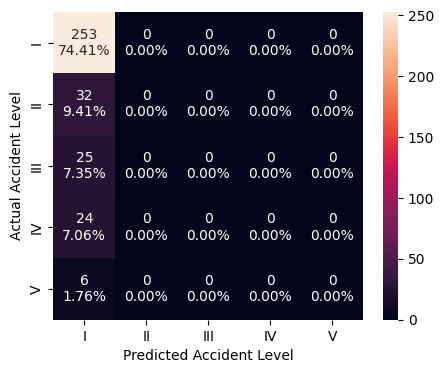


Confusion Matrix for Testing Data


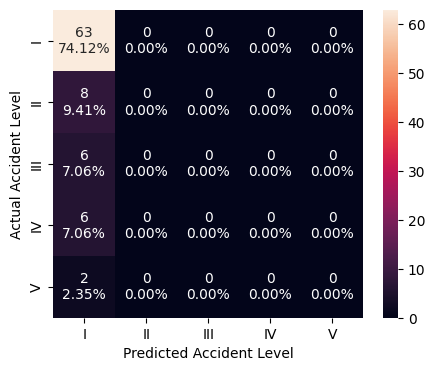

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='RFC', emb='Count Vectorizer', bal='Unbalanced')

**Observations**

It is evident that the model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We shall try some oversampling techniques to fix this problem.

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


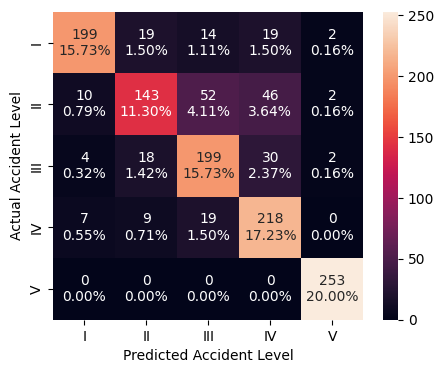


Confusion Matrix for Testing Data


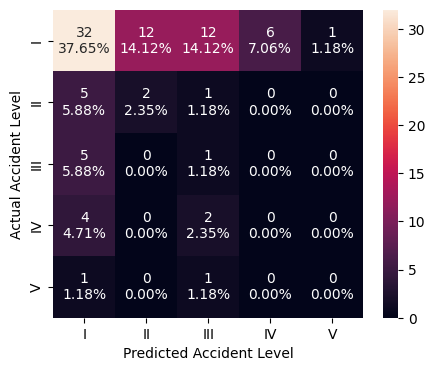

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       253
           1       0.76      0.57      0.65       253
           2       0.70      0.79      0.74       253
           3       0.70      0.86      0.77       253
           4       0.98      1.00      0.99       253

    accuracy                           0.80      1265
   macro avg       0.81      0.80      0.80      1265
weighted avg       0.81      0.80      0.80      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.68      0.51      0.58        63
           1       0.14      0.25      0.18         8
           2       0.06      0.17      0.09         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.41        85
   macro avg       0.18      0.18      0.17        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='RFC', emb='Count Vectorizer', bal='SMOTE')

**Observations**

We have used SMOTE to balance the data

The model overfits on training data but performance reduces on testing data

The performance on minority classes is still lacking

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


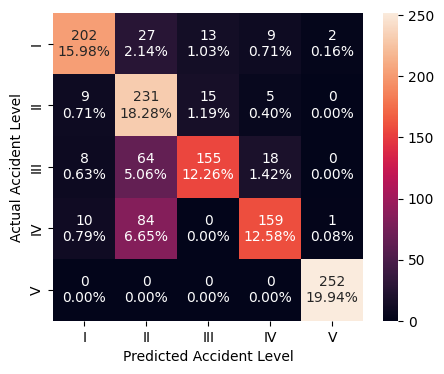


Confusion Matrix for Testing Data


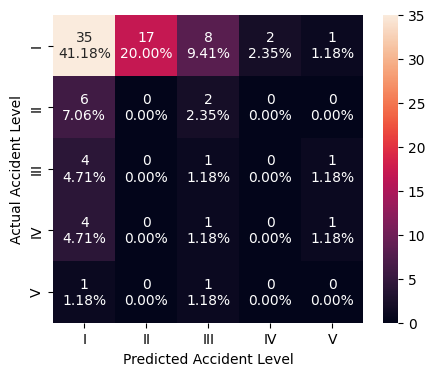

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       253
           1       0.57      0.89      0.69       260
           2       0.85      0.63      0.72       245
           3       0.83      0.63      0.71       254
           4       0.99      1.00      0.99       252

    accuracy                           0.79      1264
   macro avg       0.82      0.79      0.79      1264
weighted avg       0.82      0.79      0.79      1264

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        63
           1       0.00      0.00      0.00         8
           2       0.08      0.17      0.11         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        85
   macro avg       0.16      0.14      0.14        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='RFC', emb='Count Vectorizer', bal='ADASYN')

**Observations**

We have used ADASYN to balance the data in this case

The model overfits on training data but even though the performance is reduced on testing data it still produces almost 70% test accuracy

The performance on minority classes is still a bit low in all cases

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

## **TF-IDF Vectorizer**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.
tfidfVectorizer = TfidfVectorizer(max_features=2000, stop_words='english', ngram_range=(2, 2))
# tfidfVectorizer = TfidfVectorizer(max_features=2000)
description_features = tfidfVectorizer.fit_transform(df['Cleaned_Description'])
description_features = description_features.toarray()
description_features.shape

(425, 1916)

In [ ]:
# # Storing independent variable
# X = description_features
# # Storing target variable
# y = df["Accident_Level"]
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, random_state = 42, stratify = y)
# X_train.shape,y_train.shape,X_test.shape, y_test.shape

X_train, X_test, y_train, y_test = create_Xy_samples(embedding='tfidf')

((340, 1916), (340,), (85, 1916), (85,))

In [ ]:
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)

Shape of Training and Test sets after SMOTE operation
(1265, 1916) (1265,) (85, 1916) (85,)


In [ ]:
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)

Shape of Training and Test sets after ADASYN operation
(1270, 1916) (1270,) (85, 1916) (85,)


### **Random Forest using TF-IDF**

We shall use these TF-IDF Vectors on Random Forest Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


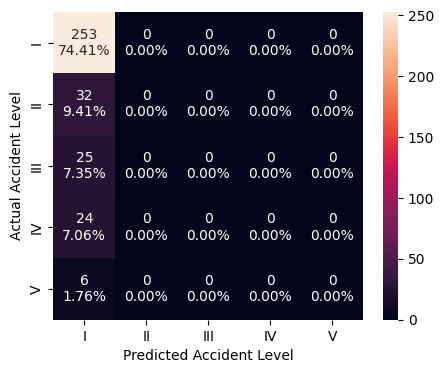


Confusion Matrix for Testing Data


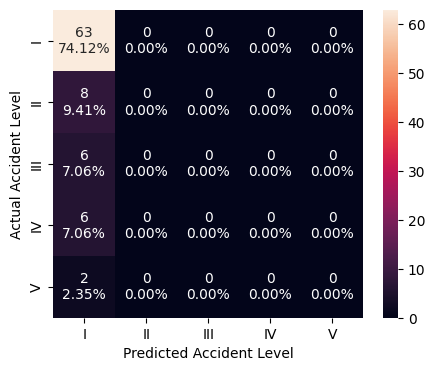

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='RFC', emb='TfIdf', bal='Unbalanced')

**Observations**

It is evident that the model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We shall try some oversampling techniques to fix this problem.

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


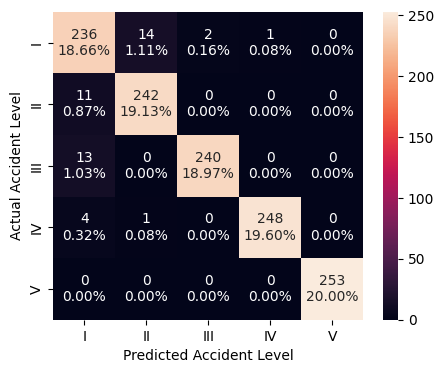


Confusion Matrix for Testing Data


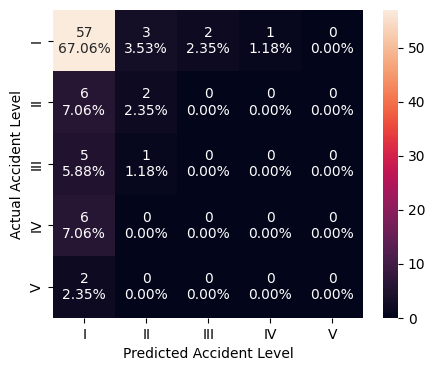

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       253
           1       0.94      0.96      0.95       253
           2       0.99      0.95      0.97       253
           3       1.00      0.98      0.99       253
           4       1.00      1.00      1.00       253

    accuracy                           0.96      1265
   macro avg       0.96      0.96      0.96      1265
weighted avg       0.96      0.96      0.96      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        63
           1       0.33      0.25      0.29         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        85
   macro avg       0.22      0.23      0.22        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='RFC', emb='TfIdf', bal='SMOTE')

**Observations**

We have used SMOTE to balance the data

The model overfits on training data but performance reduces on testing data

The performance on minority classes is still lacking

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


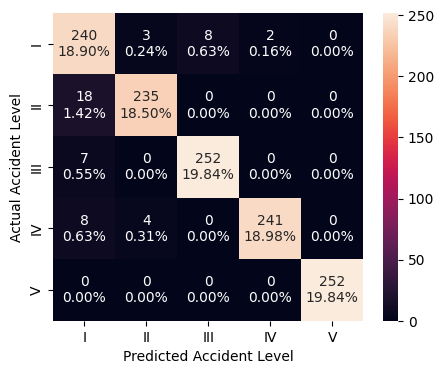


Confusion Matrix for Testing Data


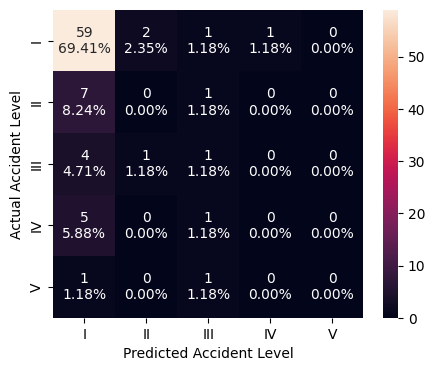

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       253
           1       0.97      0.93      0.95       253
           2       0.97      0.97      0.97       259
           3       0.99      0.95      0.97       253
           4       1.00      1.00      1.00       252

    accuracy                           0.96      1270
   macro avg       0.96      0.96      0.96      1270
weighted avg       0.96      0.96      0.96      1270

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        63
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        85
   macro avg       0.20      0.22      0.21        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='RFC', emb='TfIdf', bal='ADASYN')

**Observations**

We have used ADASYN to balance the data in this case

The model overfits on training data but even though the performance is reduced on testing data it still produces almost 70% test accuracy

The performance on minority classes is still a bit low in all cases

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **SVM using TF-IDF**

We shall use these TFIDF vectors on Support Vector Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


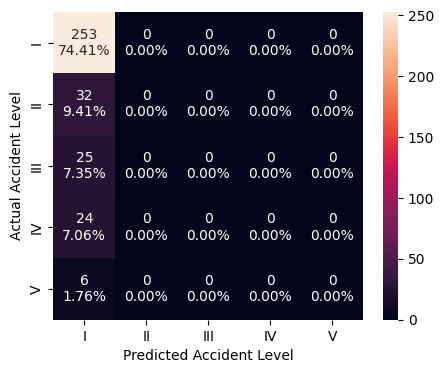


Confusion Matrix for Testing Data


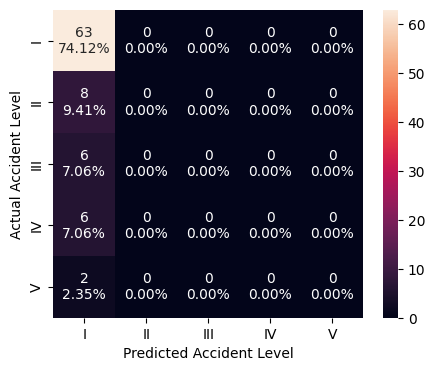

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='SVM', emb='TfIdf', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


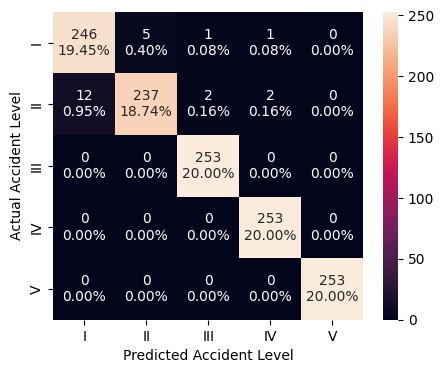


Confusion Matrix for Testing Data


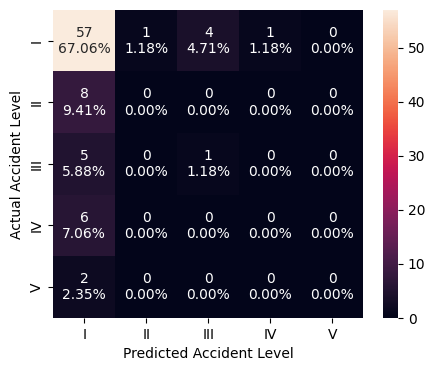

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       253
           1       0.98      0.94      0.96       253
           2       0.99      1.00      0.99       253
           3       0.99      1.00      0.99       253
           4       1.00      1.00      1.00       253

    accuracy                           0.98      1265
   macro avg       0.98      0.98      0.98      1265
weighted avg       0.98      0.98      0.98      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        63
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        85
   macro avg       0.19      0.21      0.20        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='SVM', emb='TfIdf', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


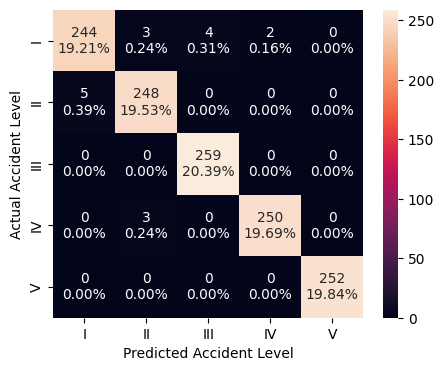


Confusion Matrix for Testing Data


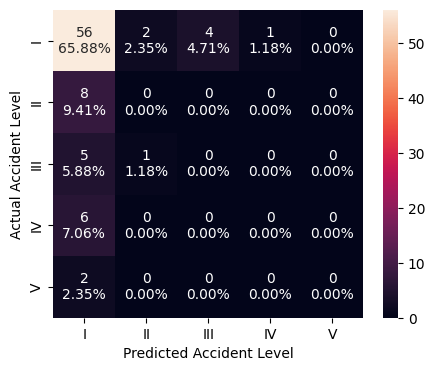

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       253
           1       0.98      0.98      0.98       253
           2       0.98      1.00      0.99       259
           3       0.99      0.99      0.99       253
           4       1.00      1.00      1.00       252

    accuracy                           0.99      1270
   macro avg       0.99      0.99      0.99      1270
weighted avg       0.99      0.99      0.99      1270

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.66        85
   macro avg       0.15      0.18      0.16        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='SVM', emb='TfIdf', bal='ADASYN')

**Observations**

The SVM model performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data


### **Logistic Regression using TF-IDF**

We shall use these TF-IDF vectors on a Logistic Regression model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


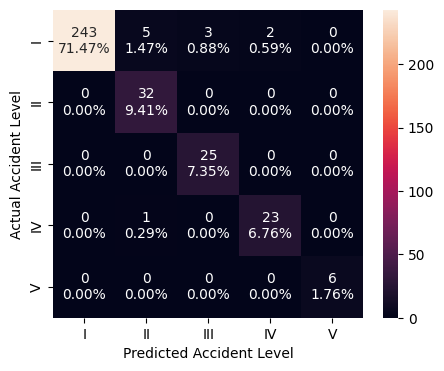


Confusion Matrix for Testing Data


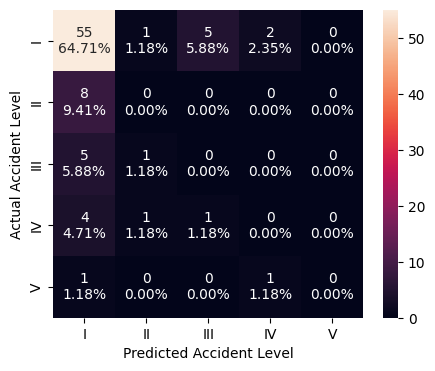

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       253
           1       0.84      1.00      0.91        32
           2       0.89      1.00      0.94        25
           3       0.92      0.96      0.94        24
           4       1.00      1.00      1.00         6

    accuracy                           0.97       340
   macro avg       0.93      0.98      0.96       340
weighted avg       0.97      0.97      0.97       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.65        85
   macro avg       0.15      0.17      0.16        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='LR', emb='TfIdf', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


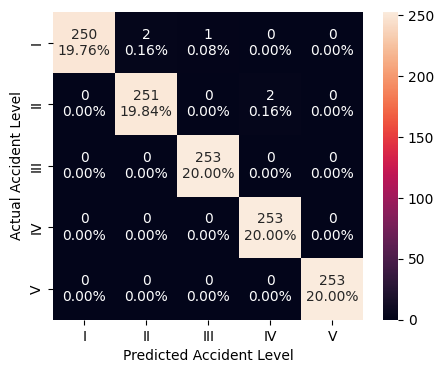


Confusion Matrix for Testing Data


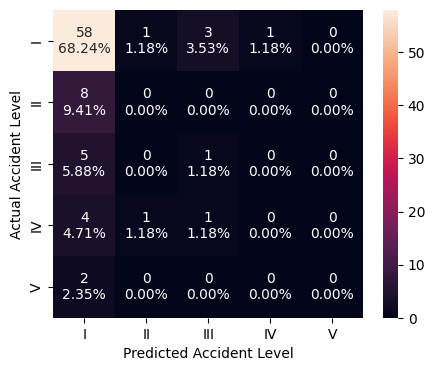

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       253
           1       0.99      0.99      0.99       253
           2       1.00      1.00      1.00       253
           3       0.99      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        63
           1       0.00      0.00      0.00         8
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        85
   macro avg       0.19      0.22      0.20        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='LR', emb='TfIdf', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


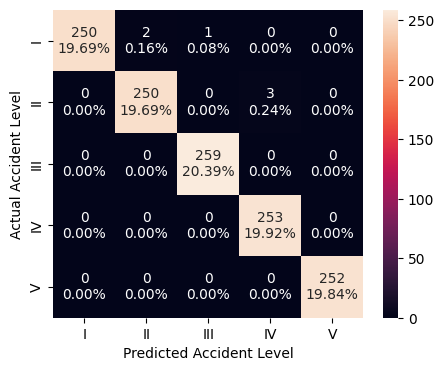


Confusion Matrix for Testing Data


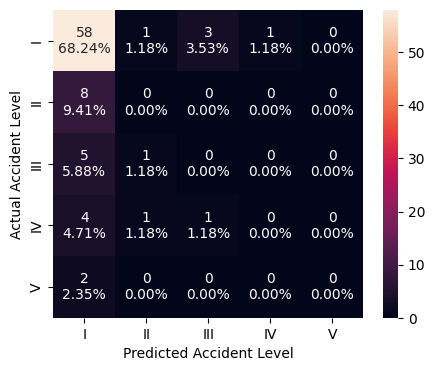

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       253
           1       0.99      0.99      0.99       253
           2       1.00      1.00      1.00       259
           3       0.99      1.00      0.99       253
           4       1.00      1.00      1.00       252

    accuracy                           1.00      1270
   macro avg       1.00      1.00      1.00      1270
weighted avg       1.00      1.00      1.00      1270

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        85
   macro avg       0.15      0.18      0.17        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='LR', emb='TfIdf', bal='ADASYN')

**Observations**

The Logistic Regression model also performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **XGBoost using TF-IDF**

We shall use these TF-IDF Vectors on XGBoost model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


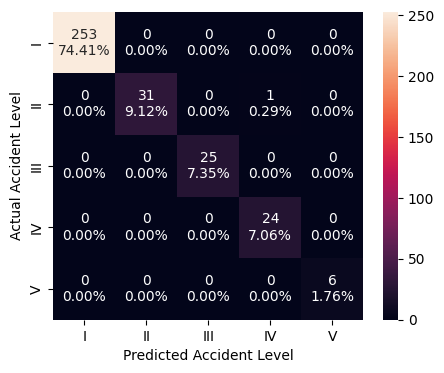


Confusion Matrix for Testing Data


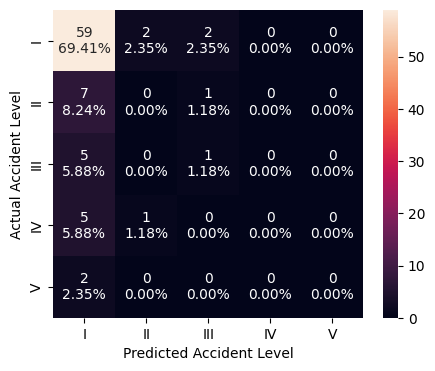

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      0.97      0.98        32
           2       1.00      1.00      1.00        25
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00         6

    accuracy                           1.00       340
   macro avg       0.99      0.99      0.99       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        63
           1       0.00      0.00      0.00         8
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        85
   macro avg       0.20      0.22      0.21        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='XGB', emb='TfIdf', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


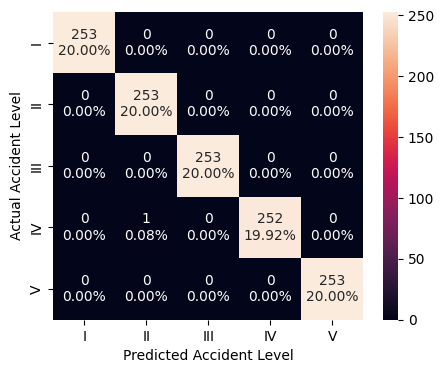


Confusion Matrix for Testing Data


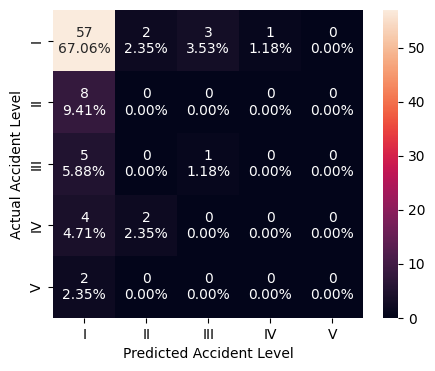

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        63
           1       0.00      0.00      0.00         8
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        85
   macro avg       0.20      0.21      0.20        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='XGB', emb='TfIdf', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


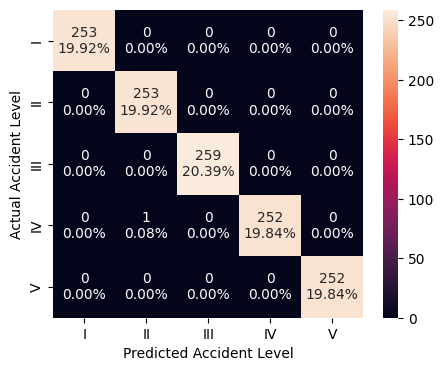


Confusion Matrix for Testing Data


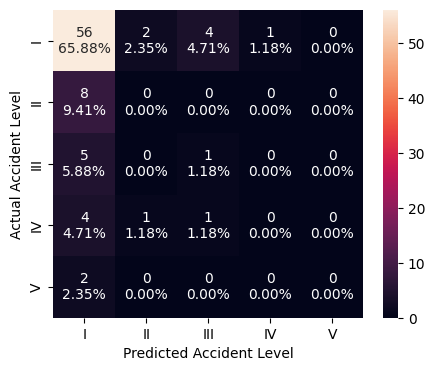

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       259
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       252

    accuracy                           1.00      1270
   macro avg       1.00      1.00      1.00      1270
weighted avg       1.00      1.00      1.00      1270

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        63
           1       0.00      0.00      0.00         8
           2       0.17      0.17      0.17         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        85
   macro avg       0.18      0.21      0.20        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='XGB', emb='TfIdf', bal='ADASYN')

**Observations**

The XGBoost model is found to be overfitting in training data but performs poorly on minority classes in test with the unbalanced data

When oversampling techniques were used the performance on test data reduces marginally but the model continues to overfit the training data

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

**Final observations - TF-IDF**

We have trained Random Forest, Logistic Regression, SVM and XGBoost using the TF-IDF Vectors that were created.

To deal with the imbalanced data we have used both SMOTE and ADASYN to oversample the dataset


# **Embeddings**

## **Word2Vec**

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in df['Cleaned_Description'].values]
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 1925


In [ ]:
# Checking top 5 similar words to the word
similar1 = model_W2V.wv.similar_by_word('crash', topn=5)
print(similar1)

[('blow', 0.40064719319343567), ('ramp', 0.3993232548236847), ('projection', 0.39421969652175903), ('hospital', 0.39189985394477844), ('unit', 0.3916230797767639)]


In [ ]:
similar2 = model_W2V.wv.similar_by_word('spill', topn=5)
print(similar2)

[('edge', 0.7956891059875488), ('ladder', 0.7937213182449341), ('pipe', 0.793676495552063), ('slip', 0.7924398183822632), ('mechanic', 0.792220950126648)]


**Observation**

The embeddings are doing a good job of capturing contextual information

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents for the Cleaned Description
df_Word2Vec = pd.DataFrame(df['Cleaned_Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec


Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0        -0.00       0.02      -0.00       0.00       0.00      -0.01   
1        -0.00       0.00      -0.00       0.00       0.00      -0.01   
2        -0.00       0.01       0.00       0.00       0.00      -0.01   
3        -0.00       0.01       0.00       0.00       0.00      -0.01   
4        -0.00       0.01      -0.00       0.01       0.00      -0.01   
..         ...        ...        ...        ...        ...        ...   
420      -0.00       0.01      -0.00       0.00       0.00      -0.01   
421      -0.00       0.01       0.00       0.01       0.00      -0.01   
422      -0.00       0.01      -0.00       0.00       0.00      -0.01   
423      -0.00       0.02       0.00       0.01       0.00      -0.02   
424      -0.00       0.01       0.00       0.00       0.00      -0.01   

     Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0         0.01       0.04      -0.00      -0.01       -0.00       -0.01   
1         0.00       0.01      -0.00      -0.00       -0.00       -0.00   
2         0.01       0.03       0.00      -0.00       -0.00       -0.01   
3         0.01       0.03      -0.00      -0.00       -0.00       -0.01   
4         0.01       0.03      -0.00      -0.00       -0.00       -0.01   
..         ...        ...        ...        ...         ...         ...   
420       0.01       0.03       0.00      -0.00       -0.00       -0.01   
421       0.01       0.04      -0.00      -0.01       -0.00       -0.01   
422       0.01       0.03       0.00      -0.01       -0.00       -0.01   
423       0.01       0.05      -0.00      -0.01       -0.00       -0.02   
424       0.01       0.03      -0.00      -0.00       -0.00       -0.01   

     Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0          0.00        0.00       -0.01       -0.01        0.00       -0.00   
1          0.00       -0.00       -0.00       -0.00        0.00        0.00   
2          0.00       -0.00       -0.01       -0.01        0.00       -0.00   
3          0.00       -0.00       -0.01       -0.01        0.00       -0.00   
4          0.00        0.00       -0.01       -0.01        0.00       -0.00   
..          ...         ...         ...         ...         ...         ...   
420        0.00        0.00       -0.01       -0.01        0.00       -0.00   
421        0.00        0.00       -0.01       -0.01        0.00       -0.00   
422        0.00       -0.00       -0.01       -0.01        0.00       -0.00   
423        0.00        0.00       -0.01       -0.01        0.01       -0.00   
424        0.00       -0.00       -0.01       -0.01        0.00       -0.00   

     Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0          0.01       -0.01       -0.01        0.00        0.01        0.00   
1          0.00       -0.00       -0.00        0.00        0.00       -0.00   
2          0.01       -0.01       -0.01        0.00        0.01        0.00   
3          0.01       -0.00       -0.01        0.00        0.01        0.00   
4          0.01       -0.01       -0.01        0.00        0.01        0.00   
..          ...         ...         ...         ...         ...         ...   
420        0.01       -0.00       -0.01        0.00        0.01        0.00   
421        0.01       -0.01       -0.01        0.00        0.01        0.00   
422        0.01       -0.01       -0.01        0.00        0.01        0.00   
423        0.01       -0.01       -0.01        0.00        0.01        0.00   
424        0.01       -0.01       -0.01        0.00        0.01        0.00   

     Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0          0.01       -0.00       -0.02       -0.00       -0.01       -0.01   
1          0.00       -0.00       -0.01       -0.00       -0.00       -0.00   
2          0.01        0.00       -0.02        0.00       -0.01       -0.01   
3          0.

Saving the word embeddings dataframe as a csv file for subsequent use in training neural networks

In [ ]:
df_Word2Vec.to_csv('Word2Vec_Embeddings_Cleaned_Descriptions.csv', index=False)

In [ ]:
# # Storing independent variable
# X = df_Word2Vec.copy()
# # Storing target variable
# y = df["Accident_Level"]
# # y = df["Accident_Level"].map({'I':1 , 'II':2, 'III':3, 'IV':4,'V':5})
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, random_state = 42, stratify = y)
# X_train.shape,y_train.shape,X_test.shape, y_test.shape

X_train, X_test, y_train, y_test = create_Xy_samples(emb='w2v')

((340, 300), (340,), (85, 300), (85,))

In [ ]:
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)

Shape of Training and Test sets after SMOTE operation
(1265, 300) (1265,) (85, 300) (85,)


In [ ]:
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)

Shape of Training and Test sets after ADASYN operation
(1290, 300) (1290,) (85, 300) (85,)


### **Random Forest using Word2Vec**

We shall use these Word2Vec embeddings on Random Forest Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


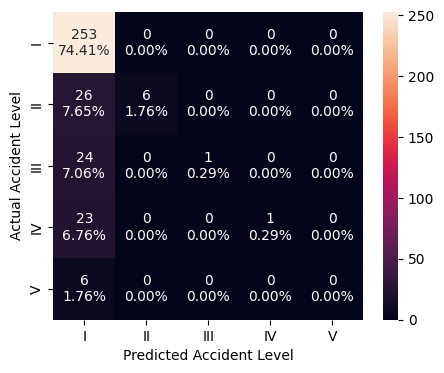


Confusion Matrix for Testing Data


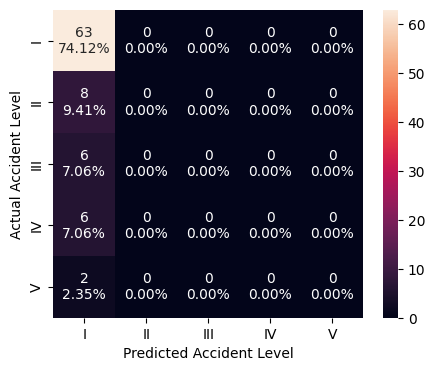

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       253
           1       1.00      0.19      0.32        32
           2       1.00      0.04      0.08        25
           3       1.00      0.04      0.08        24
           4       0.00      0.00      0.00         6

    accuracy                           0.77       340
   macro avg       0.75      0.25      0.27       340
weighted avg       0.81      0.77      0.68       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='RFC',emb='Word2Vec', bal='Unbalanced')

**Observations**

It is evident that the model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We shall try some oversampling techniques to fix this problem.

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


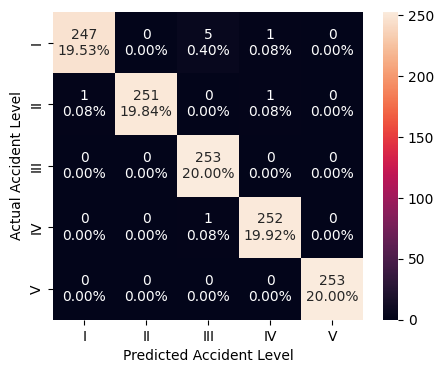


Confusion Matrix for Testing Data


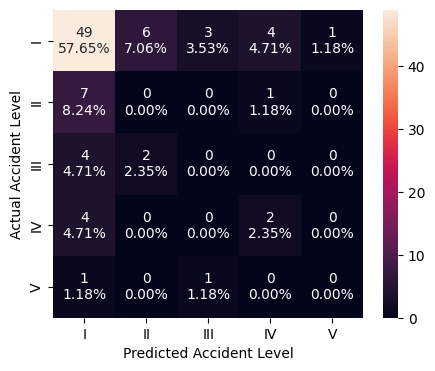

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       253
           1       1.00      0.99      1.00       253
           2       0.98      1.00      0.99       253
           3       0.99      1.00      0.99       253
           4       1.00      1.00      1.00       253

    accuracy                           0.99      1265
   macro avg       0.99      0.99      0.99      1265
weighted avg       0.99      0.99      0.99      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.29      0.33      0.31         6
           4       0.00      0.00      0.00         2

    accuracy                           0.60        85
   macro avg       0.21      0.22      0.21        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='RFC',emb='Word2Vec', bal='SMOTE')

**Observations**

We have used SMOTE to balance the data

The model overfits on training data but performance reduces on testing data

The performance on minority classes is still lacking

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


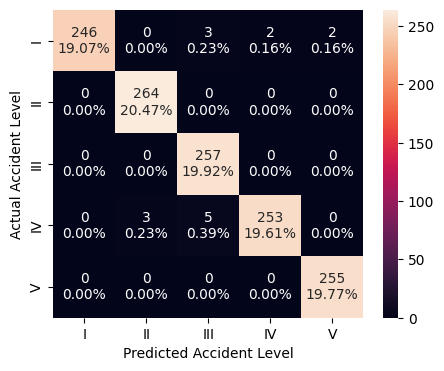


Confusion Matrix for Testing Data


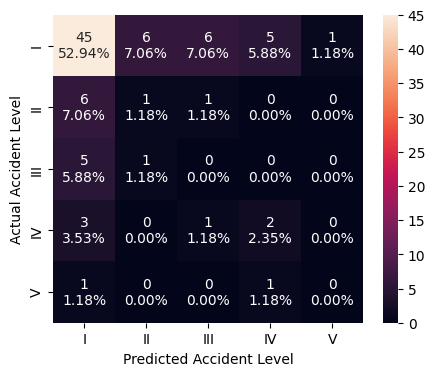

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       253
           1       0.99      1.00      0.99       264
           2       0.97      1.00      0.98       257
           3       0.99      0.97      0.98       261
           4       0.99      1.00      1.00       255

    accuracy                           0.99      1290
   macro avg       0.99      0.99      0.99      1290
weighted avg       0.99      0.99      0.99      1290

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        63
           1       0.12      0.12      0.12         8
           2       0.00      0.00      0.00         6
           3       0.25      0.33      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        85
   macro avg       0.23      0.23      0.23        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='RFC',emb='Word2Vec', bal='ADASYN')

**Observations**

We have used ADASYN to balance the data in this case

The model overfits on training data but performance is reduced on testing data

The performance on minority classes is still lacking

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **SVM using Word2Vec**

We shall use these Word2Vec embeddings on Support Vector Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


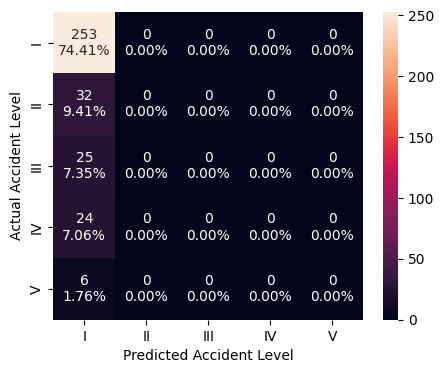


Confusion Matrix for Testing Data


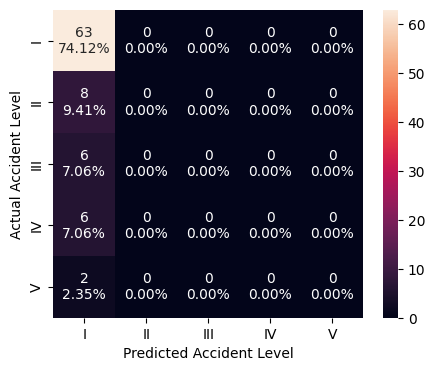

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='SVM',emb='Word2Vec', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


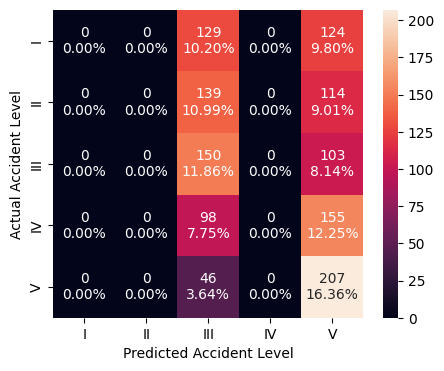


Confusion Matrix for Testing Data


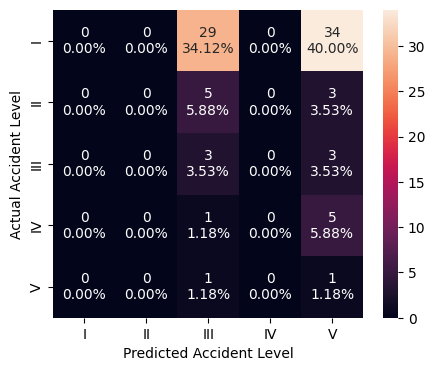

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.00      0.00      0.00       253
           2       0.27      0.59      0.37       253
           3       0.00      0.00      0.00       253
           4       0.29      0.82      0.43       253

    accuracy                           0.28      1265
   macro avg       0.11      0.28      0.16      1265
weighted avg       0.11      0.28      0.16      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.08      0.50      0.13         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.05        85
   macro avg       0.02      0.20      0.04        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='SVM',emb='Word2Vec', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


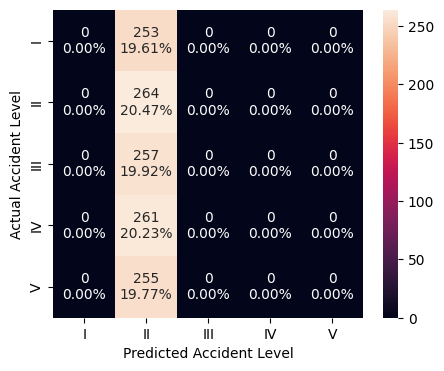


Confusion Matrix for Testing Data


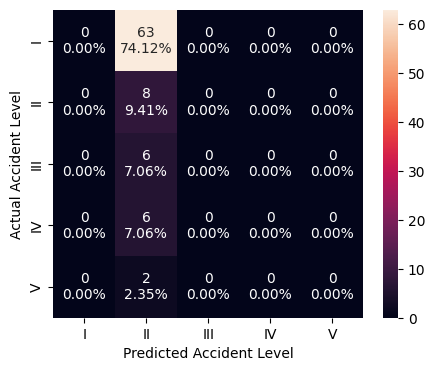

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.20      1.00      0.34       264
           2       0.00      0.00      0.00       257
           3       0.00      0.00      0.00       261
           4       0.00      0.00      0.00       255

    accuracy                           0.20      1290
   macro avg       0.04      0.20      0.07      1290
weighted avg       0.04      0.20      0.07      1290

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.09      1.00      0.17         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.09        85
   macro avg       0.02      0.20      0.03        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='SVM',emb='Word2Vec', bal='ADASYN')

**Observations**

The SVM model performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data


### **Logistic Regression  using Word2Vec**

We shall use these Word2Vec embeddings on a Logistic Regression model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


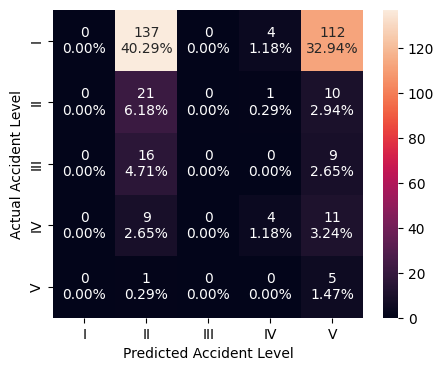


Confusion Matrix for Testing Data


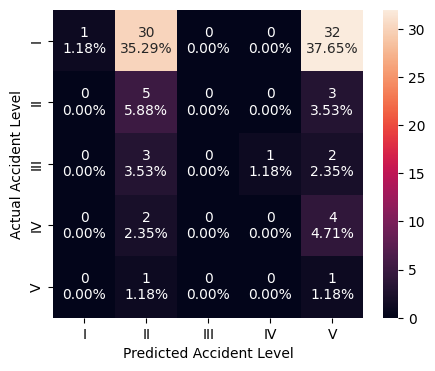

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.11      0.66      0.19        32
           2       0.00      0.00      0.00        25
           3       0.44      0.17      0.24        24
           4       0.03      0.83      0.07         6

    accuracy                           0.09       340
   macro avg       0.12      0.33      0.10       340
weighted avg       0.04      0.09      0.04       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        63
           1       0.12      0.62      0.20         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.08        85
   macro avg       0.23      0.23      0.06        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='LR',emb='Word2Vec', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


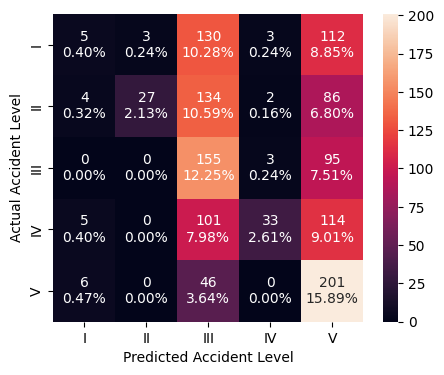


Confusion Matrix for Testing Data


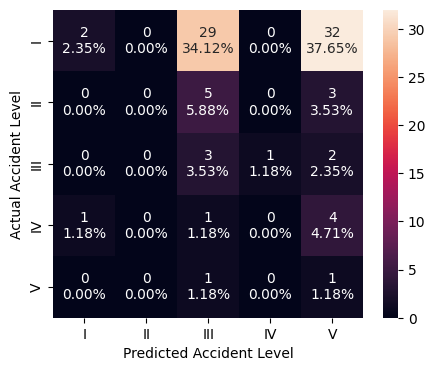

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.25      0.02      0.04       253
           1       0.90      0.11      0.19       253
           2       0.27      0.61      0.38       253
           3       0.80      0.13      0.22       253
           4       0.33      0.79      0.47       253

    accuracy                           0.33      1265
   macro avg       0.51      0.33      0.26      1265
weighted avg       0.51      0.33      0.26      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        63
           1       0.00      0.00      0.00         8
           2       0.08      0.50      0.13         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.07        85
   macro avg       0.15      0.21      0.05        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='LR',emb='Word2Vec', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


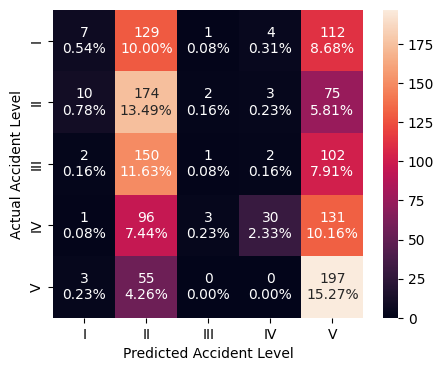


Confusion Matrix for Testing Data


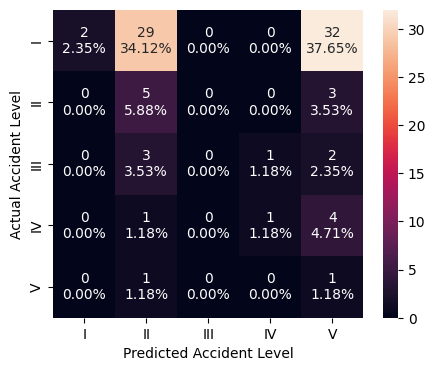

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.30      0.03      0.05       253
           1       0.29      0.66      0.40       264
           2       0.14      0.00      0.01       257
           3       0.77      0.11      0.20       261
           4       0.32      0.77      0.45       255

    accuracy                           0.32      1290
   macro avg       0.36      0.32      0.22      1290
weighted avg       0.37      0.32      0.22      1290

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        63
           1       0.13      0.62      0.21         8
           2       0.00      0.00      0.00         6
           3       0.50      0.17      0.25         6
           4       0.02      0.50      0.05         2

    accuracy                           0.11        85
   macro avg       0.33      0.26      0.11        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='LR',emb='Word2Vec', bal='ADASYN')

**Observations**

The Logistic Regression model also performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **XGBoost using Word2Vec**

We shall use these Word2Vec embeddings on XGBoost model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


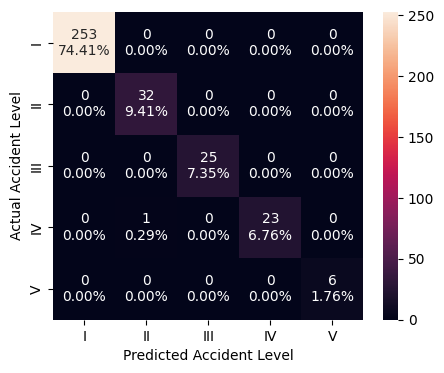


Confusion Matrix for Testing Data


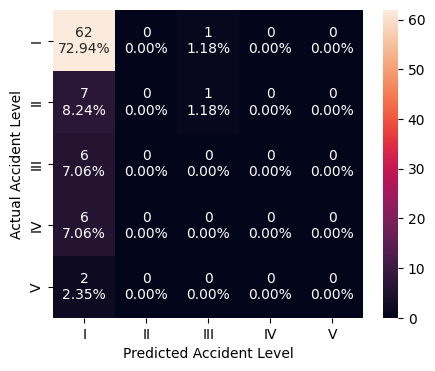

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        25
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00         6

    accuracy                           1.00       340
   macro avg       0.99      0.99      0.99       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='XGB',emb='Word2Vec', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


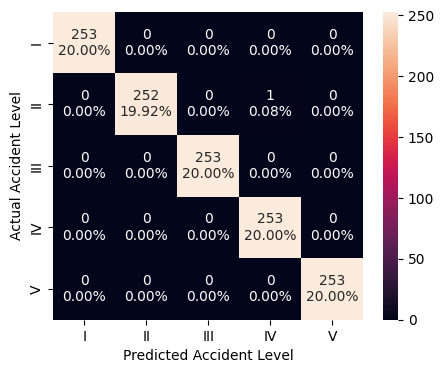


Confusion Matrix for Testing Data


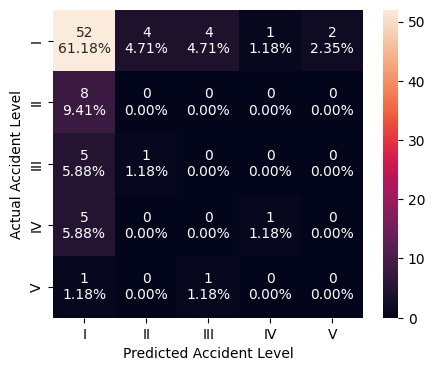

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         2

    accuracy                           0.62        85
   macro avg       0.25      0.20      0.21        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='XGB',emb='Word2Vec', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


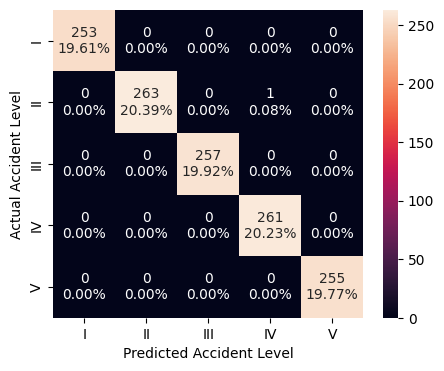


Confusion Matrix for Testing Data


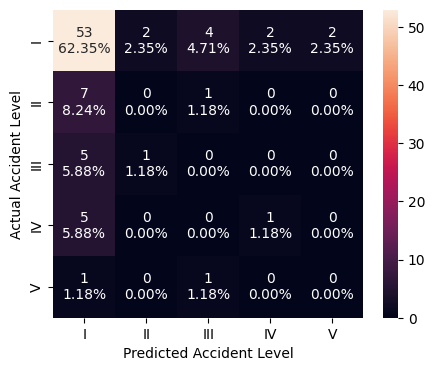

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       261
           4       1.00      1.00      1.00       255

    accuracy                           1.00      1290
   macro avg       1.00      1.00      1.00      1290
weighted avg       1.00      1.00      1.00      1290

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         2

    accuracy                           0.64        85
   macro avg       0.22      0.20      0.20        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='XGB',emb='Word2Vec', bal='ADASYN')

**Observations**

The XGBoost model is found to be overfitting in training data but performs poorly on minority classes in test with the unbalanced data

When oversampling techniques were used the performance on test data reduces marginally but the model continues to overfit the training data

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

**Final observations - Word2Vec**

We have trained Random Forest, Logistic Regression, SVM and XGBoost using the Word2Vec encodings that we created.

To deal with the imbalanced data we have used both SMOTE and ADASYN to oversample the dataset


We shall similarly train the models with GloVe embeddings and do the necessary data balancing

## **GloVe Embeddings**

In [ ]:
glove_input_file = '/content/drive/MyDrive/Capstone/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "injury"
glove_model[word]

array([-1.1746e-01, -1.5517e-01,  2.4498e-01, -1.2485e+00, -1.0949e+00,
        6.4026e-01,  4.1651e-01, -1.7221e-02, -5.9035e-03, -1.0304e-01,
        2.2588e-01,  1.6467e-01,  3.7346e-01, -2.3000e-01,  4.4795e-01,
        2.7837e-01, -4.4142e-01,  1.4715e-01, -1.0286e-01,  2.8767e-02,
       -2.1948e-01, -6.0198e-02, -4.2159e-01,  1.4319e+00,  8.1485e-01,
        4.7941e-01, -2.6816e-01, -8.8367e-01,  1.7614e-01, -9.3490e-02,
       -7.4439e-01, -2.4629e-01, -5.1004e-01, -1.7658e-01, -1.8354e-01,
       -8.0004e-01, -1.0371e+00,  6.9324e-01, -1.3981e+00,  7.0316e-01,
       -7.2015e-03,  4.7400e-01,  1.0374e+00, -8.2983e-01,  2.1392e-01,
        5.7978e-01,  9.0591e-01, -2.1928e-01,  3.3683e-01, -1.0322e+00,
        9.4409e-01, -1.0886e-01, -6.9077e-01,  1.7849e-01,  7.8951e-01,
       -2.4025e+00, -4.9252e-01, -7.7593e-01,  7.6256e-01,  1.4263e+00,
        1.5806e-01,  6.7573e-01,  1.9972e-02,  5.9897e-01,  5.0183e-01,
        5.0997e-04, -6.9195e-02, -3.9081e-01, -8.1649e-01, -2.97

In [ ]:
result = glove_model.most_similar("injury", topn=5)
print(result)

[('knee', 0.8409535884857178), ('injuries', 0.8222464323043823), ('hamstring', 0.817633867263794), ('groin', 0.8127411603927612), ('ankle', 0.8116885423660278)]


**Observation**

The GloVe embeddings have captured the contextual meaning of the term

In [ ]:
#List of words in the vocabulary
glove_words = glove_model.index_to_key

In [ ]:
#Dictionary with key as the word and the value as the corresponding embedding vector.
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
#Defining the dimension of the embedded vector.
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(df['Cleaned_Description'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0        -0.18       0.16      -0.06      -0.15      -0.03      -0.37   
1        -0.25       0.23       0.06       0.15      -0.02      -0.01   
2        -0.14       0.16       0.02      -0.17      -0.14      -0.17   
3        -0.13      -0.01       0.02      -0.23      -0.04       0.08   
4         0.02       0.15      -0.01      -0.12      -0.11      -0.05   
..         ...        ...        ...        ...        ...        ...   
420      -0.17       0.01      -0.02      -0.31      -0.08      -0.03   
421       0.13       0.01       0.06      -0.24      -0.15       0.08   
422      -0.20       0.09       0.26      -0.15      -0.23       0.21   
423      -0.37       0.14      -0.06      -0.23       0.04       0.01   
424      -0.16       0.24       0.31      -0.23      -0.11       0.13   

     Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0        -0.21       0.25       0.01       0.24        0.01       -0.04   
1        -0.06       0.23       0.13       0.12        0.09       -0.07   
2        -0.03       0.22      -0.00       0.14        0.19       -0.10   
3        -0.16       0.20      -0.08       0.00        0.02       -0.07   
4        -0.10       0.20      -0.17       0.10        0.09        0.01   
..         ...        ...        ...        ...         ...         ...   
420      -0.08       0.19      -0.14       0.11        0.17       -0.12   
421      -0.10       0.06       0.19       0.08        0.09       -0.00   
422      -0.13       0.20      -0.02      -0.06       -0.18       -0.01   
423      -0.14       0.30       0.00       0.08       -0.18       -0.32   
424      -0.14       0.30      -0.05       0.10        0.24       -0.06   

     Feature 12  Feature 13  Feature 14  Feature 15  Feature 16  Feature 17  \
0          0.14       -0.12        0.03       -0.09       -0.07        0.02   
1          0.08        0.37        0.21       -0.16       -0.04       -0.15   
2          0.36       -0.01        0.09        0.03        0.17       -0.06   
3          0.30        0.09       -0.03       -0.16       -0.07        0.16   
4          0.18       -0.10        0.05       -0.22       -0.14        0.07   
..          ...         ...         ...         ...         ...         ...   
420        0.11        0.08        0.09        0.02       -0.02        0.18   
421        0.25        0.10        0.15        0.02       -0.04        0.10   
422        0.28       -0.03        0.14        0.07       -0.05       -0.02   
423        0.49        0.26        0.27       -0.10       -0.22       -0.13   
424        0.10        0.17        0.04       -0.00       -0.12        0.05   

     Feature 18  Feature 19  Feature 20  Feature 21  Feature 22  Feature 23  \
0         -0.13       -0.08        0.02       -0.03        0.09       -0.13   
1         -0.08       -0.19       -0.17       -0.14       -0.24        0.18   
2         -0.15       -0.15        0.30        0.15       -0.09       -0.14   
3         -0.15       -0.26        0.26       -0.10       -0.05       -0.04   
4         -0.21       -0.03        0.23       -0.14        0.09        0.23   
..          ...         ...         ...         ...         ...         ...   
420       -0.31       -0.20        0.25        0.02        0.00        0.05   
421       -0.23       -0.07        0.15        0.03        0.00        0.13   
422       -0.19       -0.03        0.09        0.07       -0.19        0.09   
423        0.25       -0.26        0.35       -0.13       -0.22       -0.02   
424       -0.30       -0.35        0.11        0.11        0.06       -0.04   

     Feature 24  Feature 25  Feature 26  Feature 27  Feature 28  Feature 29  \
0          0.19        0.15       -0.43       -0.12        0.16        0.01   
1         -0.06        0.09       -0.03        0.02        0.00       -0.04   
2          0.27       -0.02       -0.20       -0.23        0.08       -0.10   
3          0.

Saving the GloVe word embeddings dataframe as a csv file for subsequent use in training neural networks

In [ ]:
df_Glove.to_csv('GloVe_Embeddings_Cleaned_Descriptions.csv', index=False)

In [ ]:
# # Storing independent variable
# X = df_Glove.copy()
# # Storing target variable
# y = df["Accident_Level"]
# # Split data into training and testing set.
# X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.20, random_state = 42, stratify = y)
# X_train.shape,y_train.shape,X_test.shape, y_test.shape

In [ ]:
X_train, X_test, y_train, y_test = create_Xy_samples(emb='glove')

In [ ]:
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)

Shape of Training and Test sets after SMOTE operation
(1265, 100) (1265,) (85, 100) (85,)


In [ ]:
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)

Shape of Training and Test sets after ADASYN operation
(1271, 100) (1271,) (85, 100) (85,)


### **Random Forest using GloVe**

We shall use these GloVe embeddings on Random Forest Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


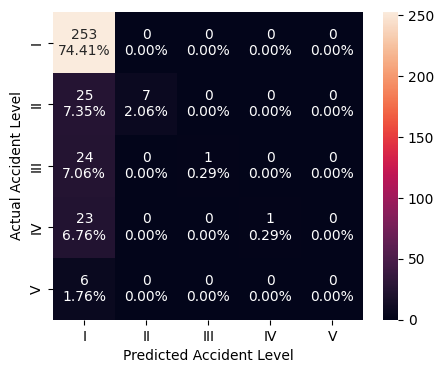


Confusion Matrix for Testing Data


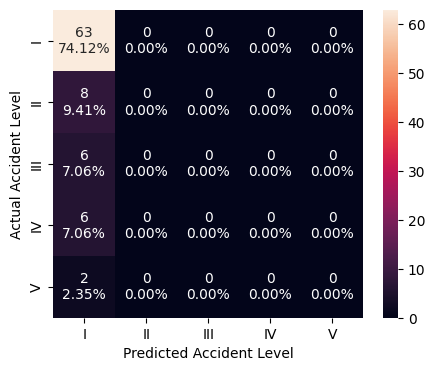

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       253
           1       1.00      0.22      0.36        32
           2       1.00      0.04      0.08        25
           3       1.00      0.04      0.08        24
           4       0.00      0.00      0.00         6

    accuracy                           0.77       340
   macro avg       0.75      0.26      0.28       340
weighted avg       0.81      0.77      0.69       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='RFC', emb='GloVe', bal='Unbalanced')

**Observations**

It is evident that the model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We shall try some oversampling techniques to fix this problem.

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


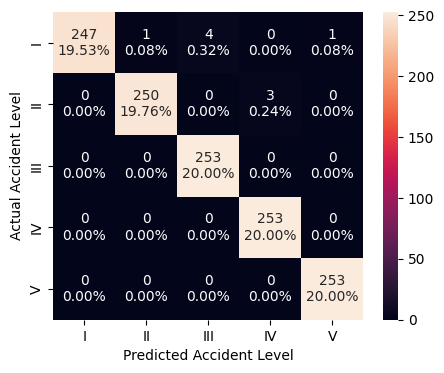


Confusion Matrix for Testing Data


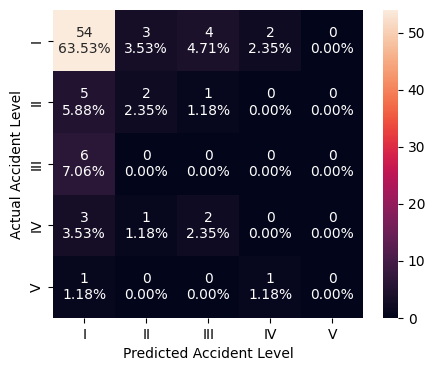

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       253
           1       1.00      0.99      0.99       253
           2       0.98      1.00      0.99       253
           3       0.99      1.00      0.99       253
           4       1.00      1.00      1.00       253

    accuracy                           0.99      1265
   macro avg       0.99      0.99      0.99      1265
weighted avg       0.99      0.99      0.99      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        63
           1       0.33      0.25      0.29         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.66        85
   macro avg       0.22      0.22      0.22        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='RFC', emb='GloVe', bal='SMOTE')

**Observations**

We have used SMOTE to balance the data

The model overfits on training data but performance reduces on testing data

The performance on minority classes is still lacking

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


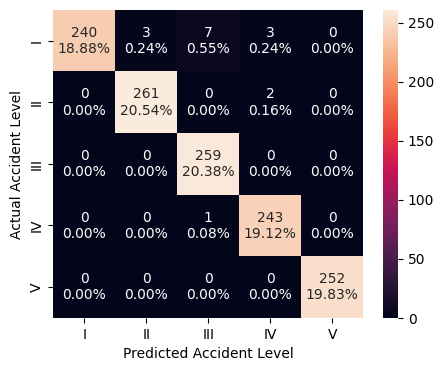


Confusion Matrix for Testing Data


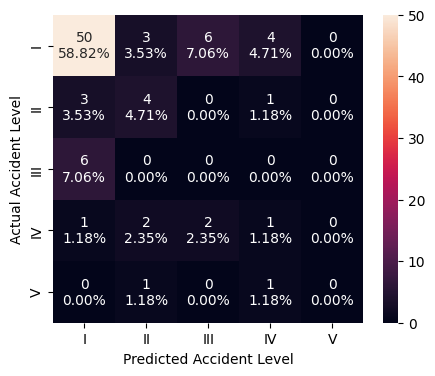

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       253
           1       0.99      0.99      0.99       263
           2       0.97      1.00      0.98       259
           3       0.98      1.00      0.99       244
           4       1.00      1.00      1.00       252

    accuracy                           0.99      1271
   macro avg       0.99      0.99      0.99      1271
weighted avg       0.99      0.99      0.99      1271

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        63
           1       0.40      0.50      0.44         8
           2       0.00      0.00      0.00         6
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         2

    accuracy                           0.65        85
   macro avg       0.28      0.29      0.28        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='RFC', emb='GloVe', bal='ADASYN')

**Observations**

We have used ADASYN to balance the data in this case

The model overfits on training data but performance is reduced on testing data

The performance on minority classes is still lacking

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **SVM using GloVe**

We shall use these GloVe embeddings on Support Vector Classifiers for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


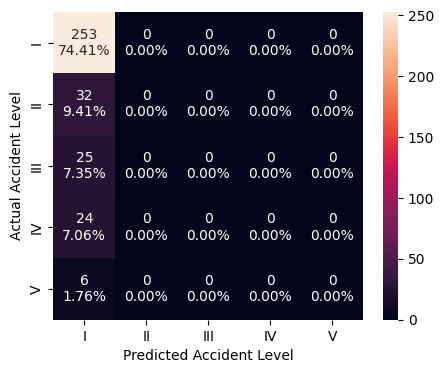


Confusion Matrix for Testing Data


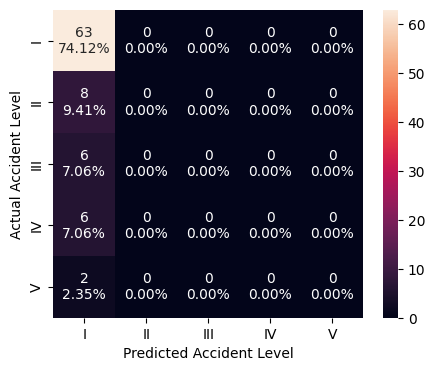

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro avg       0.15      0.20      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='SVM', emb='GloVe', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


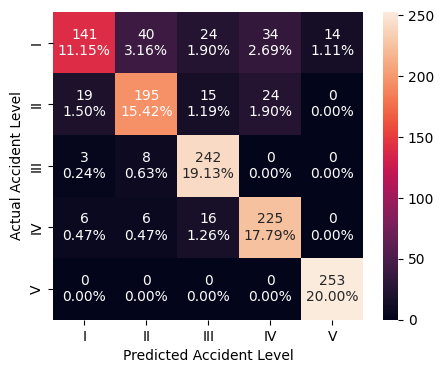


Confusion Matrix for Testing Data


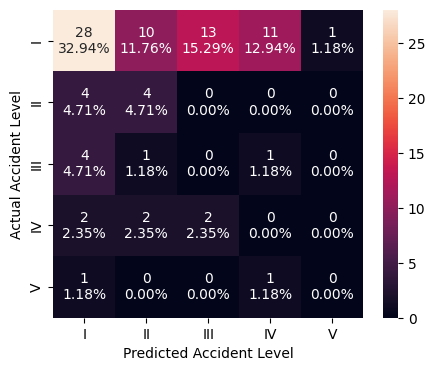

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.83      0.56      0.67       253
           1       0.78      0.77      0.78       253
           2       0.81      0.96      0.88       253
           3       0.80      0.89      0.84       253
           4       0.95      1.00      0.97       253

    accuracy                           0.83      1265
   macro avg       0.83      0.83      0.83      1265
weighted avg       0.83      0.83      0.83      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        63
           1       0.24      0.50      0.32         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.38        85
   macro avg       0.19      0.19      0.17        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='SVM', emb='GloVe', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


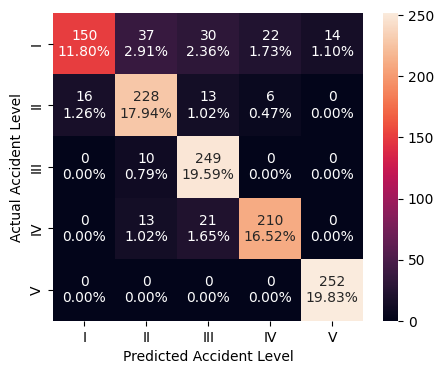


Confusion Matrix for Testing Data


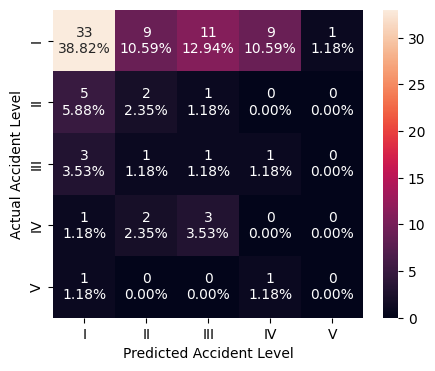

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.90      0.59      0.72       253
           1       0.79      0.87      0.83       263
           2       0.80      0.96      0.87       259
           3       0.88      0.86      0.87       244
           4       0.95      1.00      0.97       252

    accuracy                           0.86      1271
   macro avg       0.86      0.86      0.85      1271
weighted avg       0.86      0.86      0.85      1271

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        63
           1       0.14      0.25      0.18         8
           2       0.06      0.17      0.09         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        85
   macro avg       0.19      0.19      0.18        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='SVM', emb='GloVe', bal='ADASYN')

**Observations**

The SVM model performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data


### **Logistic Regression  using GloVe**

We shall use these GloVe embeddings on a Logistic Regression model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


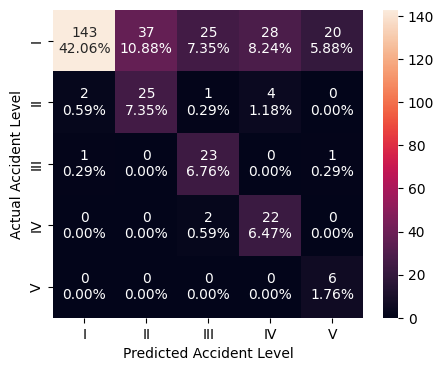


Confusion Matrix for Testing Data


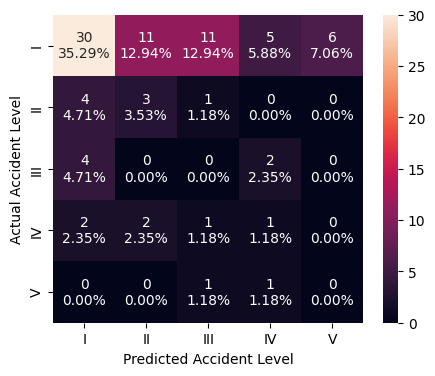

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.98      0.57      0.72       253
           1       0.40      0.78      0.53        32
           2       0.45      0.92      0.61        25
           3       0.41      0.92      0.56        24
           4       0.22      1.00      0.36         6

    accuracy                           0.64       340
   macro avg       0.49      0.84      0.56       340
weighted avg       0.83      0.64      0.67       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.75      0.48      0.58        63
           1       0.19      0.38      0.25         8
           2       0.00      0.00      0.00         6
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         2

    accuracy                           0.40        85
   macro avg       0.21      0.20      0.19        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='LR', emb='GloVe', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


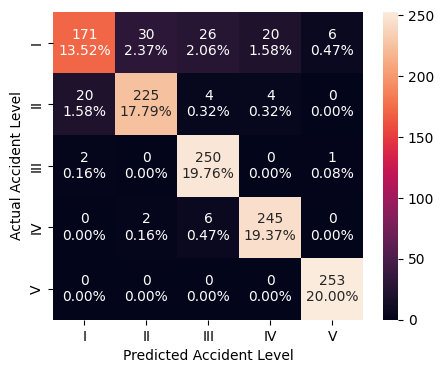


Confusion Matrix for Testing Data


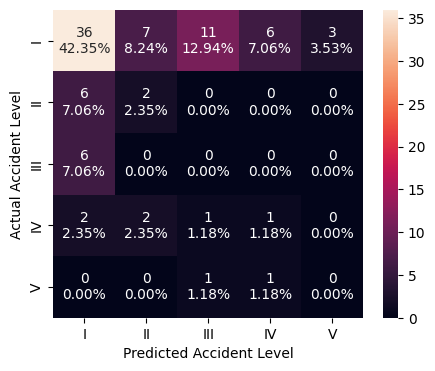

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       253
           1       0.88      0.89      0.88       253
           2       0.87      0.99      0.93       253
           3       0.91      0.97      0.94       253
           4       0.97      1.00      0.99       253

    accuracy                           0.90      1265
   macro avg       0.90      0.90      0.90      1265
weighted avg       0.90      0.90      0.90      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        63
           1       0.18      0.25      0.21         8
           2       0.00      0.00      0.00         6
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.46        85
   macro avg       0.21      0.20      0.20        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='LR', emb='GloVe', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


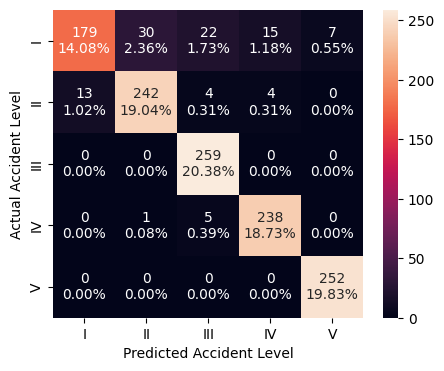


Confusion Matrix for Testing Data


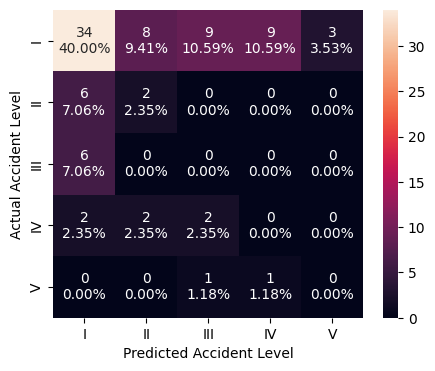

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       253
           1       0.89      0.92      0.90       263
           2       0.89      1.00      0.94       259
           3       0.93      0.98      0.95       244
           4       0.97      1.00      0.99       252

    accuracy                           0.92      1271
   macro avg       0.92      0.92      0.92      1271
weighted avg       0.92      0.92      0.92      1271

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.71      0.54      0.61        63
           1       0.17      0.25      0.20         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        85
   macro avg       0.17      0.16      0.16        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='LR', emb='GloVe', bal='ADASYN')

**Observations**

The Logistic Regression model also performs poorly on minority classes with the unbalanced data

When oversampling techniques were used the performance drastically reduced on even the majority class.

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

### **XGBoost using GloVe**

We shall use these Word2Vec embeddings on XGBoost model for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

**Unbalanced Data**

Confusion Matrix for Training Data


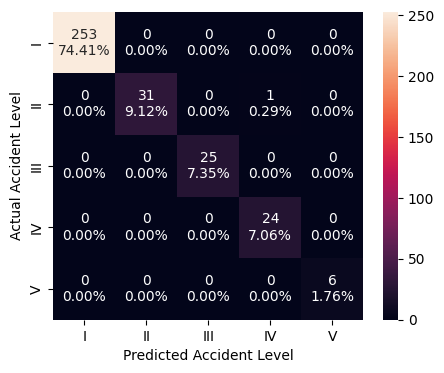


Confusion Matrix for Testing Data


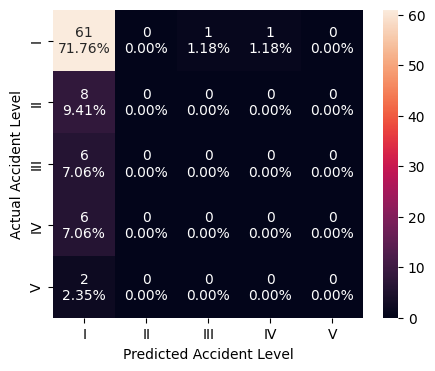

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      0.97      0.98        32
           2       1.00      1.00      1.00        25
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00         6

    accuracy                           1.00       340
   macro avg       0.99      0.99      0.99       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.72        85
   macro avg       0.15      0.19      0.17        8

In [ ]:
Execute_model(X_train, y_train, X_test, y_test, model='XGB', emb='GloVe', bal='Unbalanced')

**Using SMOTE to balance the data**

Confusion Matrix for Training Data


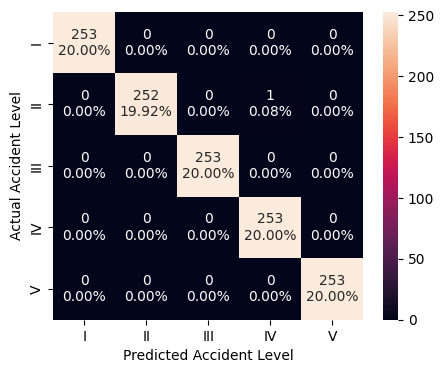


Confusion Matrix for Testing Data


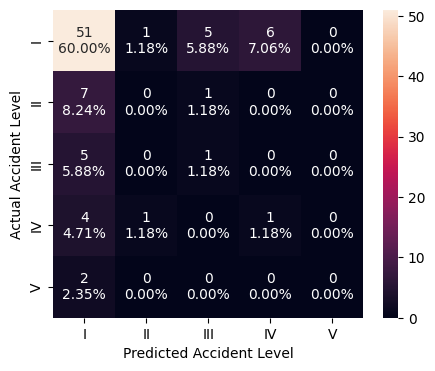

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        63
           1       0.00      0.00      0.00         8
           2       0.14      0.17      0.15         6
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         2

    accuracy                           0.62        85
   macro avg       0.20      0.23      0.22        8

In [ ]:
Execute_model(X_train_smote , y_train_smote, X_test, y_test, model='XGB', emb='GloVe', bal='SMOTE')

**Using ADASYN to balance the data**

Confusion Matrix for Training Data


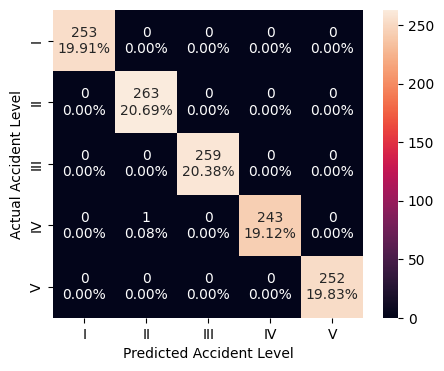


Confusion Matrix for Testing Data


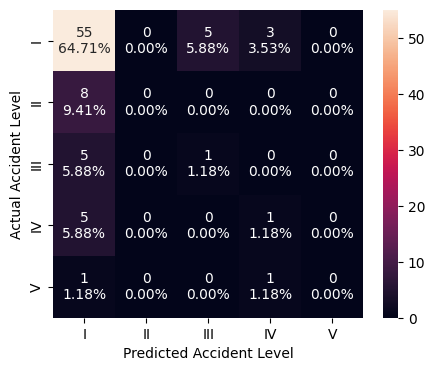

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       259
           3       1.00      1.00      1.00       244
           4       1.00      1.00      1.00       252

    accuracy                           1.00      1271
   macro avg       1.00      1.00      1.00      1271
weighted avg       1.00      1.00      1.00      1271

Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        63
           1       0.00      0.00      0.00         8
           2       0.17      0.17      0.17         6
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        85
   macro avg       0.22      0.24      0.23        8

In [ ]:
Execute_model(X_train_adasyn, y_train_adasyn, X_test, y_test, model='XGB', emb='GloVe', bal='ADASYN')

**Observations**

The XGBoost model is found to be overfitting in training data but performs poorly on minority classes in test with the unbalanced data

When oversampling techniques were used the performance on test data reduces marginally but the model continues to overfit the training data

We have used SMOTE and ADASYN to balance the data

The performance of the model when oversampling using SMOTE and ADASYN is almost similar

**Final observations**

We have trained traditional four Machine Learning models namely Random Forest, Logistic Regression, SVM and XGBoost using the different embeddings.

To deal with the imbalanced data we have used both SMOTE and ADASYN to oversample the dataset in all cases

GloVe performs better than rest of the enbeddings with the traditional Machine Learning models

But traditional ML models do not performs too well in the case of minority class due to the highly imbalanced dataset

We shall further continue our analysis by running ANN, LSTM and RNN models to examine the accuracy of advanced models.


# **Neural Network Models**

We shall build Neural Network models using TF-IDF, Word2Vec and GloVe embeddings that we previously used for training traditional ML models.

Subsequently we can compare the performance of neural network models to the traditional models.

In necessary we can import the previously saved GloVe and Word2Vec word embeddings and store it in DataFrames.

In [ ]:
df_Word2Vec = pd.read_csv('/content/drive/MyDrive/Capstone/Word2Vec_Embeddings_Cleaned_Descriptions.csv')
df_Glove = pd.read_csv('/content/drive/MyDrive/Capstone/GloVe_Embeddings_Cleaned_Descriptions.csv')

### **ANN using TF-IDF**

We shall use the previously created TF-IDF Vectors on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with TF-IDF vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='tfidf')
#Encoding the target variable
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 2000) (340,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 55     1
35     0
373    0
276    0
251    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_tf_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  743.7034645080566 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
#Encoding the target variable
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 2000) (1265,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    0
2    0
3    0
4    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_tf_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  2211.1129269599915 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
#Encoding the target variable
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1245, 2000) (1245,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1245, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    0
2    0
3    0
4    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_tf_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  2314.07795381546 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

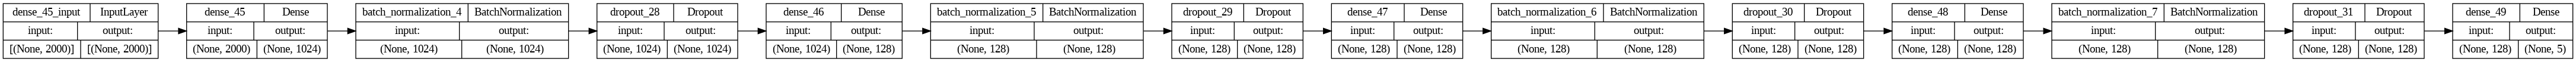

In [ ]:
best_nnmodel_tf_unb = build_ANN_model(optimizer = best_params_tf_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_unb['neurons_1'], neurons_2 = best_params_tf_unb['neurons_2'], neurons_3 = best_params_tf_unb['neurons_3'])
plot_model(best_nnmodel_tf_unb, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1024)              2049024   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_29 (Dropout)        (None, 128)              

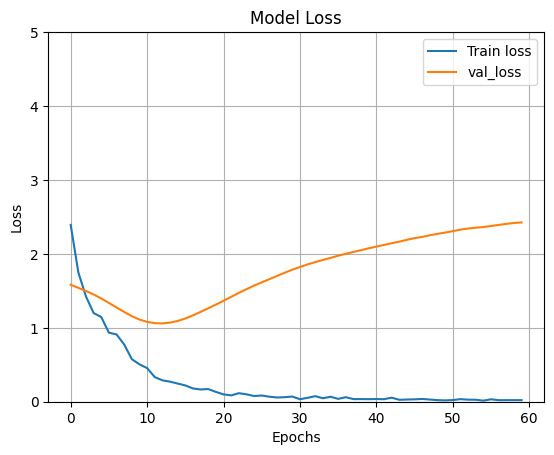

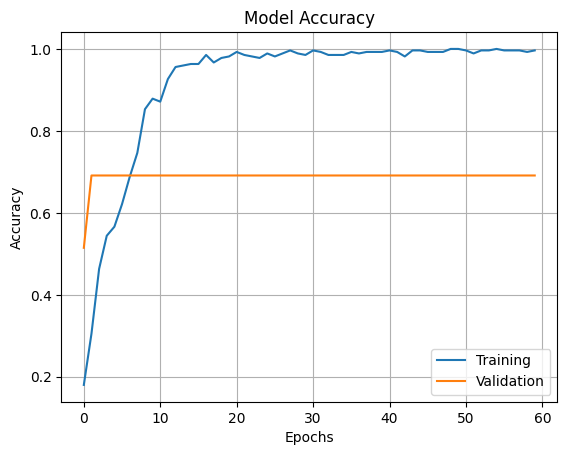

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - Unbalanced - Training


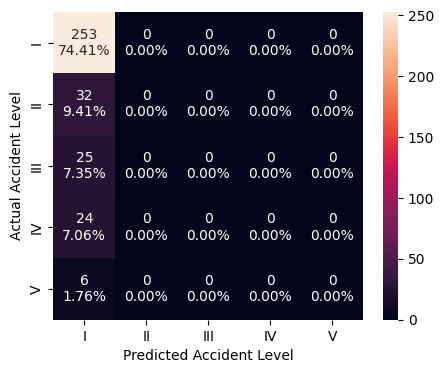


Confusion Matrix - TF-IDF - Tuned Neural Network - Unbalanced - Testing


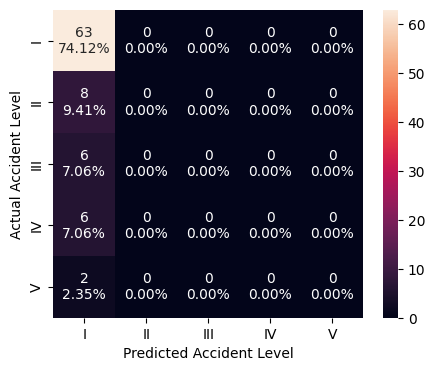

Classification Report - TF-IDF - Tuned Neural Network - Unbalanced - Training
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report - TF-IDF - Tuned Neural Network - Unbalanced - Testing
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                  

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
5  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42  
5         54.93      74.12     63.10             11.63

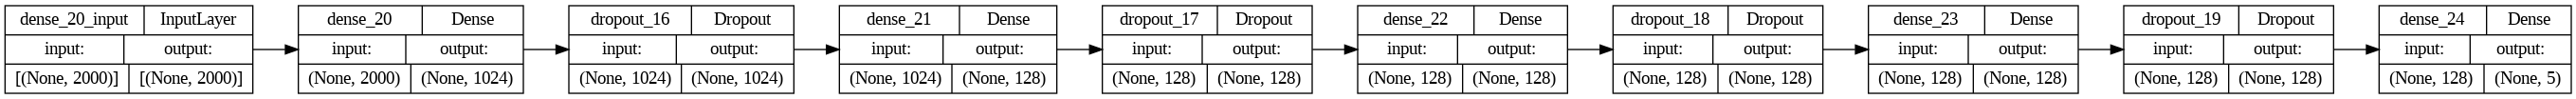

In [ ]:
best_nnmodel_tf_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              2049024   
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               131200    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 128)              

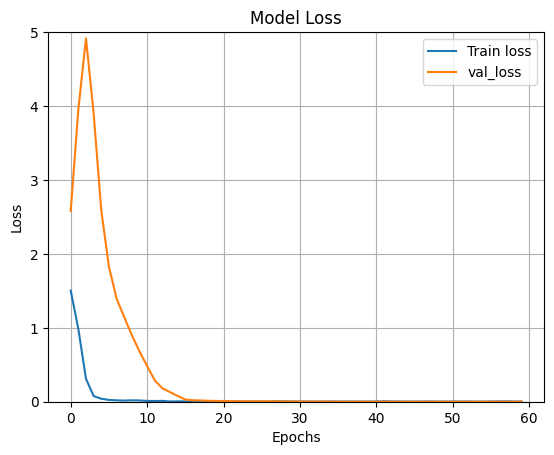

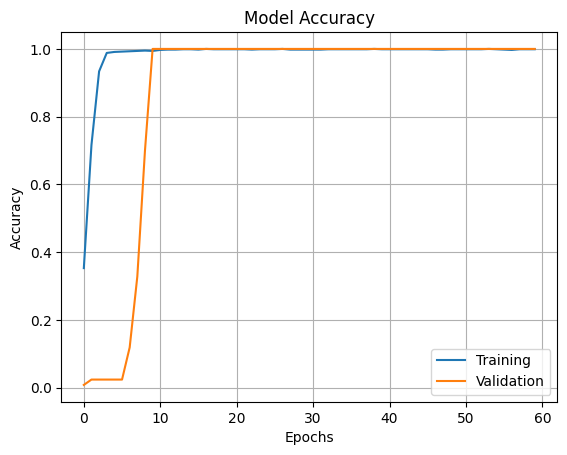

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - SMOTE - Training


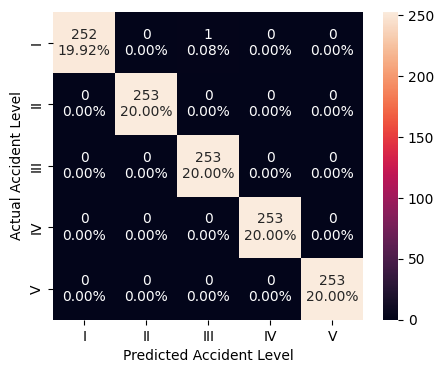


Confusion Matrix - TF-IDF - Tuned Neural Network - SMOTE - Testing


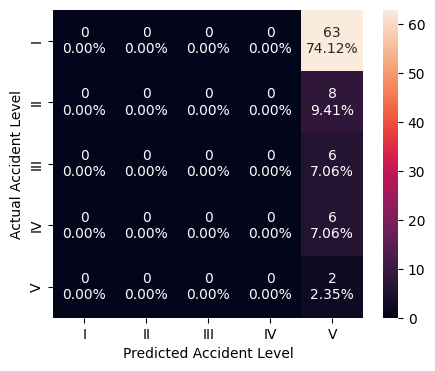

Classification Report - TF-IDF - Tuned Neural Network - SMOTE - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report - TF-IDF - Tuned Neural Network - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      1.00      0.05         2

    accuracy                           0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

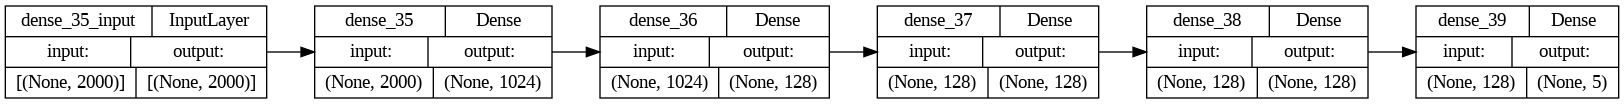

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              2049024   
                                                                 
 dense_36 (Dense)            (None, 128)               131200    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 5)                 645       
                                                                 
Total params: 2,213,893
Trainable params: 2,213,893
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

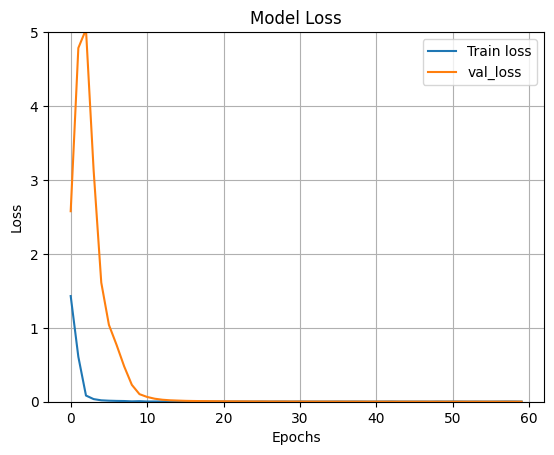

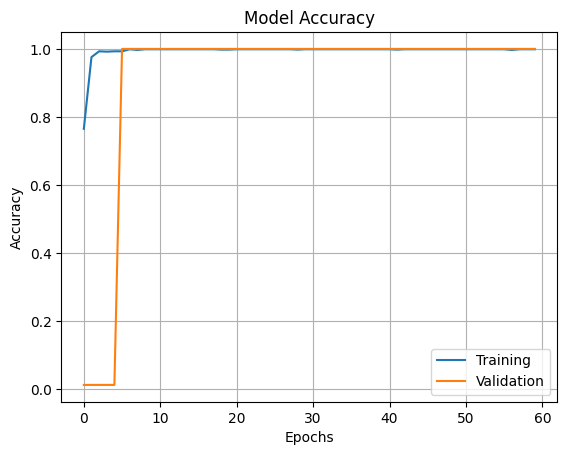

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - ADASYN - Training


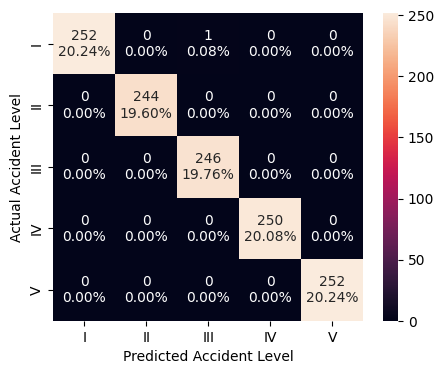


Confusion Matrix - TF-IDF - Tuned Neural Network - ADASYN - Testing


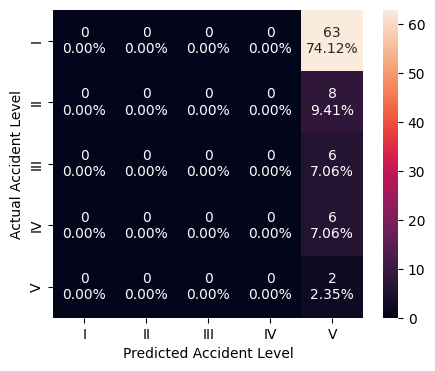

Classification Report - TF-IDF - Tuned Neural Network - ADASYN - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       244
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       250
           4       1.00      1.00      1.00       252

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245

Classification Report - TF-IDF - Tuned Neural Network - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      1.00      0.05         2

    accuracy                          

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
1  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
2  Tuned Neural Network    TF-IDF  Unbalanced         75.00        74.12   
3  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
4  Tuned Neural Network    TF-IDF  Unbalanced         74.41        74.12   

   F1 Score  Train time(secs)  
0      63.1             10.53  
1      63.1             12.23  
2      63.1             13.33  
3      63.1             11.82  
4      63.1             29.29

### **ANN using Word2Vec**

We shall use the previously created Word2Vec embeddings on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with Word2Vec vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='w2v')
#Encoding the target variable
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 300) (340,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 290    2
108    0
244    2
92     0
307    4
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_w2v_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Training time:  3445.27 seconds
Best Parameters: {'batch_size': 20, 'epochs': 10, 'neurons_1': 256, 'neurons_2': 128, 'neurons_3': 32, 'optimizer': 'SGD'}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
#Encoding the target variable
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 300) (1265,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    0
1    0
2    2
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_w2v_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  608.65 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
#Encoding the target variable
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1264, 300) (1264,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1264, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    0
1    0
2    2
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_w2v_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  484.98 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

In [ ]:
best_nnmodel_w2v_unb = build_ANN_model(optimizer = best_params_w2v_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_w2v_unb['neurons_1'], neurons_2 = best_params_w2v_unb['neurons_2'], neurons_3 = best_params_w2v_unb['neurons_3'])
plot_model(best_nnmodel_w2v_unb, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 512)               154112    
                                                                 
 dense_80 (Dense)            (None, 256)               131328    
                                                                 
 dense_81 (Dense)            (None, 32)                8224      
                                                                 
 dense_82 (Dense)            (None, 32)                1056      
                                                                 
 dense_83 (Dense)            (None, 5)                 165       
                                                                 
Total params: 294,885
Trainable params: 294,885
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 10 

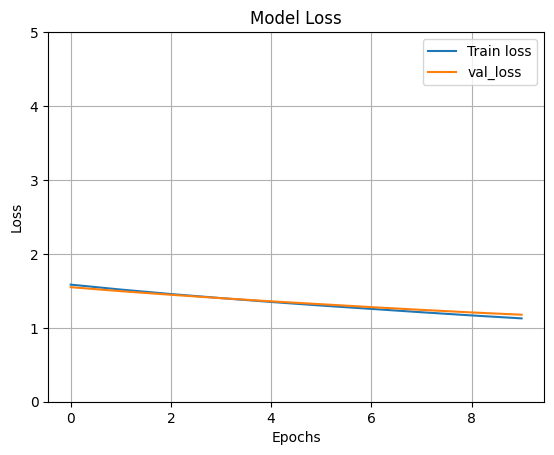

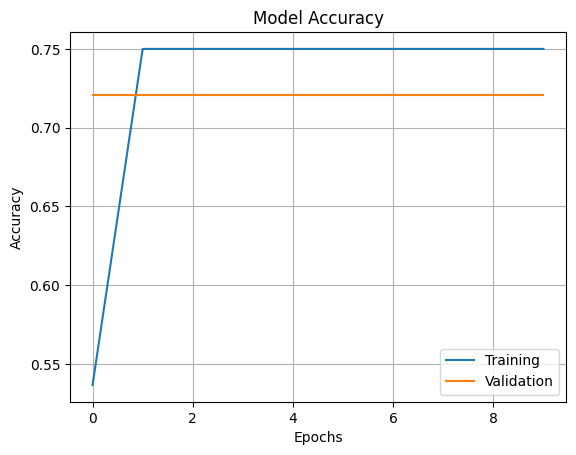

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - Unbalanced - Training


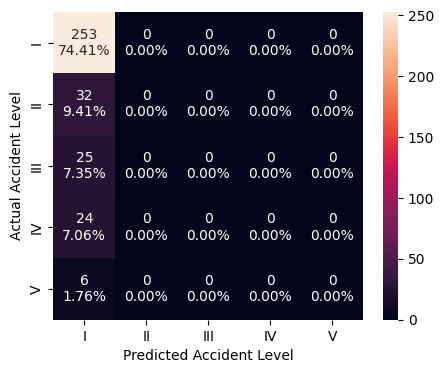


Confusion Matrix - TF-IDF - ANN - Unbalanced - Testing


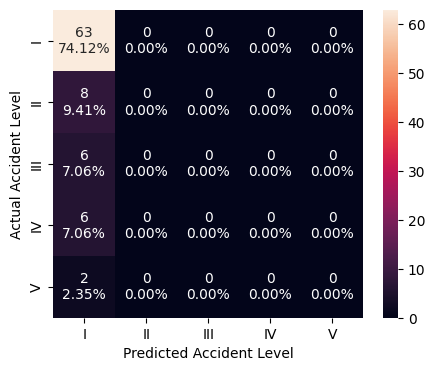

Classification Report - TF-IDF - ANN - Unbalanced - Training
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report - TF-IDF - ANN - Unbalanced - Testing
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro a

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

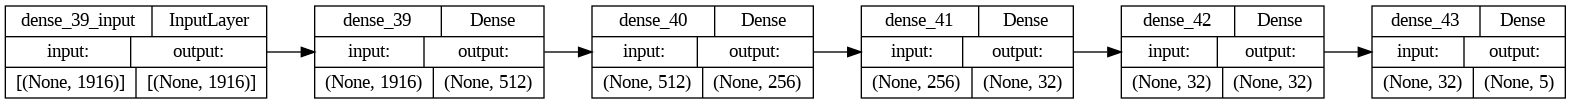

In [ ]:
best_nnmodel_tf_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               981504    
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 32)                8224      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

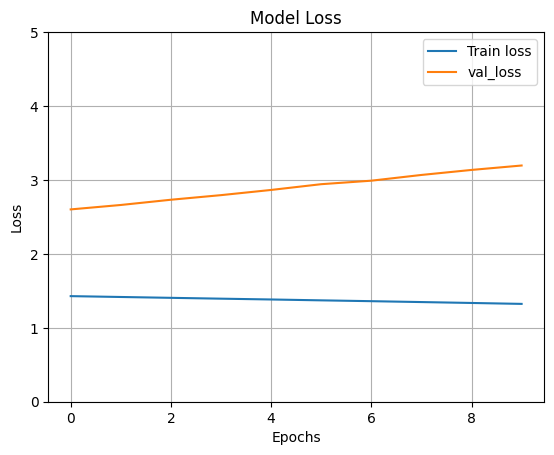

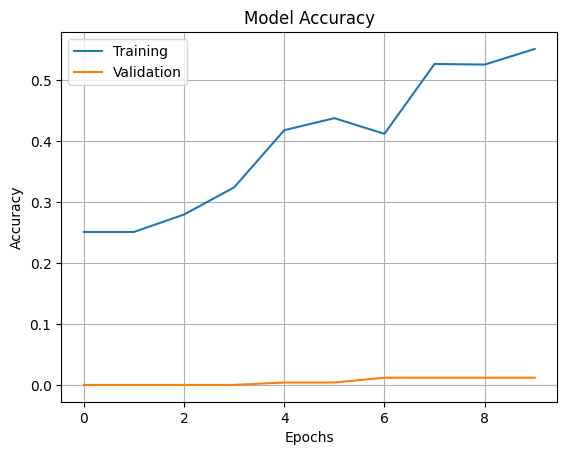

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - SMOTE - Training


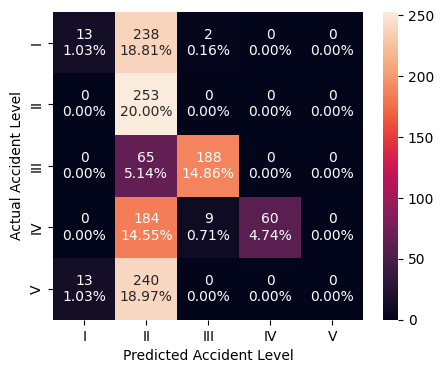


Confusion Matrix - TF-IDF - ANN - SMOTE - Testing


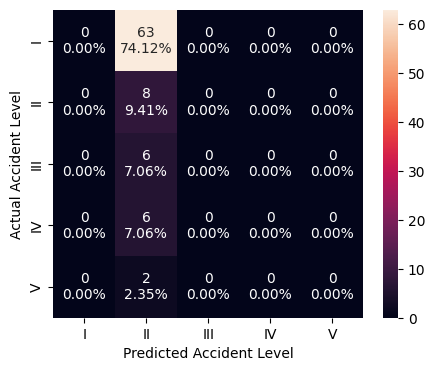

Classification Report - TF-IDF - ANN - SMOTE - Training
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       253
           1       0.26      1.00      0.41       253
           2       0.94      0.74      0.83       253
           3       1.00      0.24      0.38       253
           4       0.00      0.00      0.00       253

    accuracy                           0.41      1265
   macro avg       0.54      0.41      0.34      1265
weighted avg       0.54      0.41      0.34      1265

Classification Report - TF-IDF - ANN - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.09      1.00      0.17         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.09        85
   macro avg       0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

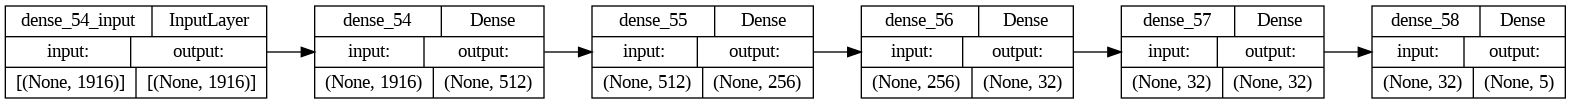

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               981504    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 32)                8224      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR

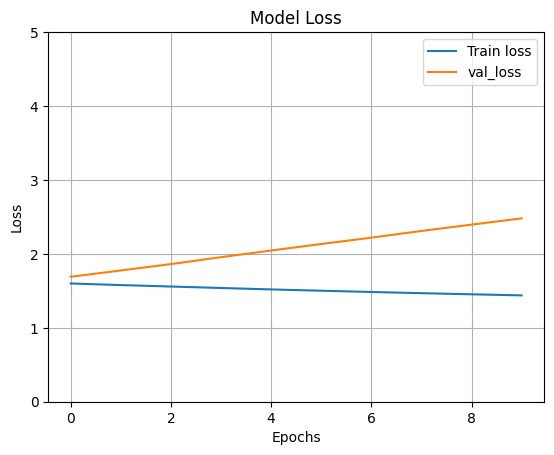

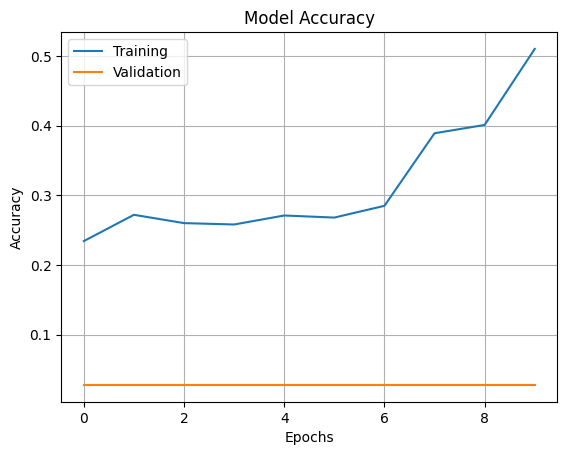

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - ADASYN - Training


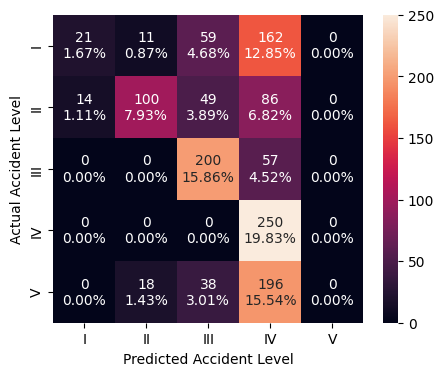


Confusion Matrix - TF-IDF - ANN - ADASYN - Testing


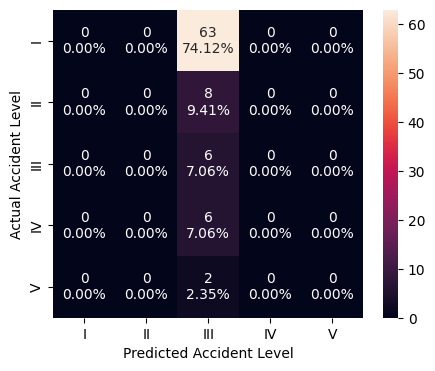

Classification Report - TF-IDF - ANN - ADASYN - Training
              precision    recall  f1-score   support

           0       0.60      0.08      0.15       253
           1       0.78      0.40      0.53       249
           2       0.58      0.78      0.66       257
           3       0.33      1.00      0.50       250
           4       0.00      0.00      0.00       252

    accuracy                           0.45      1261
   macro avg       0.46      0.45      0.37      1261
weighted avg       0.46      0.45      0.37      1261

Classification Report - TF-IDF - ANN - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        85
   macro avg      

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



### **ANN using GloVe**

We shall use the previously created GloVe embeddings on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with TF-IDF vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='glove')
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 100) (340,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 127    1
266    1
246    0
153    0
27     0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_glove_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  225.47 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 100) (1265,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    1
2    0
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_glove_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  249.57 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1284, 100) (1284,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1284, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    1
2    0
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_glove_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  253.87 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

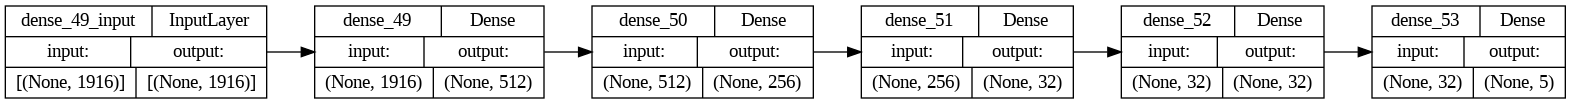

In [ ]:
best_nnmodel_gl_unb = build_ANN_model(optimizer = best_params_tf_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_unb['neurons_1'], neurons_2 = best_params_tf_unb['neurons_2'], neurons_3 = best_params_tf_unb['neurons_3'])
plot_model(best_nnmodel_tf_unb, show_shapes=True, rankdir='LR', expand_nested=False)

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

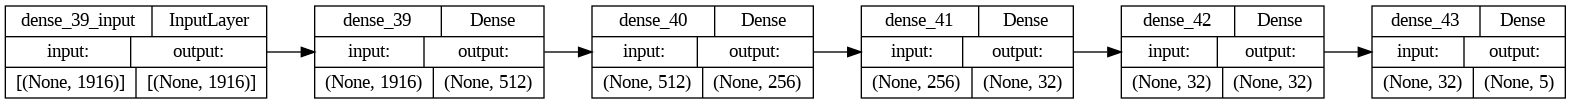

In [ ]:
best_nnmodel_gl_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               981504    
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 32)                8224      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

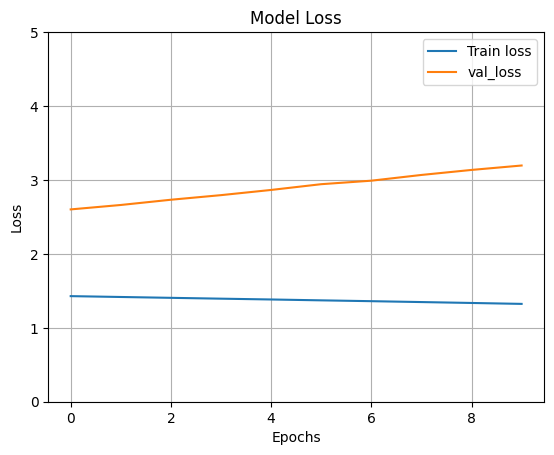

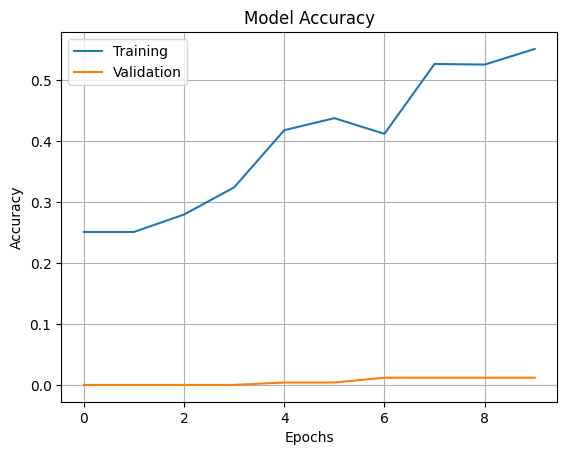

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - SMOTE - Training


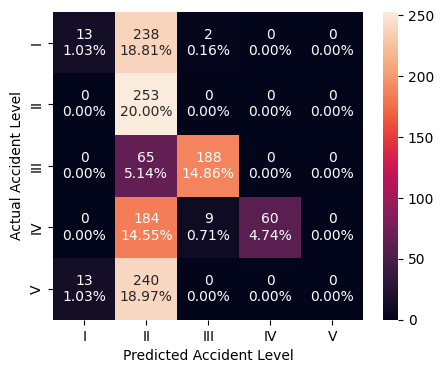


Confusion Matrix - TF-IDF - ANN - SMOTE - Testing


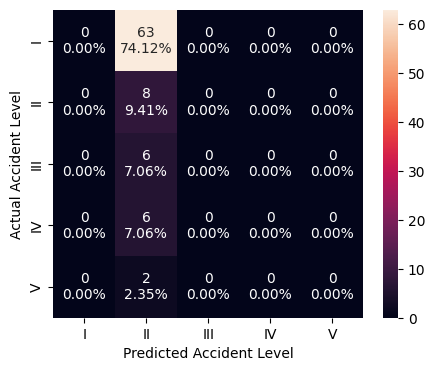

Classification Report - TF-IDF - ANN - SMOTE - Training
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       253
           1       0.26      1.00      0.41       253
           2       0.94      0.74      0.83       253
           3       1.00      0.24      0.38       253
           4       0.00      0.00      0.00       253

    accuracy                           0.41      1265
   macro avg       0.54      0.41      0.34      1265
weighted avg       0.54      0.41      0.34      1265

Classification Report - TF-IDF - ANN - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.09      1.00      0.17         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.09        85
   macro avg       0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

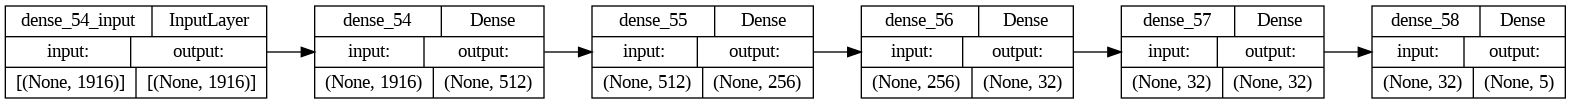

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               981504    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 32)                8224      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR

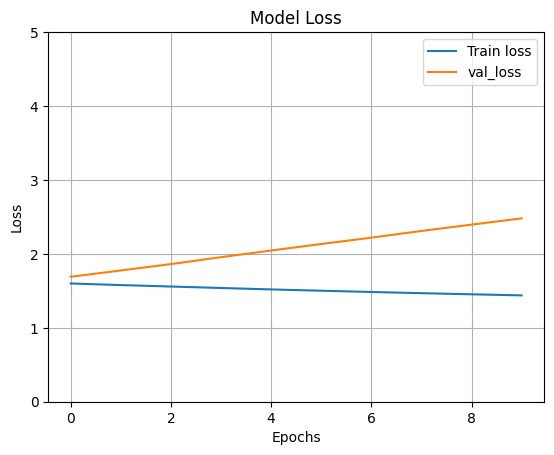

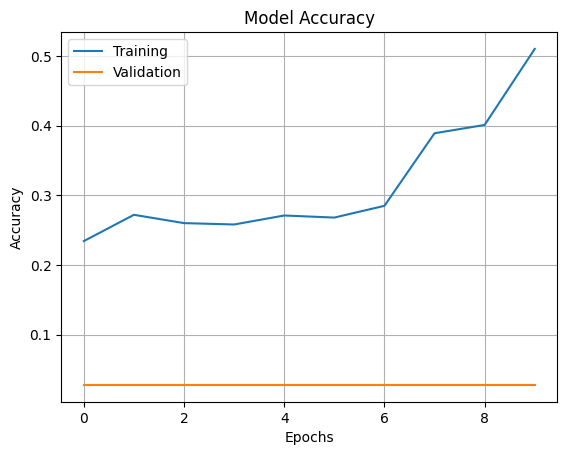

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - ADASYN - Training


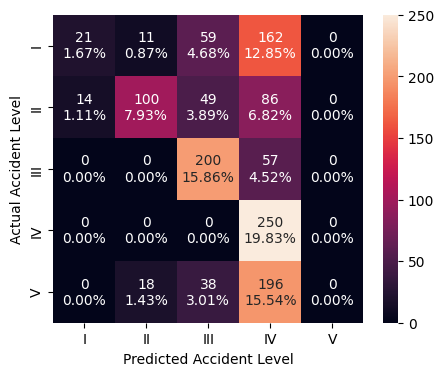


Confusion Matrix - TF-IDF - ANN - ADASYN - Testing


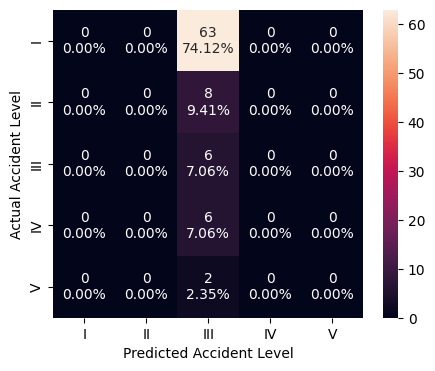

Classification Report - TF-IDF - ANN - ADASYN - Training
              precision    recall  f1-score   support

           0       0.60      0.08      0.15       253
           1       0.78      0.40      0.53       249
           2       0.58      0.78      0.66       257
           3       0.33      1.00      0.50       250
           4       0.00      0.00      0.00       252

    accuracy                           0.45      1261
   macro avg       0.46      0.45      0.37      1261
weighted avg       0.46      0.45      0.37      1261

Classification Report - TF-IDF - ANN - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        85
   macro avg      

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



### **ANN using TF-IDF**

We shall use the previously created TF-IDF Vectors on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with TF-IDF vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='tfidf')
#Encoding the target variable
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 2000) (340,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 55     1
35     0
373    0
276    0
251    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_tf_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  743.7034645080566 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
#Encoding the target variable
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 2000) (1265,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    0
2    0
3    0
4    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_tf_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  2211.1129269599915 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
#Encoding the target variable
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1245, 2000) (1245,) (85, 2000) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1245, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    0
2    0
3    0
4    3
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_tf_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  2314.07795381546 seconds
Best Parameters: {'optimizer': 'Adam', 'neurons_3': 128, 'neurons_2': 128, 'neurons_1': 1024, 'epochs': 60, 'batch_size': 100}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

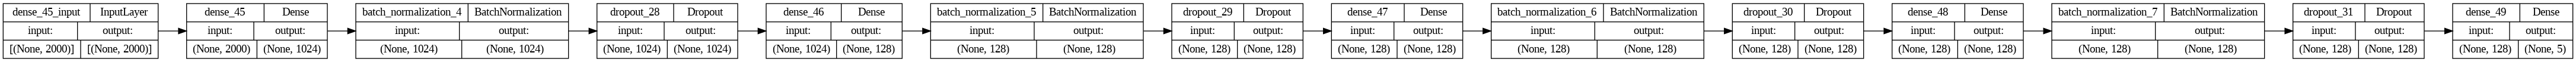

In [ ]:
best_nnmodel_tf_unb = build_ANN_model(optimizer = best_params_tf_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_unb['neurons_1'], neurons_2 = best_params_tf_unb['neurons_2'], neurons_3 = best_params_tf_unb['neurons_3'])
plot_model(best_nnmodel_tf_unb, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1024)              2049024   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_29 (Dropout)        (None, 128)              

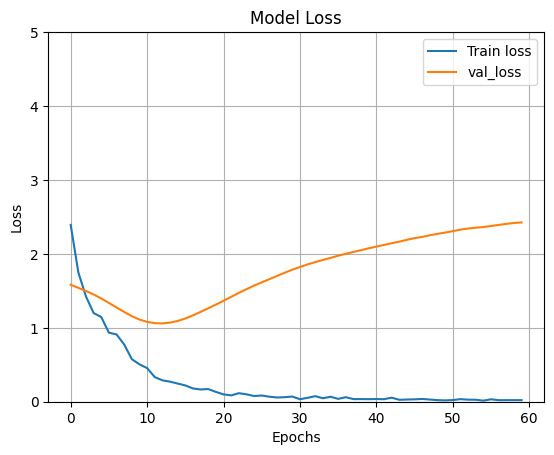

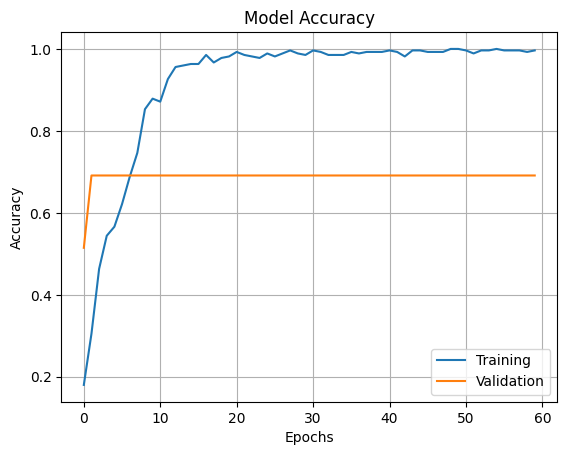

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - Unbalanced - Training


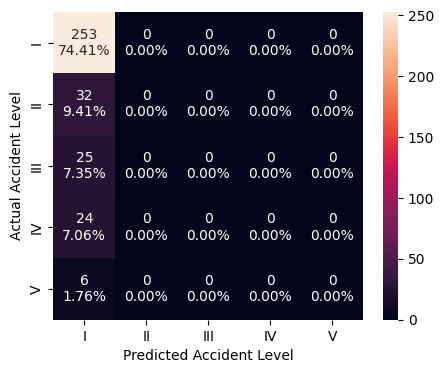


Confusion Matrix - TF-IDF - Tuned Neural Network - Unbalanced - Testing


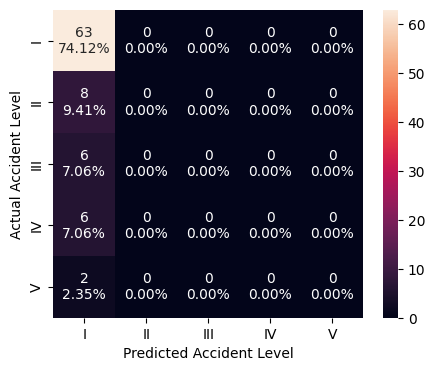

Classification Report - TF-IDF - Tuned Neural Network - Unbalanced - Training
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report - TF-IDF - Tuned Neural Network - Unbalanced - Testing
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                  

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
5  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42  
5         54.93      74.12     63.10             11.63

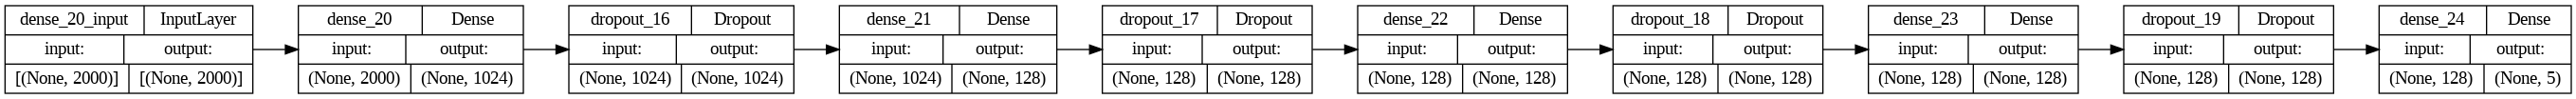

In [ ]:
best_nnmodel_tf_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              2049024   
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               131200    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 128)              

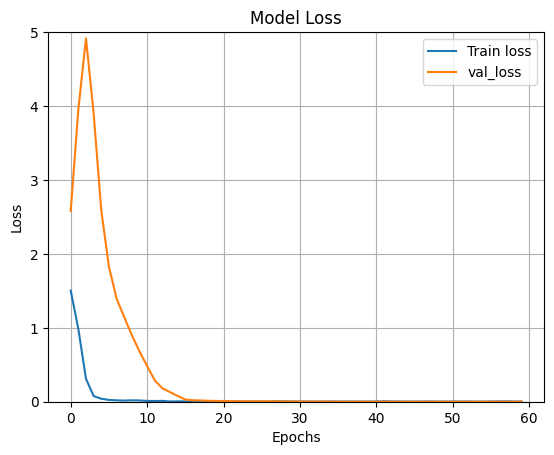

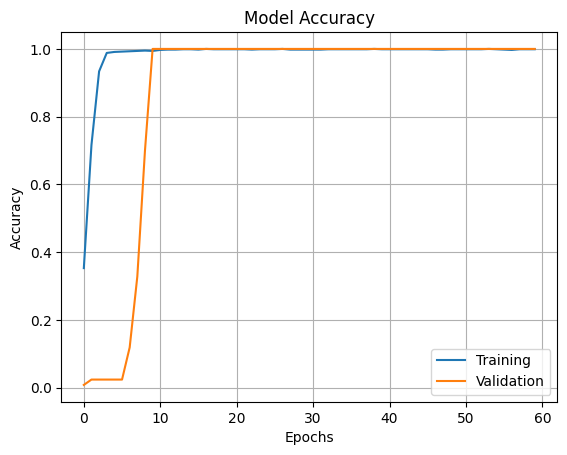

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - SMOTE - Training


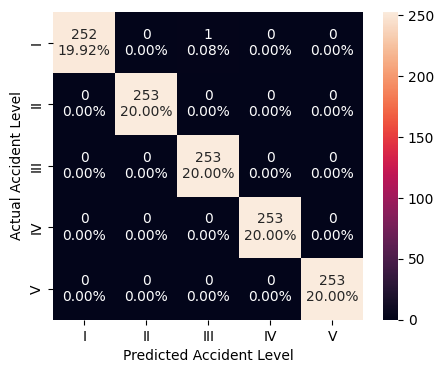


Confusion Matrix - TF-IDF - Tuned Neural Network - SMOTE - Testing


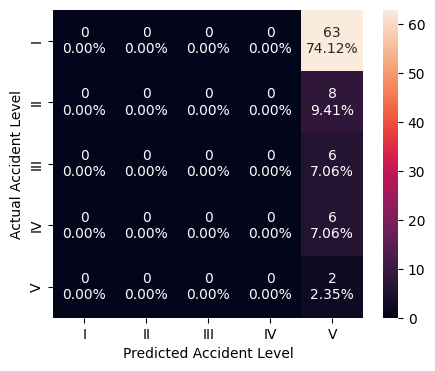

Classification Report - TF-IDF - Tuned Neural Network - SMOTE - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       253

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265

Classification Report - TF-IDF - Tuned Neural Network - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      1.00      0.05         2

    accuracy                           0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

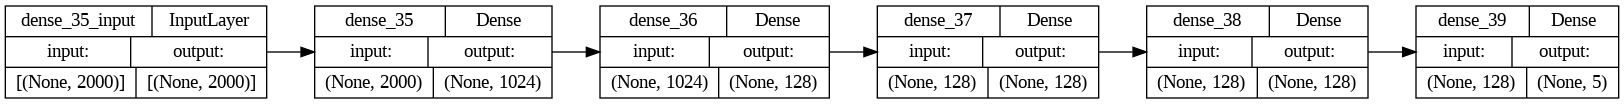

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              2049024   
                                                                 
 dense_36 (Dense)            (None, 128)               131200    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 5)                 645       
                                                                 
Total params: 2,213,893
Trainable params: 2,213,893
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

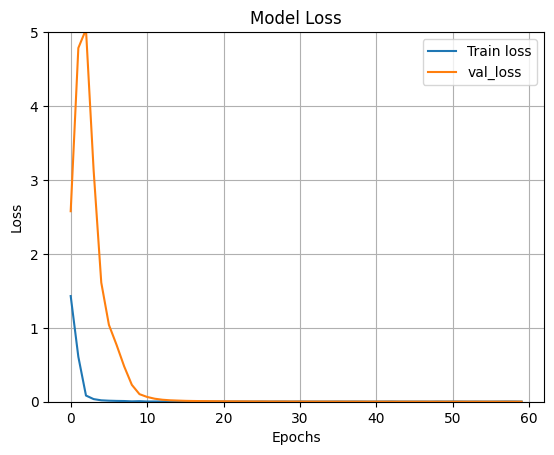

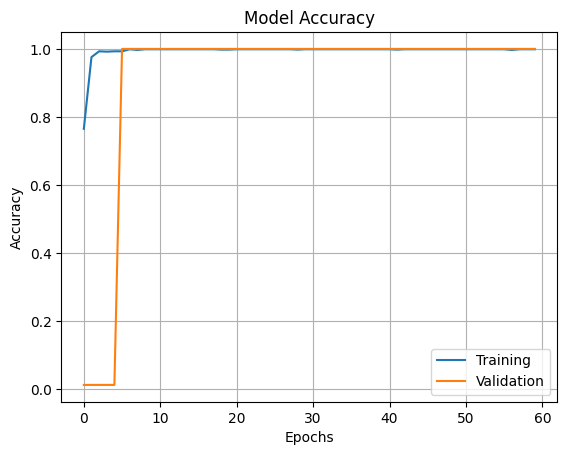

Printing Metrics for the model
Confusion Matrix - TF-IDF - Tuned Neural Network - ADASYN - Training


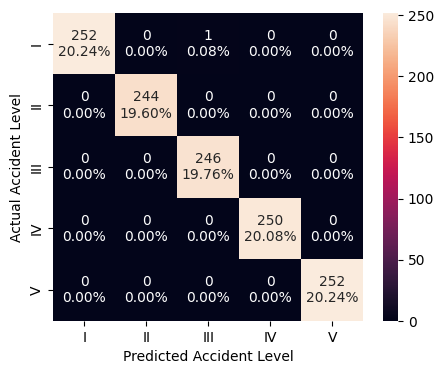


Confusion Matrix - TF-IDF - Tuned Neural Network - ADASYN - Testing


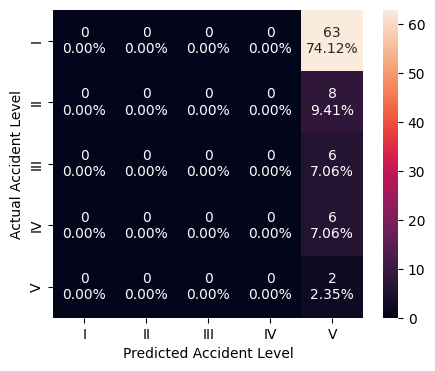

Classification Report - TF-IDF - Tuned Neural Network - ADASYN - Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       244
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       250
           4       1.00      1.00      1.00       252

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245

Classification Report - TF-IDF - Tuned Neural Network - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      1.00      0.05         2

    accuracy                          

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
1  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
2  Tuned Neural Network    TF-IDF  Unbalanced         75.00        74.12   
3  Tuned Neural Network    TF-IDF  Unbalanced         95.59        74.12   
4  Tuned Neural Network    TF-IDF  Unbalanced         74.41        74.12   

   F1 Score  Train time(secs)  
0      63.1             10.53  
1      63.1             12.23  
2      63.1             13.33  
3      63.1             11.82  
4      63.1             29.29

### **ANN using Word2Vec**

We shall use the previously created Word2Vec embeddings on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with Word2Vec vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='w2v')
#Encoding the target variable
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 300) (340,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 290    2
108    0
244    2
92     0
307    4
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_w2v_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Training time:  3445.27 seconds
Best Parameters: {'batch_size': 20, 'epochs': 10, 'neurons_1': 256, 'neurons_2': 128, 'neurons_3': 32, 'optimizer': 'SGD'}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
#Encoding the target variable
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 300) (1265,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    0
1    0
2    2
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_w2v_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  608.65 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
#Encoding the target variable
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1264, 300) (1264,) (85, 300) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1264, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    0
1    0
2    2
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_w2v_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  484.98 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

In [ ]:
best_nnmodel_w2v_unb = build_ANN_model(optimizer = best_params_w2v_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_w2v_unb['neurons_1'], neurons_2 = best_params_w2v_unb['neurons_2'], neurons_3 = best_params_w2v_unb['neurons_3'])
plot_model(best_nnmodel_w2v_unb, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 512)               154112    
                                                                 
 dense_80 (Dense)            (None, 256)               131328    
                                                                 
 dense_81 (Dense)            (None, 32)                8224      
                                                                 
 dense_82 (Dense)            (None, 32)                1056      
                                                                 
 dense_83 (Dense)            (None, 5)                 165       
                                                                 
Total params: 294,885
Trainable params: 294,885
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 10 

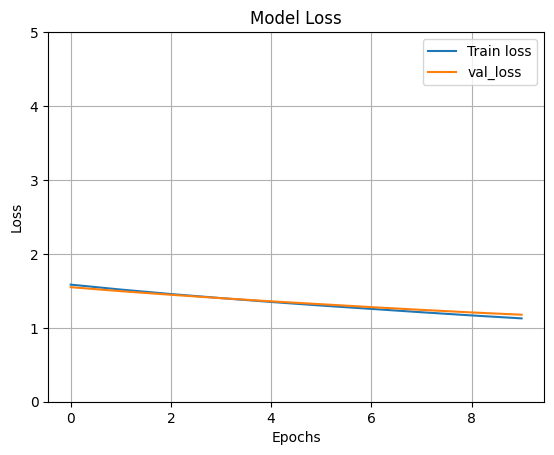

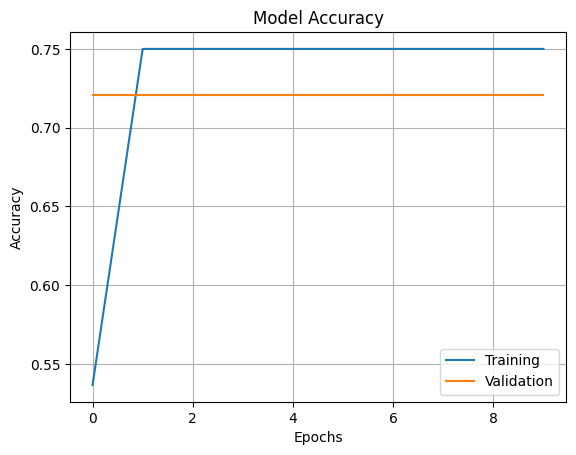

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - Unbalanced - Training


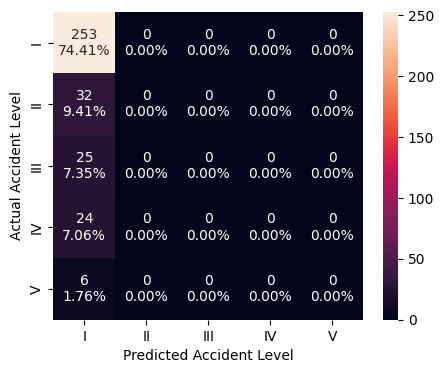


Confusion Matrix - TF-IDF - ANN - Unbalanced - Testing


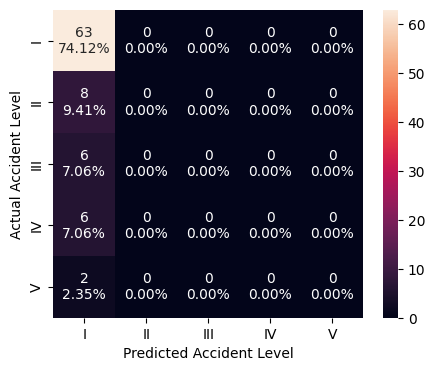

Classification Report - TF-IDF - ANN - Unbalanced - Training
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       253
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         6

    accuracy                           0.74       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.55      0.74      0.63       340

Classification Report - TF-IDF - ANN - Unbalanced - Testing
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        85
   macro a

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

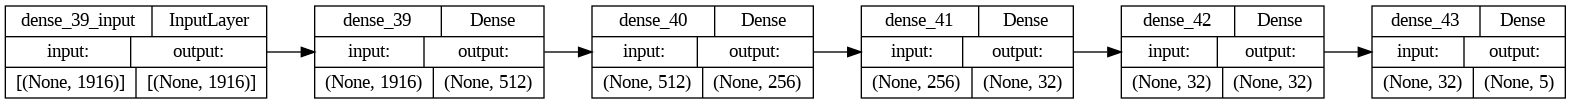

In [ ]:
best_nnmodel_tf_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               981504    
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 32)                8224      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

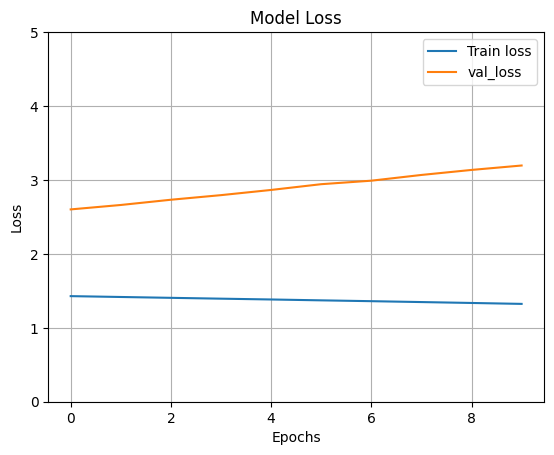

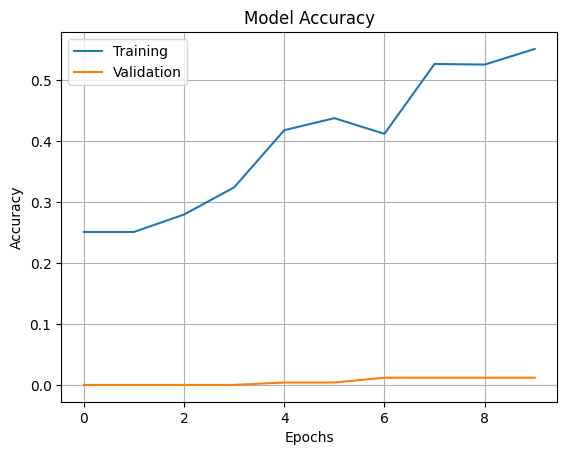

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - SMOTE - Training


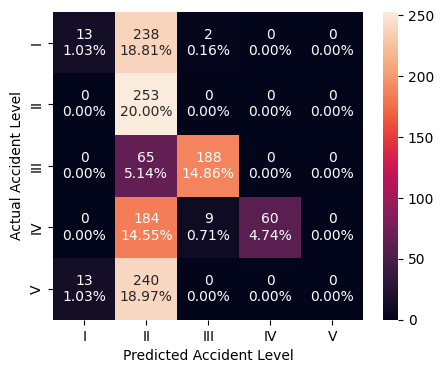


Confusion Matrix - TF-IDF - ANN - SMOTE - Testing


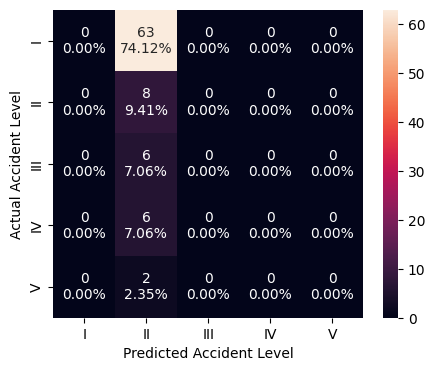

Classification Report - TF-IDF - ANN - SMOTE - Training
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       253
           1       0.26      1.00      0.41       253
           2       0.94      0.74      0.83       253
           3       1.00      0.24      0.38       253
           4       0.00      0.00      0.00       253

    accuracy                           0.41      1265
   macro avg       0.54      0.41      0.34      1265
weighted avg       0.54      0.41      0.34      1265

Classification Report - TF-IDF - ANN - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.09      1.00      0.17         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.09        85
   macro avg       0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

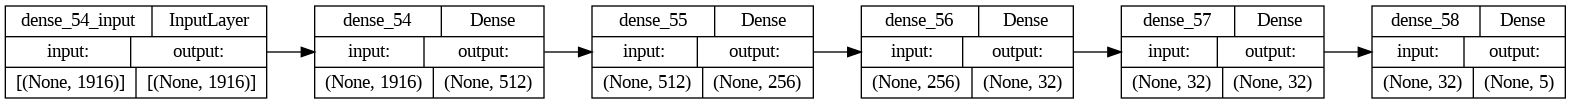

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               981504    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 32)                8224      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR

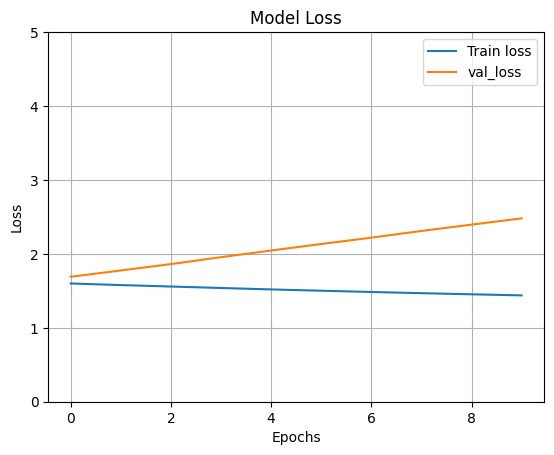

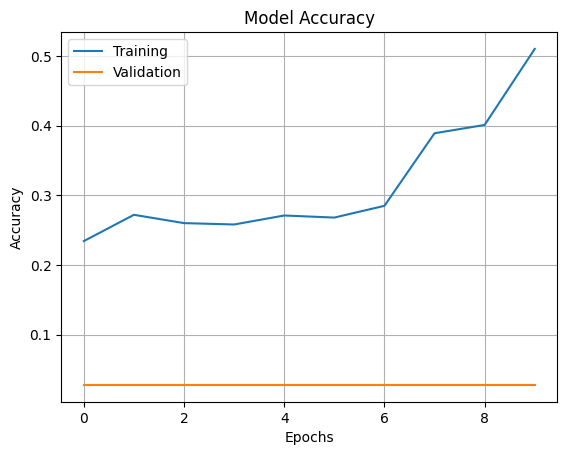

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - ADASYN - Training


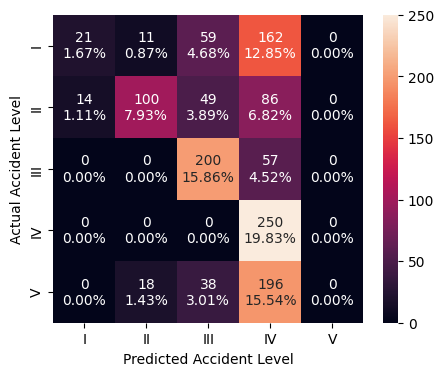


Confusion Matrix - TF-IDF - ANN - ADASYN - Testing


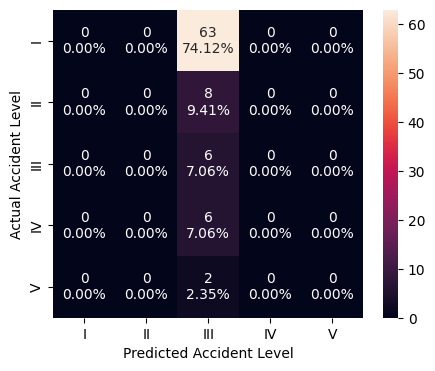

Classification Report - TF-IDF - ANN - ADASYN - Training
              precision    recall  f1-score   support

           0       0.60      0.08      0.15       253
           1       0.78      0.40      0.53       249
           2       0.58      0.78      0.66       257
           3       0.33      1.00      0.50       250
           4       0.00      0.00      0.00       252

    accuracy                           0.45      1261
   macro avg       0.46      0.45      0.37      1261
weighted avg       0.46      0.45      0.37      1261

Classification Report - TF-IDF - ANN - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        85
   macro avg      

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



### **ANN using GloVe**

We shall use the previously created GloVe embeddings on Neural Network Models for 3 cases
- Unbalanced
-Oversampling with SMOTE
-Oversampling with ADASYN

First we shall perform a RandomSearchCV to find the best hyperparameters

Then we shall use the best parameters to build an ANN for each case

**Unbalanced Data**

In [ ]:
#Create Train-Test split with TF-IDF vectors
X_train, X_test, y_train, y_test= create_Xy_samples(embedding='glove')
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)
inputDim= X_train.shape[1]

Shape of training and testing data 
[X_train, y_train, X_test, y_test]
(340, 100) (340,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 127    1
266    1
246    0
153    0
27     0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters
best_params_glove_unb = tune_neural_network(X_train=X_train, y_train=y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  225.47 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with SMOTE**

In [ ]:
#Generate SMOTE input
X_train_smote, y_train_smote = create_SMOTE_Xy(X_train, y_train)
y_train_smote_encoded, y_test_encoded = create_encoded_target(y_train_smote,y_test)

Shape of Training and Test sets after SMOTE operation [X_train_smote, y_train_smote, X_test, y_test]
(1265, 100) (1265,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1265, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    1
2    0
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_glove_s = tune_neural_network(X_train=X_train_smote, y_train=y_train_smote_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  249.57 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Oversampling with ADASYN**

In [ ]:
#Generate ADASYN input
X_train_adasyn, y_train_adasyn = create_ADASYN_Xy(X_train, y_train)
y_train_adasyn_encoded, y_test_encoded = create_encoded_target(y_train_adasyn,y_test)

Shape of Training and Test sets after ADASYN operation 
 [X_train_adasyn, y_train_adasyn, X_test, y_test]
(1284, 100) (1284,) (85, 100) (85,)

Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (1284, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 0    1
1    1
2    0
3    0
4    0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#RandomSearch CV to find best parameters for smote input
best_params_glove_a = tune_neural_network(X_train=X_train_adasyn, y_train=y_train_adasyn_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time:  253.87 seconds
Best Parameters: {'optimizer': 'SGD', 'neurons_3': 32, 'neurons_2': 256, 'neurons_1': 512, 'epochs': 10, 'batch_size': 50}


**Observations**

After running RandomSearchCV for all 3 cases - unbalanced data, oversampling with SMOTE and ADASYN, it can be observed that the best hyperparameters are the same.

Hence we use these best settings to build a model for further evaluation.

**Building the best model using the best parameters**

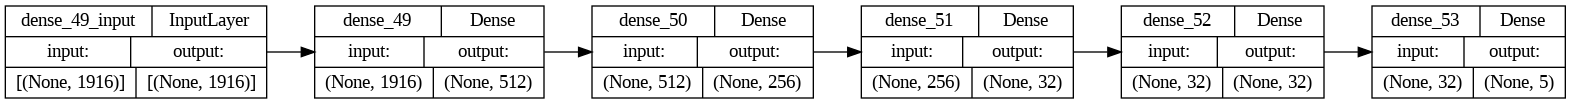

In [ ]:
best_nnmodel_gl_unb = build_ANN_model(optimizer = best_params_tf_unb['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_unb['neurons_1'], neurons_2 = best_params_tf_unb['neurons_2'], neurons_3 = best_params_tf_unb['neurons_3'])
plot_model(best_nnmodel_tf_unb, show_shapes=True, rankdir='LR', expand_nested=False)

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_unb, X_train=X_train, X_test=X_test, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs= best_params_tf_unb['epochs'], batch_size=best_params_tf_unb['batch_size'], emb='TF-IDF', bal='Unbalanced')

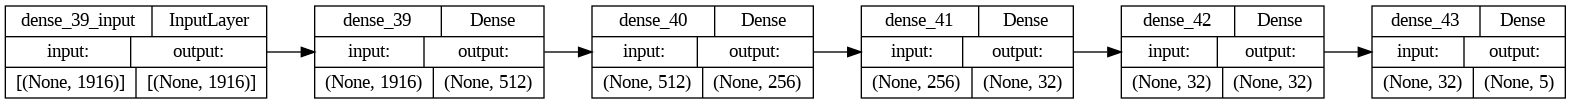

In [ ]:
best_nnmodel_gl_smote = build_ANN_model(optimizer = best_params_tf_s['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_s['neurons_1'], neurons_2 = best_params_tf_s['neurons_2'], neurons_3 = best_params_tf_s['neurons_3'])
plot_model(best_nnmodel_tf_smote, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               981504    
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 32)                8224      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR 

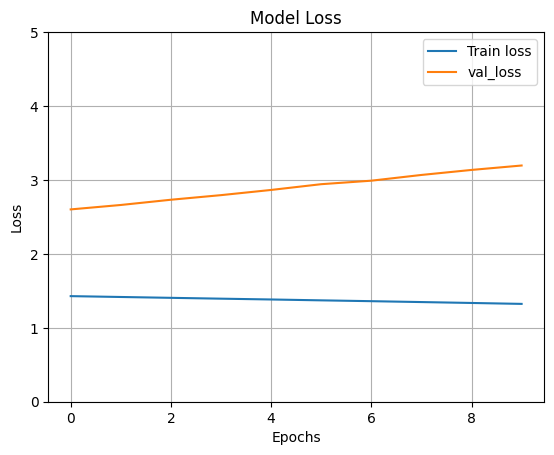

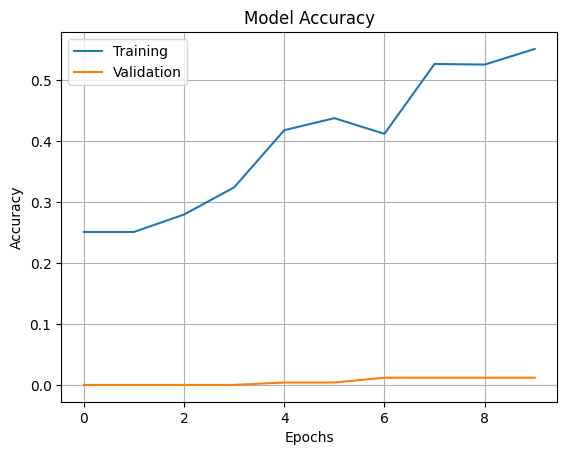

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - SMOTE - Training


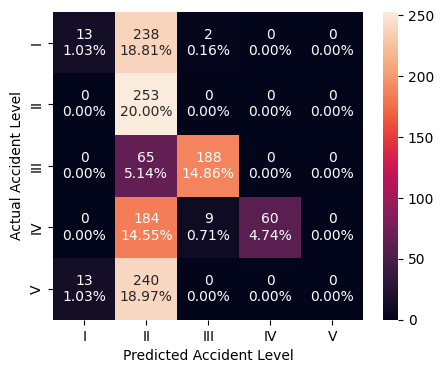


Confusion Matrix - TF-IDF - ANN - SMOTE - Testing


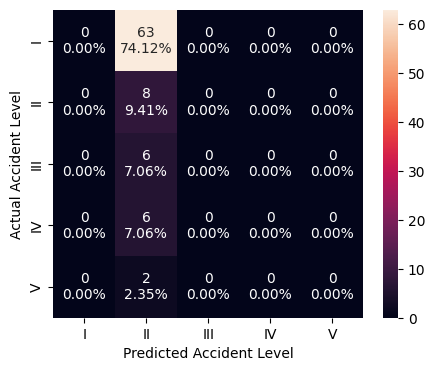

Classification Report - TF-IDF - ANN - SMOTE - Training
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       253
           1       0.26      1.00      0.41       253
           2       0.94      0.74      0.83       253
           3       1.00      0.24      0.38       253
           4       0.00      0.00      0.00       253

    accuracy                           0.41      1265
   macro avg       0.54      0.41      0.34      1265
weighted avg       0.54      0.41      0.34      1265

Classification Report - TF-IDF - ANN - SMOTE - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.09      1.00      0.17         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.09        85
   macro avg       0

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_smote, X_train=X_train_smote, X_test=X_test, y_train=y_train_smote, y_train_encoded=y_train_smote_encoded, y_test=y_test, epochs= best_params_tf_s['epochs'], batch_size=best_params_tf_s['batch_size'], emb='TF-IDF', bal='SMOTE')

In [ ]:
best_nnmodel_tf_ada = build_ANN_model(optimizer = best_params_tf_a['optimizer'], learn_rate=0.001, neurons_1 = best_params_tf_a['neurons_1'], neurons_2 = best_params_tf_a['neurons_2'], neurons_3 = best_params_tf_a['neurons_3'])
plot_model(best_nnmodel_tf_ada, show_shapes=True, rankdir='LR', expand_nested=False)

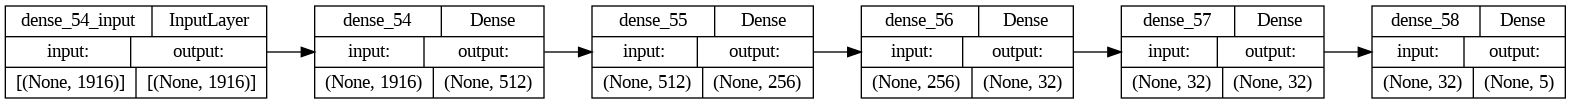

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               981504    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 32)                8224      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,122,277
Trainable params: 1,122,277
Non-trainable params: 0
_________________________________________________________________

 ----- TRAINING COMPLETED SUCCESSFULLY FOR

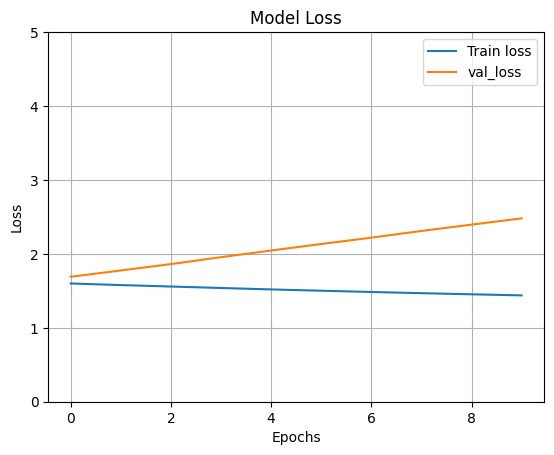

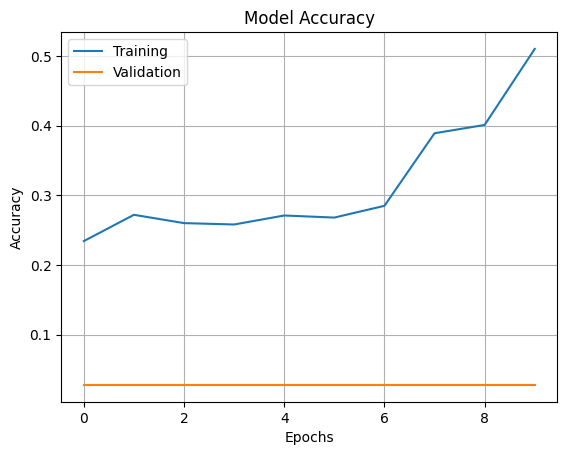

Printing Metrics for the model
Confusion Matrix - TF-IDF - ANN - ADASYN - Training


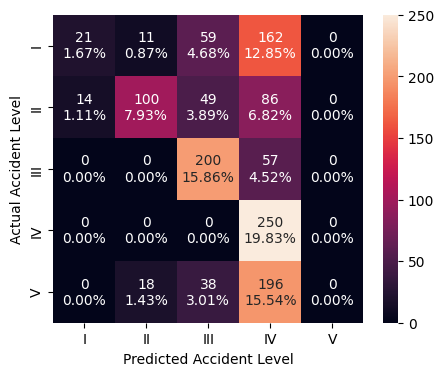


Confusion Matrix - TF-IDF - ANN - ADASYN - Testing


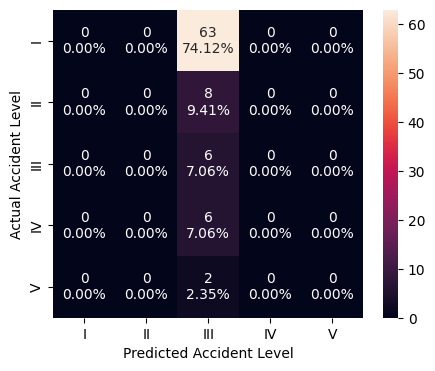

Classification Report - TF-IDF - ANN - ADASYN - Training
              precision    recall  f1-score   support

           0       0.60      0.08      0.15       253
           1       0.78      0.40      0.53       249
           2       0.58      0.78      0.66       257
           3       0.33      1.00      0.50       250
           4       0.00      0.00      0.00       252

    accuracy                           0.45      1261
   macro avg       0.46      0.45      0.37      1261
weighted avg       0.46      0.45      0.37      1261

Classification Report - TF-IDF - ANN - ADASYN - Testing
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        85
   macro avg      

In [ ]:
run_ANN_model(modelinstance=best_nnmodel_tf_ada, X_train=X_train_adasyn, X_test=X_test, y_train=y_train_adasyn, y_train_encoded=y_train_adasyn_encoded, y_test=y_test, epochs= best_params_tf_a['epochs'], batch_size=best_params_tf_a['batch_size'], emb='TF-IDF', bal='ADASYN')

**Observations**

The model performs poorly on minority classes owing to lack of adequate training data because of the highly imbalanced dataset.

We have implemented oversampling techniques to fix this problem.

Observations

We have used SMOTE and ADASYN to balance the data

The model performance has deteriorated

The performance of the model when oversampling using SMOTE and ADASYN is almost similar



# **RNN and LSTM Models**

### **Prepare the Inputs**

In [ ]:
#Input1: Tokenized Sequenced Text Data
X_description_text = df['Cleaned_Description']
y = df["Accident_Level"]
# max_length = df['Cleaned_Description_Length'].max()
max_length = 65
embedding_dim = 300 #Experiment and evaluate RNN model with different embedding_dim values and evaluate their performance
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_description_text)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(X_description_text)
text_data = pad_sequences(sequences, maxlen=max_length, padding='post', value=0, truncating='post')
vocab_size

1926

In [ ]:
tokens_list = df['Tokenized_Description'].to_list()
word2vec_vectorizer = Word2Vec(sentences=tokens_list, vector_size=1000, window=5, min_count=1, workers=4)
def get_sentence_vector(sentence, vectorizer):
    vector_sum = 0
    for word in sentence:
        if word in vectorizer.wv:
            vector_sum += vectorizer.wv[word]
    return vector_sum
df['Cleaned_Description_Vector'] = [get_sentence_vector(sentence, word2vec_vectorizer) for sentence in tokens_list]

In [ ]:
df.head(1)

In [ ]:
#Input2: Vectorized Data of the Cleaned Descriptions
X_description_vector = df['Cleaned_Description_Vector']
# X_description_vector = pd.DataFrame(df['Cleaned_Description_Vector'])
vector_data = np.array(X_description_vector.tolist())

# vector_data = df_Word2Vec.copy()
vector_dim = vector_data.shape[1]
vector_dim

1000

In [ ]:
#For GloVe embeddings as input
vector_data = df_Glove.copy()
vector_dim = vector_data.shape[1]
vector_dim

In [ ]:
# Split data into training and test sets
# X_train_text, X_test_text, X_train_vector, X_test_vector, y_train, y_test = train_test_split(text_data, vector_data, label, test_size=0.2, random_state=42)
X_train_text, X_test_text, X_train_vector, X_test_vector, y_train, y_test = train_test_split(text_data, vector_data, y, test_size=0.2, random_state=42)
print("Shape of training and testing data \n[X_train_text, X_train_vector, y_train, X_test_text, X_test_vector, y_test]" )
print(X_train_text.shape, X_train_vector.shape, y_train.shape, X_test_text.shape, X_test_vector.shape, y_test.shape)

Shape of training and testing data 
[X_train_text, X_train_vector, y_train, X_test_text, X_test_vector, y_test]
(340, 65) (340, 1000) (340,) (85, 65) (85, 1000) (85,)


In [ ]:
#Encoding the target variable
y_train_encoded, y_test_encoded = create_encoded_target(y_train,y_test)


Shape of train and test target variable after one-hot encoding target [Encoded y_train, Encoded y_test]: (340, 5) (85, 5)

First 5 training labels of target variable before encoding : 
 17     0
66     0
132    0
222    0
31     0
Name: Accident_Level, dtype: int64

The same 5 target variables as one-hot encoded vectors :
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


Preparing GloVe inputs for subsequent training

## **SimpleRNN Model**

In [ ]:
# rnn_model = build_RNN_LSTM_model(optimizer='Adam', rnntype='RNN')
rnn_model = build_RNN_LSTM_model(vector_dim=vector_dim, vocab_size=vocab_size, optimizer='SGD', embedding_dim=300, max_length=65, num_classes = 5, rnntype='RNN')
plot_model(rnn_model, show_shapes=True, rankdir='LR', expand_nested=False)

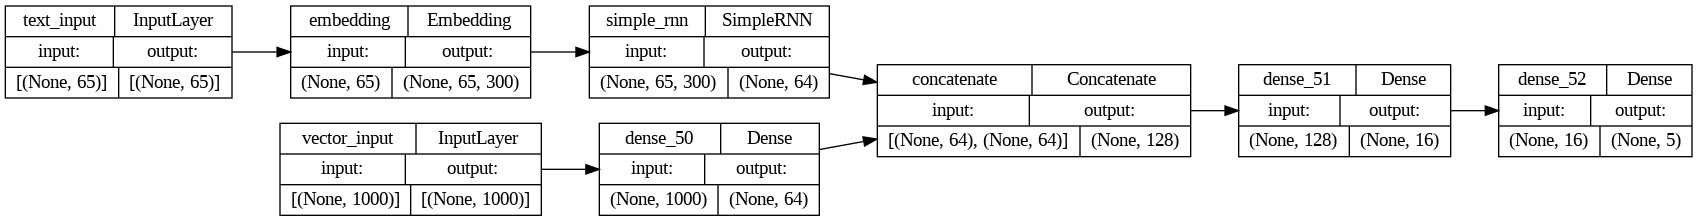

In [ ]:
plot_model(rnn_model, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 65)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 65, 300)      577800      ['text_input[0][0]']             
                                                                                                  
 vector_input (InputLayer)      [(None, 1000)]       0           []                               
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (None, 64)           23360       ['embedding_1[0][0]']            
                                                                                            

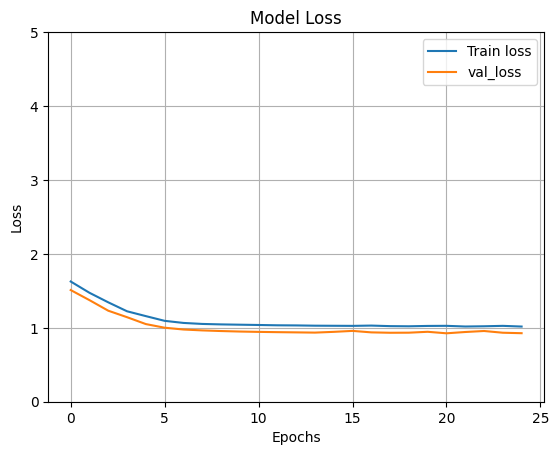

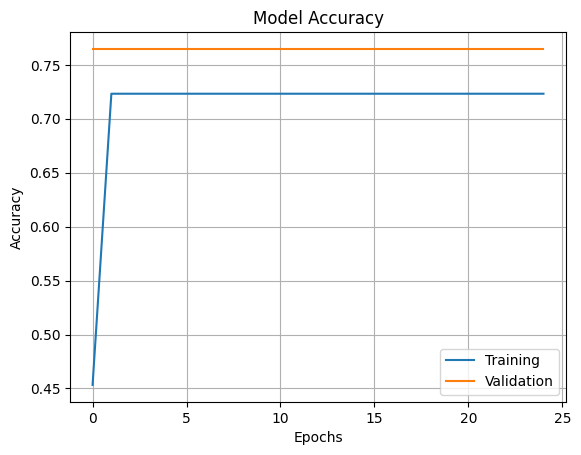

Printing Metrics for the model
Confusion Matrix - Word2Vec - Simple RNN - None - Training


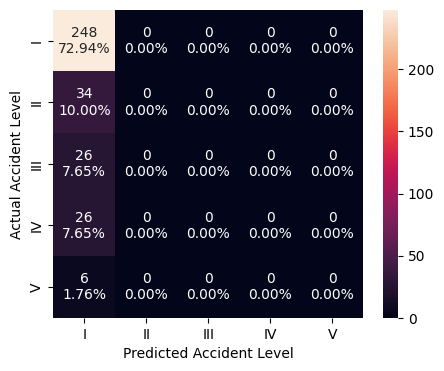


Confusion Matrix - Word2Vec - Simple RNN - None - Testing


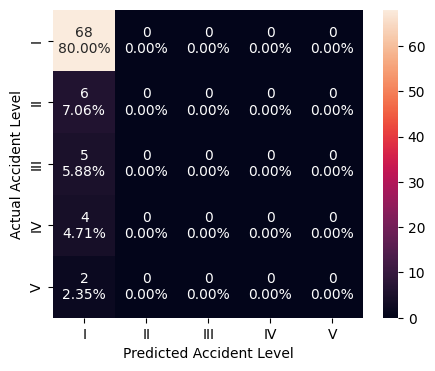

Classification Report - Word2Vec - Simple RNN - None - Training
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       248
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         6

    accuracy                           0.73       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.53      0.73      0.62       340

Classification Report - Word2Vec - Simple RNN - None - Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        68
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.80        85
   m

In [ ]:
run_RNN_LSTM_model(modelinstance=rnn_model, X_train_text=X_train_text, X_train_vector=X_train_vector, X_test_text=X_test_text, X_test_vector=X_test_vector, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs=25, batch_size=50, emb='Word2Vec', bal='Unbalanced')

Training the same model using pretrained GloVe embeddings

## **LSTM Model**

In [ ]:
# rnn_model = build_RNN_LSTM_model(optimizer='Adam', rnntype='RNN')
lstm_model = build_RNN_LSTM_model(vector_dim=vector_dim, vocab_size=vocab_size, optimizer='SGD', embedding_dim=300, max_length=65, num_classes = 5, rnntype='LSTM')
plot_model(lstm_model, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 65)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 65, 300)      577800      ['text_input[0][0]']             
                                                                                                  
 vector_input (InputLayer)      [(None, 1000)]       0           []                               
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (None, 64)           23360       ['embedding_1[0][0]']            
                                                                                            

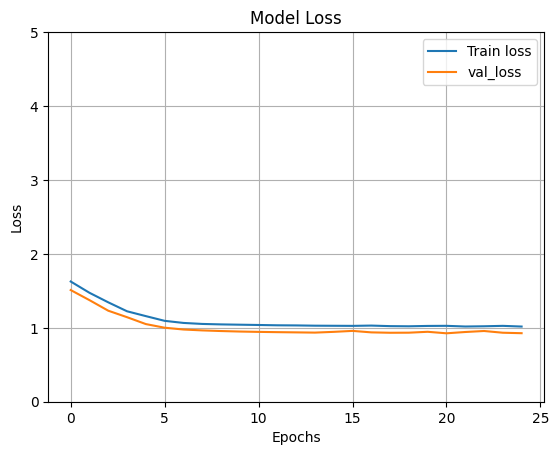

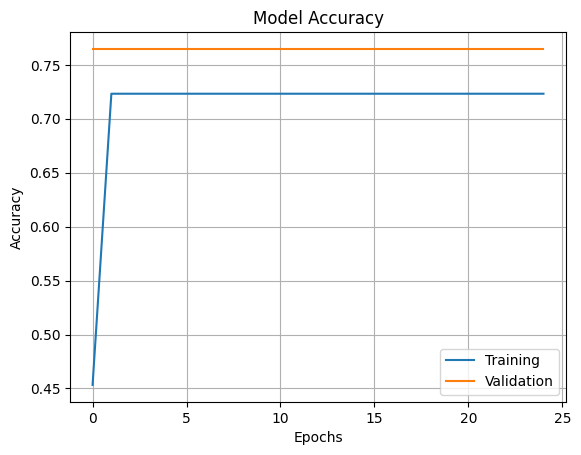

Printing Metrics for the model
Confusion Matrix - Word2Vec - Simple RNN - None - Training


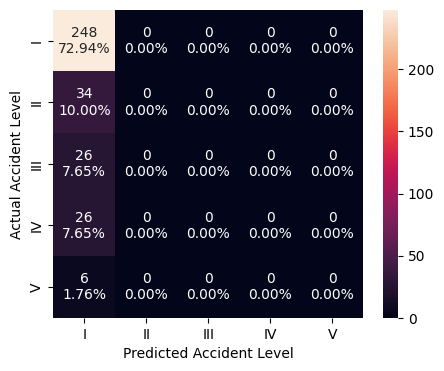


Confusion Matrix - Word2Vec - Simple RNN - None - Testing


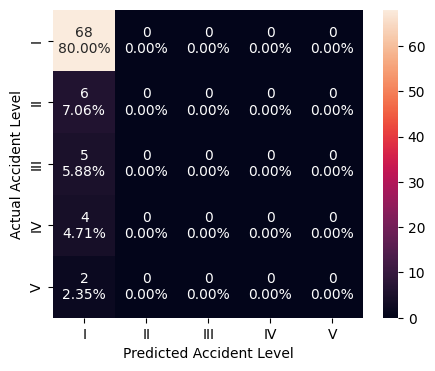

Classification Report - Word2Vec - Simple RNN - None - Training
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       248
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         6

    accuracy                           0.73       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.53      0.73      0.62       340

Classification Report - Word2Vec - Simple RNN - None - Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        68
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.80        85
   m

In [ ]:
run_RNN_LSTM_model(modelinstance=lstm_model, X_train_text=X_train_text, X_train_vector=X_train_vector, X_test_text=X_test_text, X_test_vector=X_test_vector, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs=25, batch_size=50, emb='Word2Vec', bal='Unbalanced')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
5  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
6  Tuned Neural Network    TF-IDF  Unbalanced         74.41        74.12   
7    Bidirectional LSTM  Word2Vec        None         72.94        80.00   
8            Simple RNN  Word2Vec        None         72.94        80.00   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42  
5         54.93      74.12     63.10             11.63  
6         54.93      74.12     63.10             22.92  
7         64.00      80.00     71.11             12.80  
8         64.00      80.00     71.11             11.55

## **BiDirectional LSTM Model**

We will train using Bidirectional LSTM model with 128 units.
A Embedding layer before the LSTM layer.
Global Max pool out layer.
5 dense layers to gradually reduce the nodes and 5 drop out layers.
Optimiser - Adam, loss - Categorical Cross Entropy

In [ ]:
# rnn_model = build_RNN_LSTM_model(optimizer='Adam', rnntype='RNN')
bilstm_model = build_RNN_LSTM_model(vector_dim=vector_dim, vocab_size=vocab_size, optimizer='SGD', embedding_dim=300, max_length=65, num_classes = 5, rnntype='BiLSTM')
plot_model(bilstm_model, show_shapes=True, rankdir='LR', expand_nested=False)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 65)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 65, 300)      577800      ['text_input[0][0]']             
                                                                                                  
 vector_input (InputLayer)      [(None, 1000)]       0           []                               
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (None, 64)           23360       ['embedding_1[0][0]']            
                                                                                            

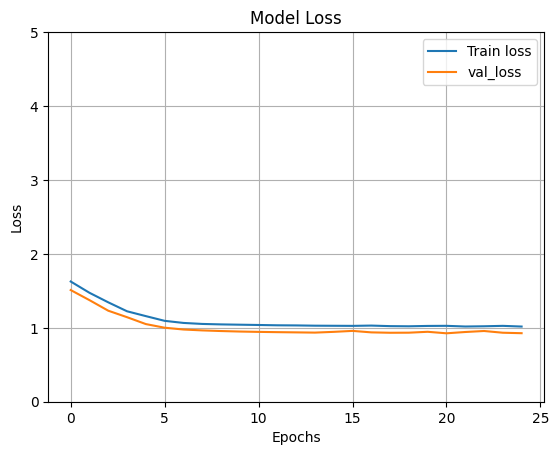

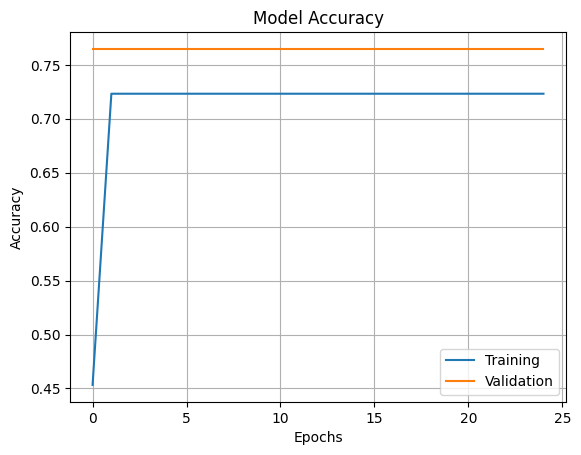

Printing Metrics for the model
Confusion Matrix - Word2Vec - Simple RNN - None - Training


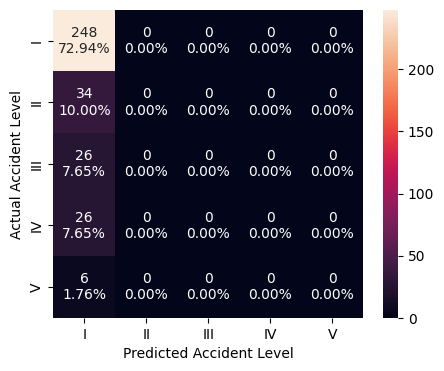


Confusion Matrix - Word2Vec - Simple RNN - None - Testing


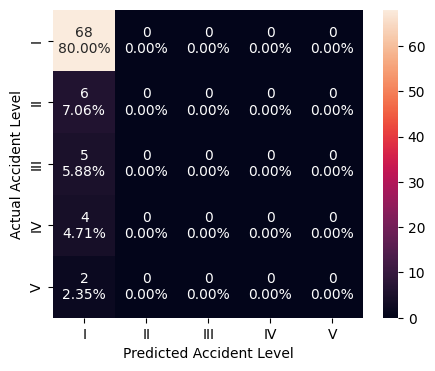

Classification Report - Word2Vec - Simple RNN - None - Training
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       248
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         6

    accuracy                           0.73       340
   macro avg       0.15      0.20      0.17       340
weighted avg       0.53      0.73      0.62       340

Classification Report - Word2Vec - Simple RNN - None - Testing
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        68
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.80        85
   m

In [ ]:
run_RNN_LSTM_model(modelinstance=bilstm_model, X_train_text=X_train_text, X_train_vector=X_train_vector, X_test_text=X_test_text, X_test_vector=X_test_vector, y_train=y_train, y_train_encoded=y_train_encoded, y_test=y_test, epochs=25, batch_size=50, emb='Word2Vec', bal='Unbalanced')

In [ ]:
stats_df

ModelName Embedding   Balancing  Train Acc(%)  Test Acc(%)  \
0  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
1  Tuned Neural Network    TF-IDF       SMOTE         99.92         2.35   
2  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
3  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
4  Tuned Neural Network    TF-IDF      ADASYN         99.92         2.35   
5  Tuned Neural Network    TF-IDF  Unbalanced         93.53        74.12   
6  Tuned Neural Network    TF-IDF  Unbalanced         74.41        74.12   
7    Bidirectional LSTM  Word2Vec        None         72.94        80.00   
8            Simple RNN  Word2Vec        None         72.94        80.00   

   Precision(%)  Recall(%)  F1 Score  Train time(secs)  
0         54.93      74.12     63.10             11.93  
1          0.06       2.35      0.11             43.49  
2          0.06       2.35      0.11             32.92  
3          0.06       2.35      0.11             35.44  
4          0.06       2.35      0.11             42.42  
5         54.93      74.12     63.10             11.63  
6         54.93      74.12     63.10             22.92  
7         64.00      80.00     71.11             12.80  
8         64.00      80.00     71.11             11.55